# Fraud Detection Analysis

This notebook performs comprehensive analysis of fraud detection data using various machine learning approaches.

## Table of Contents
1. [Data Loading and Preprocessing](#1)
2. [Exploratory Data Analysis (EDA)](#2)
3. [Feature Engineering](#3)
4. [Machine Learning Models](#4)
5. [Model Evaluation](#5)

## Setup and Imports

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Saving the model
import joblib
import os

# Essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Metrics and evaluation tools
from sklearn.metrics import (
    roc_auc_score, confusion_matrix, classification_report,
    average_precision_score, precision_recall_curve,
    RocCurveDisplay, ConfusionMatrixDisplay, PrecisionRecallDisplay,precision_score,recall_score,f1_score
)

# Machine Learning models
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from skopt import BayesSearchCV

# Configure visualizations
sns.set_theme(style="whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

<a id='1'></a>
## 1. Data Loading and Preprocessing

We'll start by loading the FRAUD.CSV dataset and examining its basic properties.

In [2]:
# Load the dataset
df = pd.read_csv('FRAUD.CSV')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

print("\nFirst few rows:")
df.head(50)

Dataset Shape: (16142, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16142 entries, 0 to 16141
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            16142 non-null  object 
 1   amount          16142 non-null  float64
 2   nameOrig        16142 non-null  object 
 3   oldbalanceOrg   16142 non-null  float64
 4   newbalanceOrig  16142 non-null  float64
 5   nameDest        16142 non-null  object 
 6   oldbalanceDest  16142 non-null  float64
 7   newbalanceDest  16142 non-null  float64
 8   isFraud         16142 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 1.1+ MB

First few rows:


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,CASH_OUT,195490.04,C1107204185,0.00,0.00,C564160838,1104500.40,1254956.07,0
1,CASH_OUT,125275.00,C1538849250,0.00,0.00,C401424608,1477426.93,1178808.14,0
2,TRANSFER,60949.25,C773535564,0.00,0.00,C481402298,632824.07,617488.40,0
3,CASH_IN,101640.69,C265330243,3548387.86,3650028.55,C542895457,192397.59,93380.65,0
4,PAYMENT,3710.80,C1171097095,71978.00,68267.20,M165886570,0.00,0.00,0
5,CASH_IN,197677.22,C665829140,330964.89,528642.11,C1167066016,704745.77,455191.58,0
6,CASH_OUT,228693.31,C1958403865,30003.00,0.00,C1592415783,17515.23,246208.54,0
7,CASH_IN,16798.63,C1310763397,9173758.43,9190557.06,C1032986144,74638.42,57839.79,0
8,PAYMENT,2022.78,C581486647,0.00,0.00,M1599695386,0.00,0.00,0
9,PAYMENT,14608.67,C1938005794,11618.00,0.00,M353562601,0.00,0.00,0


<a id='2'></a>
## 2. Exploratory Data Analysis (EDA)

Let's analyze the distribution and relationships between variables.

In [3]:
# Summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.614200e+04,1.614200e+04,1.614200e+04,1.614200e+04,1.614200e+04,16142.000000
mean,2.655567e+05,8.895427e+05,8.047901e+05,1.015319e+06,1.180620e+06,0.070747
std,8.935029e+05,2.915525e+06,2.841016e+06,2.895769e+06,3.147067e+06,0.256410
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.466256e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,8.782760e+04,1.997750e+04,0.000000e+00,1.035136e+05,2.067598e+05,0.000000
75%,2.319357e+05,1.583547e+05,1.138387e+05,8.664911e+05,1.092889e+06,0.000000
max,3.527187e+07,4.039905e+07,3.388709e+07,1.188132e+08,1.188746e+08,1.000000


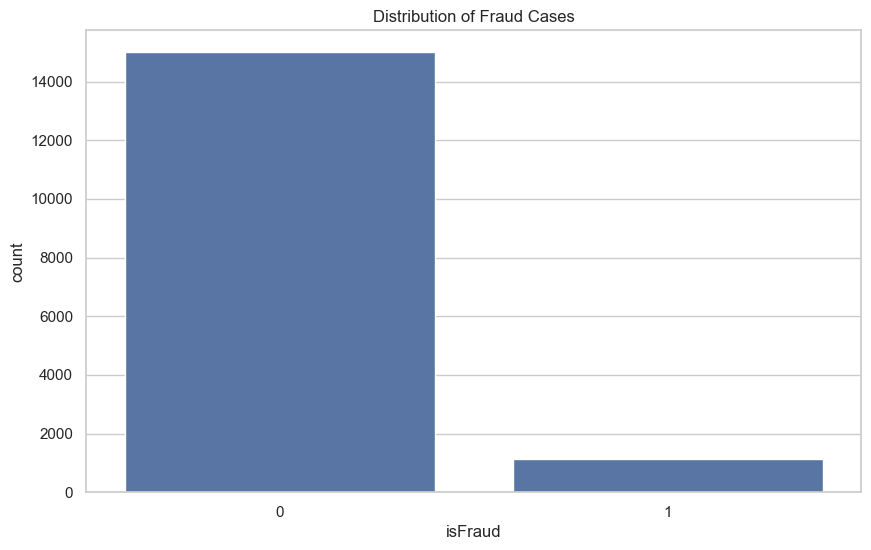

In [4]:
# Distribution of fraud cases
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='isFraud')
plt.title('Distribution of Fraud Cases')
plt.show()

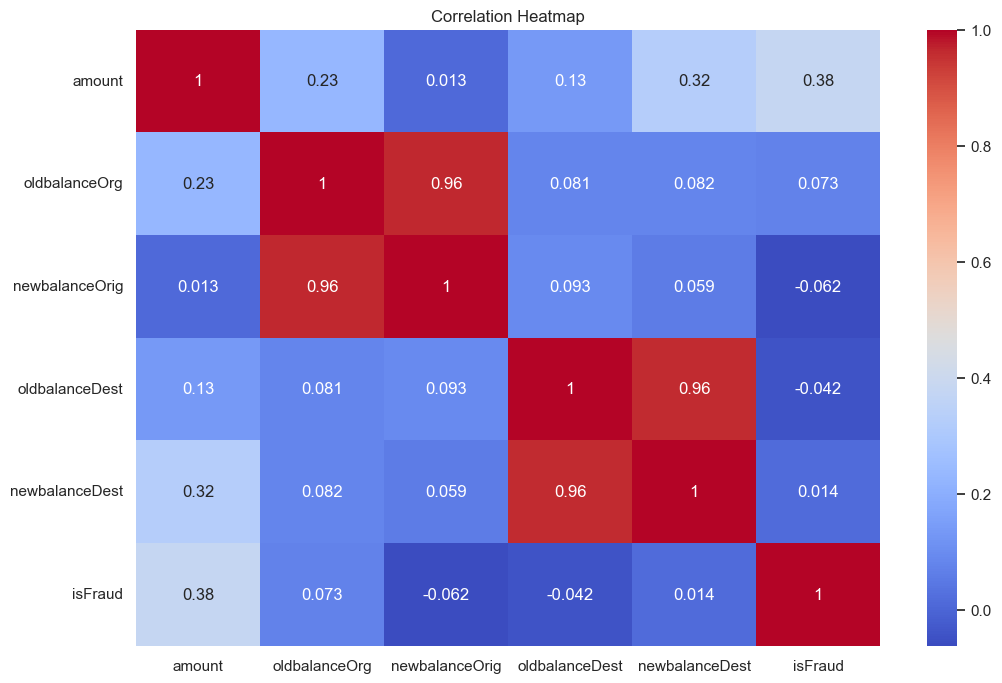

In [5]:
# Correlation heatmap of numerical features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

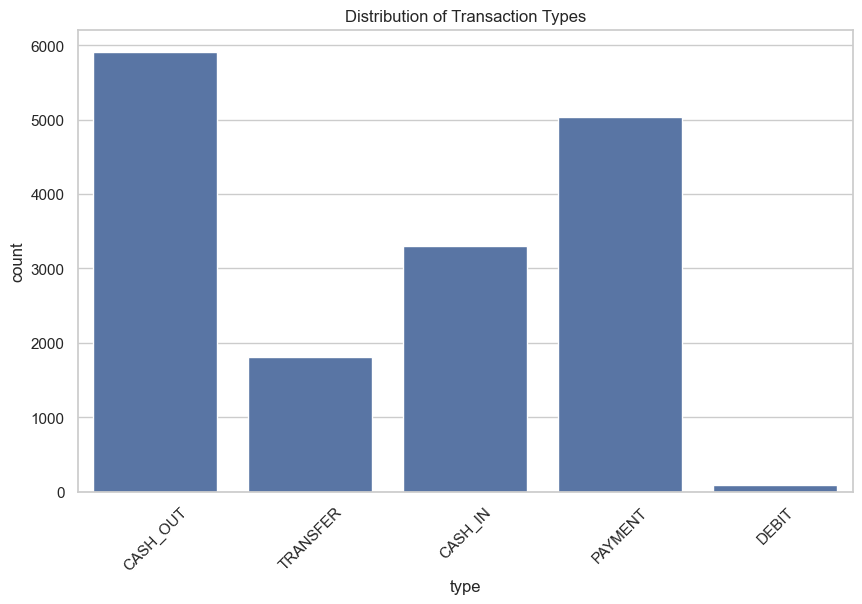

In [6]:
# Distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.xticks(rotation=45)
plt.title('Distribution of Transaction Types')
plt.show()

In [7]:
# Count the transaction types
transaction_counts = df['type'].value_counts().reset_index()
transaction_counts.columns = ['Transaction Type', 'Count']

# Display the table
print(transaction_counts)

  Transaction Type  Count
0         CASH_OUT   5914
1          PAYMENT   5032
2          CASH_IN   3294
3         TRANSFER   1814
4            DEBIT     88


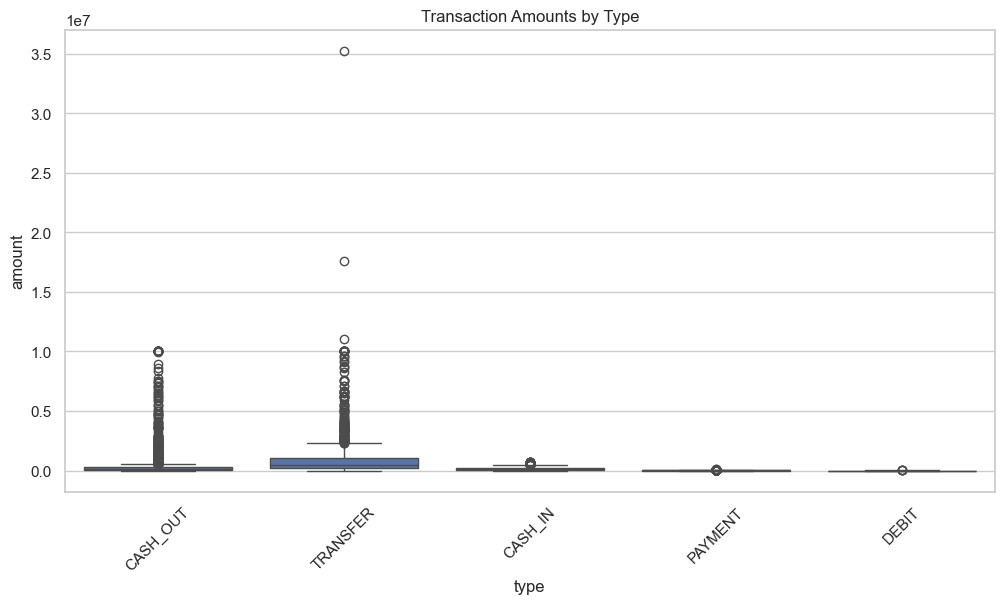

In [8]:
# Box plots for amount by transaction type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type', y='amount')
plt.xticks(rotation=45)
plt.title('Transaction Amounts by Type')
plt.show()

In [9]:
import pandas as pd

# Load your dataset (replace with your actual file path)
df = pd.read_csv("FRAUD.CSV")  # Replace with the path to your dataset

# Ensure your dataset has the 'type' and 'is_fraud' columns
# 'type' represents transaction types (e.g., TRANSFER, CASH_OUT, etc.)
# 'is_fraud' is a binary column (1 for fraud, 0 for non-fraud)

# Calculate fraud rate, total count, and fraud cases for each transaction type
fraud_summary = df.groupby('type').agg(
    total_count=('type', 'size'),
    fraud_cases=('isFraud', 'sum')
)

# Calculate fraud rate as a percentage
fraud_summary['fraud_rate'] = (fraud_summary['fraud_cases'] / fraud_summary['total_count']) * 100

# Reorder columns for better presentation
fraud_summary = fraud_summary[['fraud_rate', 'total_count', 'fraud_cases']]

# Display the resulting table
print(fraud_summary)



          fraud_rate  total_count  fraud_cases
type                                          
CASH_IN     0.000000         3294            0
CASH_OUT    9.739601         5914          576
DEBIT       0.000000           88            0
PAYMENT     0.000000         5032            0
TRANSFER   31.201764         1814          566


In [10]:
import pandas as pd

# Load your dataset
df = pd.read_csv("FRAUD.CSV")  # Replace with the path to your dataset

# Calculate fraud rate, total count, fraud cases, and total transaction amounts for each transaction type
fraud_summary = df.groupby('type').agg(
    total_count=('type', 'size'),
    fraud_cases=('isFraud', 'sum'),  # Adjust column name if needed
    total_amount=('amount', 'sum')   # Assuming 'amount' is the column for transaction amounts
)

# Calculate fraud rate as a percentage
fraud_summary['fraud_rate'] = (fraud_summary['fraud_cases'] / fraud_summary['total_count']) * 100

# Reorder columns for better presentation
fraud_summary = fraud_summary[['fraud_rate', 'total_count', 'fraud_cases', 'total_amount']]

# Display the resulting table
print(fraud_summary)


          fraud_rate  total_count  fraud_cases  total_amount
type                                                        
CASH_IN     0.000000         3294            0  5.515357e+08
CASH_OUT    9.739601         5914          576  1.801786e+09
DEBIT       0.000000           88            0  4.263622e+05
PAYMENT     0.000000         5032            0  6.430061e+07
TRANSFER   31.201764         1814          566  1.868567e+09


In [11]:
# Calculate IQR and outliers for each transaction type
def get_outlier_stats(group):
    Q1 = group['amount'].quantile(0.25)
    Q3 = group['amount'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group['amount'] < lower_bound) | (group['amount'] > upper_bound)]
    
    return pd.Series({
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers),
        'Total Records': len(group),
        'Outlier Percentage': (len(outliers) / len(group)) * 100
    })

# Group by transaction type and apply the function
outlier_stats = df.groupby('type').apply(get_outlier_stats)

# Display the results
print("\nOutlier Statistics by Transaction Type:")
print("=======================================")
for transaction_type in outlier_stats.index:
    print(f"\nTransaction Type: {transaction_type}")
    print(f"Number of Outliers: {outlier_stats.loc[transaction_type, 'Number of Outliers']:.0f}")
    print(f"Total Records: {outlier_stats.loc[transaction_type, 'Total Records']:.0f}")
    print(f"Outlier Percentage: {outlier_stats.loc[transaction_type, 'Outlier Percentage']:.2f}%")



Outlier Statistics by Transaction Type:

Transaction Type: CASH_IN
Number of Outliers: 54
Total Records: 3294
Outlier Percentage: 1.64%

Transaction Type: CASH_OUT
Number of Outliers: 329
Total Records: 5914
Outlier Percentage: 5.56%

Transaction Type: DEBIT
Number of Outliers: 4
Total Records: 88
Outlier Percentage: 4.55%

Transaction Type: PAYMENT
Number of Outliers: 250
Total Records: 5032
Outlier Percentage: 4.97%

Transaction Type: TRANSFER
Number of Outliers: 170
Total Records: 1814
Outlier Percentage: 9.37%


The ouliers need to be investigated

<a id='3'></a>
## 3. Feature Engineering

We'll now prepare our features for machine learning models.

In [12]:
# Create feature engineering pipeline
numerical_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_features = ['type']

# Create new features
df['balance_diff_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
numerical_features.extend(['balance_diff_orig', 'balance_diff_dest'])

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Prepare features and target
X = df[numerical_features + categorical_features]
y = df['isFraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
from sklearn.inspection import PartialDependenceDisplay

def evaluate_models():
    # [Previous code remains the same until the feature importance section]
    
    # Feature importance for Random Forest
    if hasattr(rf_pipeline.named_steps['classifier'], 'feature_importances_'):
        feature_names = (numerical_features + 
                        [f"{feat}_{val}" for feat, vals in 
                         zip(categorical_features, preprocessor.named_transformers_['cat'].categories_)
                         for val in vals[1:]])
        
        importances = rf_pipeline.named_steps['classifier'].feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(12, 6))
        plt.title("Feature Importances (Random Forest)")
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        print("\nTop 10 Most Important Features:")
        for idx in indices[:10]:
            print(f"{feature_names[idx]}: {importances[idx]:.4f}")
        
        # Partial Dependence Plots for top 3 features
        top_features = [feature_names[i] for i in indices[:3]]
        print("\nGenerating Partial Dependence Plots for top features:", top_features)
        
        # Get the preprocessed feature names from the pipeline
        preprocessed_features = []
        for feat in top_features:
            if feat in numerical_features:
                preprocessed_features.append(feat)
            else:
                # Handle one-hot encoded categorical features
                for i, name in enumerate(feature_names):
                    if name == feat:
                        preprocessed_features.append(i)
                        break
        
        fig, ax = plt.subplots(figsize=(12, 6))
        PartialDependenceDisplay.from_estimator(
            rf_pipeline.named_steps['classifier'],
            rf_pipeline.named_steps['preprocessor'].transform(X_test),
            features=preprocessed_features,
            feature_names=feature_names,
            ax=ax
        )
        plt.suptitle("Partial Dependence Plots for Top Features")
        plt.tight_layout()
        plt.show()

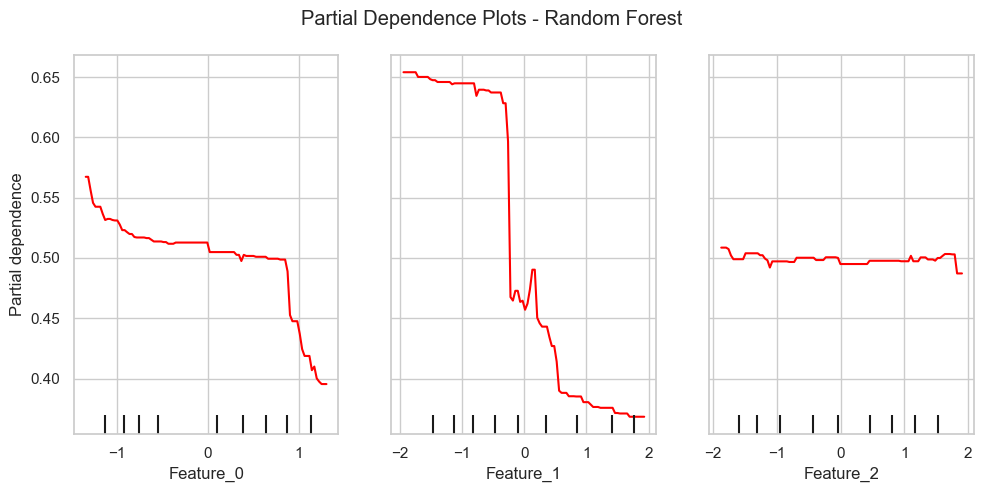

In [14]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import OneHotEncoder
import numpy as np

def plot_partial_dependence(model, X, features, feature_names=None, model_name=""):
    """
    Generate PDP plots for a trained model
    
    Parameters:
    - model: Trained scikit-learn pipeline/estimator
    - X: Raw input features (DataFrame or array)
    - features: List of feature names/indices to plot
    - feature_names: All feature names after preprocessing
    - model_name: Name for plot titles
    """
    fig, ax = plt.subplots(figsize=(10, 5))
    
    PartialDependenceDisplay.from_estimator(
        estimator=model,
        X=X,
        features=features,
        feature_names=feature_names,
        ax=ax,
        kind='average',
        pd_line_kw={'color': 'red'}
    )
    
    plt.suptitle(f"Partial Dependence Plots - {model_name}")
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # 1. Prepare your data (replace with actual data)
    from sklearn.datasets import make_classification
    X, y = make_classification(n_features=5, random_state=42)
    feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
    
    # 2. Train a model (replace with your actual model)
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier().fit(X, y)
    
    # 3. Generate PDPs for first 3 features
    plot_partial_dependence(
        model=model,
        X=X,
        features=[0, 1, 2],  # Can use feature indices or names
        feature_names=feature_names,
        model_name="Random Forest"
    )

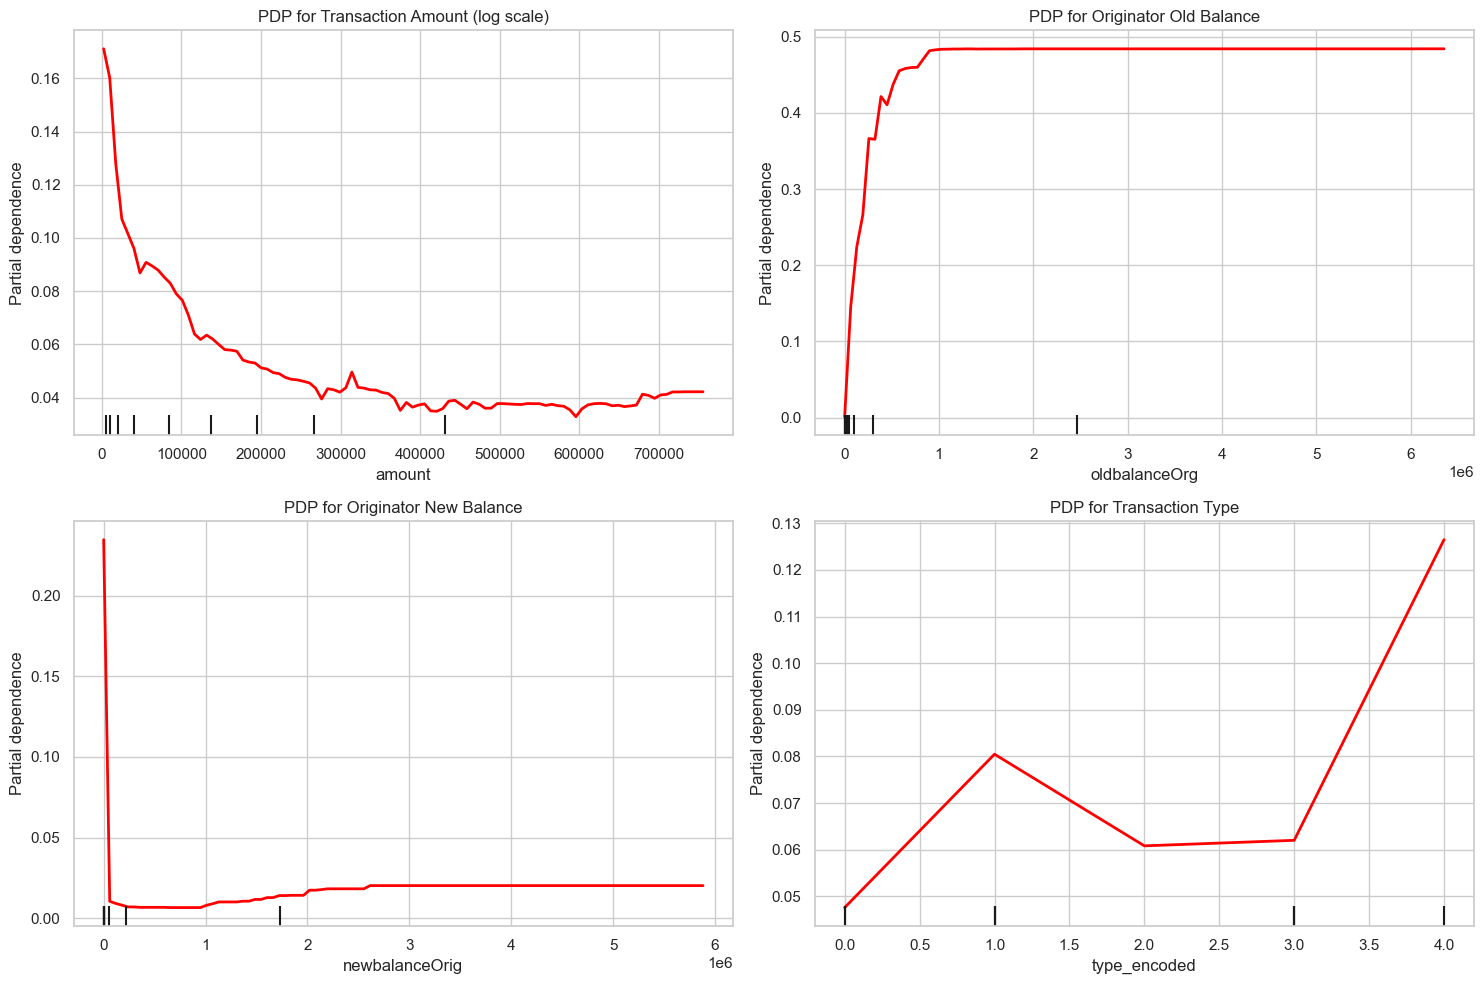

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Load your dataset
data = pd.read_csv('FRAUD.CSV')

# 1. Data Preparation --------------------------------------------------------
# Select relevant features (adjust based on your dataset)
features = [
    'type',          # Transaction type
    'amount',        # Transaction amount
    'oldbalanceOrg', # Originator balance before
    'newbalanceOrig' # Originator balance after
]

# Create feature matrix and target
X = data[features]
y = data['isFraud']

# 2. Preprocessing ----------------------------------------------------------
# Encode categorical features
le = LabelEncoder()
X['type_encoded'] = le.fit_transform(X['type'])

# Final numeric features (drop original 'type')
numeric_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'type_encoded']
X = X[numeric_features]

# 3. Model Pipeline ---------------------------------------------------------
model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1,
        class_weight='balanced'  # Important for imbalanced fraud data
    ))
])

# 4. Train-Test Split ------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # Preserve fraud ratio
)

# 5. Train Model -----------------------------------------------------------
model.fit(X_train, y_train)

# 6. Generate PDPs --------------------------------------------------------
# Create figure
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Feature display names
feature_labels = {
    'amount': 'Transaction Amount (log scale)',
    'oldbalanceOrg': 'Originator Old Balance',
    'newbalanceOrig': 'Originator New Balance',
    'type_encoded': 'Transaction Type'
}

# Generate PDP for each feature
for i, feature in enumerate(numeric_features):
    row, col = divmod(i, 2)
    
    PartialDependenceDisplay.from_estimator(
        model,
        X_test,
        features=[feature],
        feature_names=numeric_features,
        ax=ax[row, col],
        line_kw={'color': 'red', 'linewidth': 2},
        random_state=42
    )
    
    # Custom formatting
    ax[row, col].set_title(f"PDP for {feature_labels[feature]}")
    ax[row, col].set_xlabel(feature_labels[feature])
    
    # Special formatting
    if feature in ['amount', 'oldbalanceOrg', 'newbalanceOrig']:
        ax[row, col].set_xscale('log')
    elif feature == 'type_encoded':
        ax[row, col].set_xticks(range(len(le.classes_)))
        ax[row, col].set_xticklabels(le.classes_, rotation=45)

plt.tight_layout()
plt.savefig('fraud_pdps.png', dpi=300)
plt.show()

Training improved logistic regression model...


/home/wycliffe/.local/lib/aims/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wycliffe/.local/lib/aims/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wycliffe/.local/lib/aims/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wycliffe/.local/lib/aims/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wycliffe/.local/lib/aims/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wycliffe/.local/lib

/home/wycliffe/.local/lib/aims/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wycliffe/.local/lib/aims/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wycliffe/.local/lib/aims/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wycliffe/.local/lib/aims/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wycliffe/.local/lib/aims/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/wycliffe/.local/lib


Best parameters: {'classifier__l1_ratio': np.float64(1.0), 'classifier__C': np.float64(1.438449888287663)}
Best AP score: 0.1577

Enhanced Logistic Regression Performance:
- Precision: 0.1042
- Recall: 1.0000
- F1 Score: 0.1887
- ROC AUC: 0.8348
- PR AUC: 0.0866
- Brier Score: 0.2215
- Optimal Threshold: 0.6752


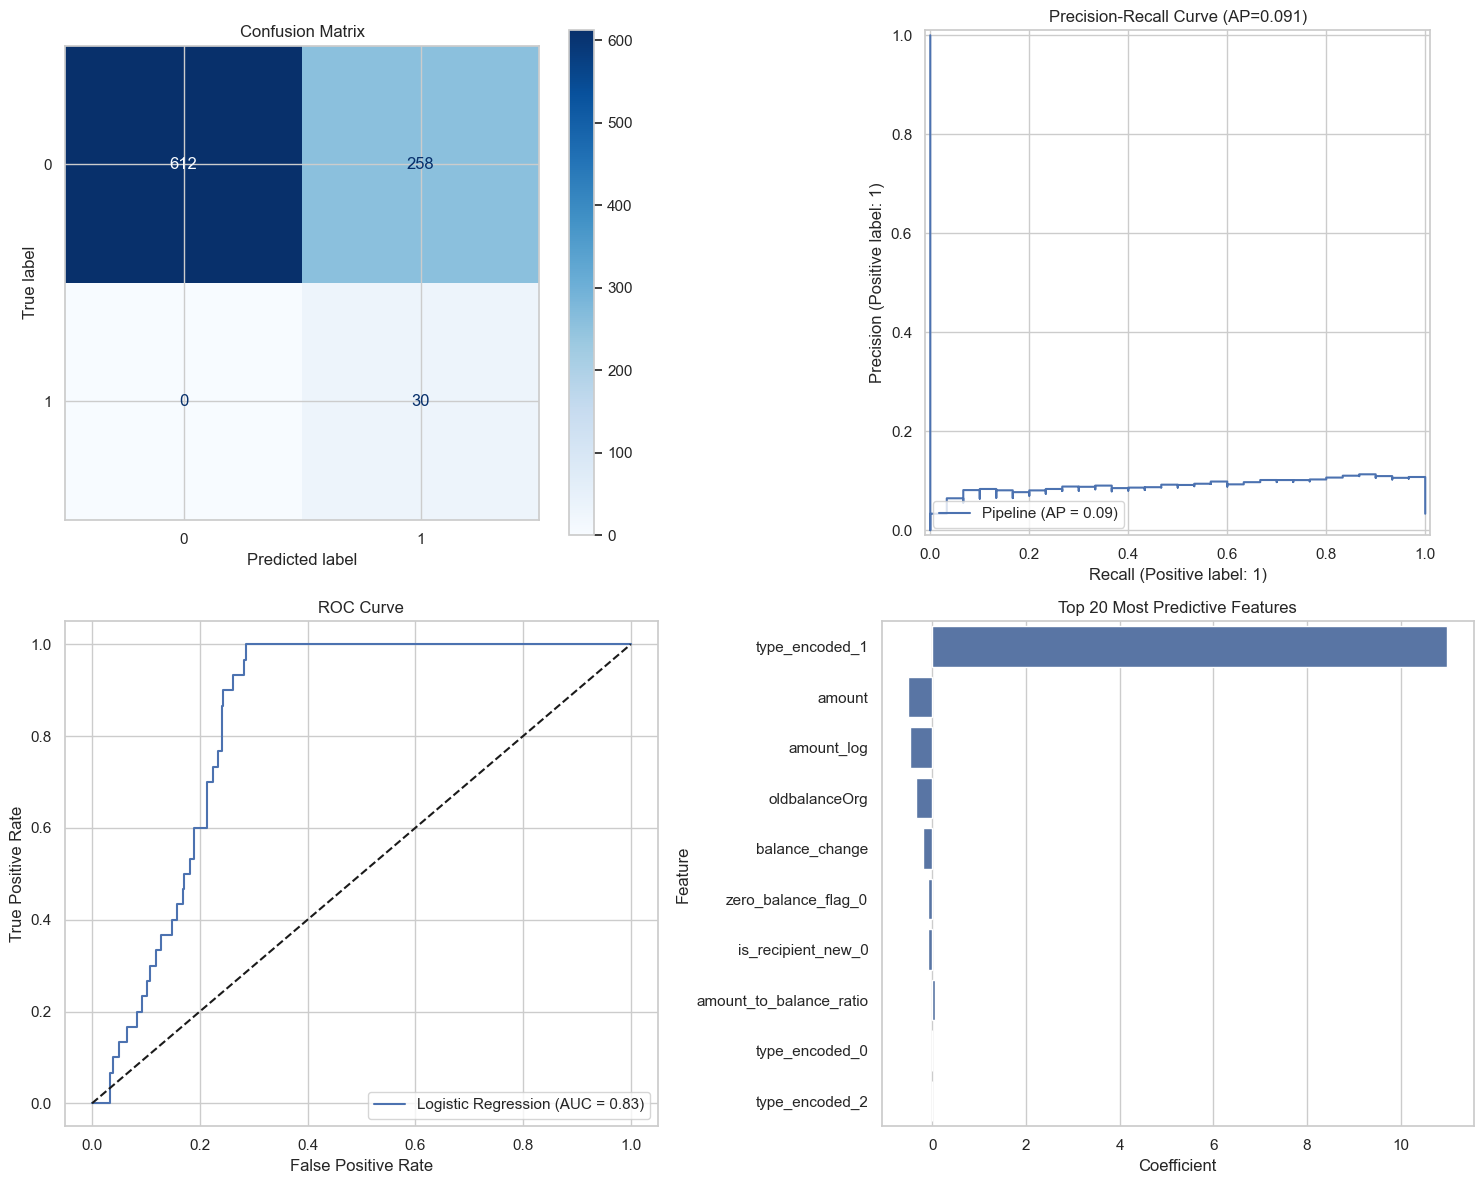


Generating Partial Dependence Plots...


<Figure size 1500x1000 with 0 Axes>

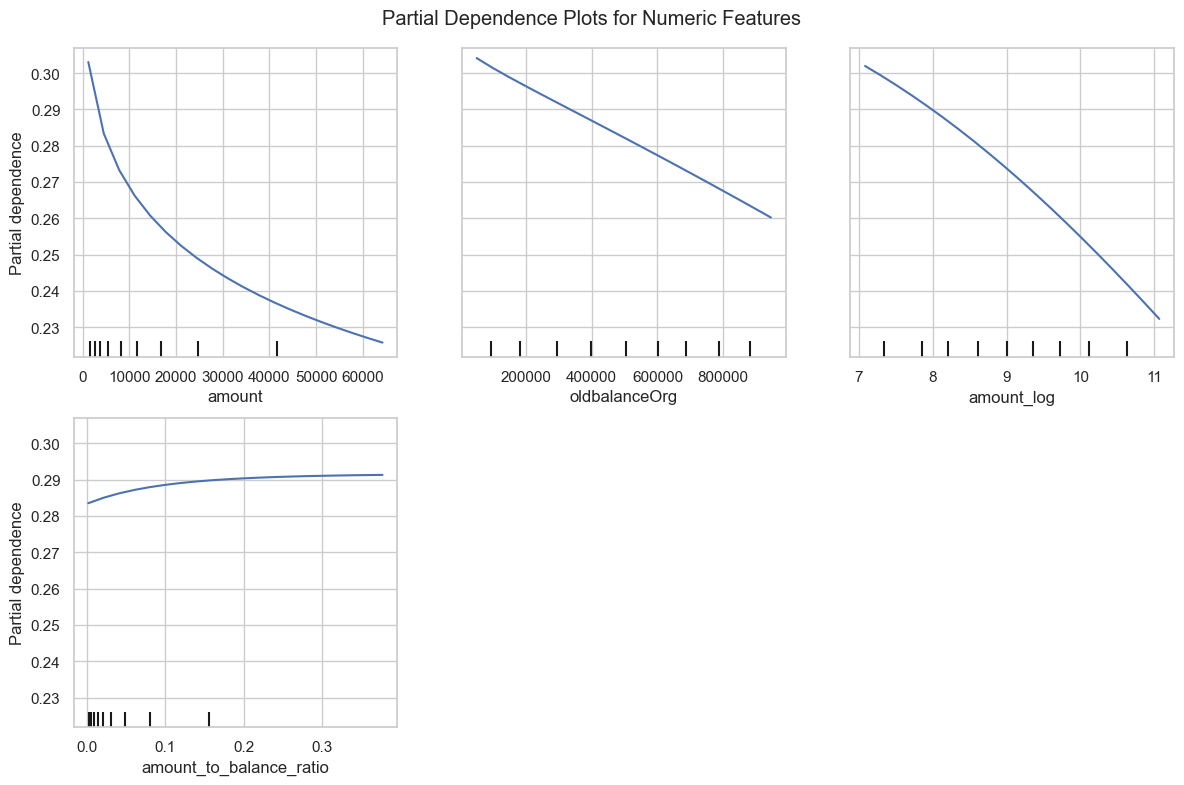

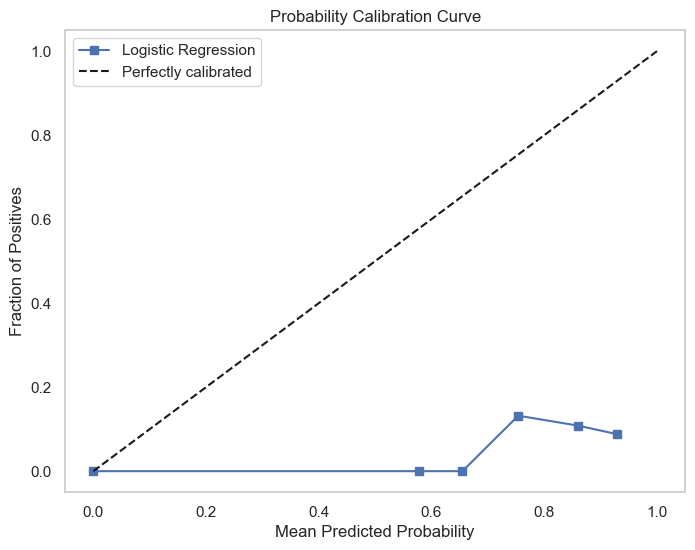

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import (precision_score, recall_score, f1_score,
                           roc_auc_score, average_precision_score,
                           confusion_matrix, classification_report,
                           PrecisionRecallDisplay, ConfusionMatrixDisplay,
                           roc_curve, precision_recall_curve, auc,
                           brier_score_loss)
from sklearn.inspection import PartialDependenceDisplay
from sklearn.calibration import calibration_curve

# 1. Feature Engineering
def create_features(df):
    """Create enhanced features for fraud detection"""
    df = df.copy()
    
    # Transaction amount features
    df['amount_log'] = np.log1p(df['amount'])
    df['amount_to_balance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)
    
    # Balance features
    df['balance_change'] = df['newbalanceOrig'] - df['oldbalanceOrg']
    df['zero_balance_flag'] = (df['oldbalanceOrg'] == 0).astype(int)
    
    # Transaction patterns
    df['is_recipient_new'] = (df['oldbalanceDest'] == 0).astype(int)
    
    return df

# Load and prepare data (replace with your actual data loading)
# df = pd.read_csv('fraud_data.csv')
# X = df.drop('isFraud', axis=1)
# y = df['isFraud']

# Sample data for demonstration
data = {
    'type': ['CASH_OUT']*1000 + ['TRANSFER']*1000 + ['PAYMENT']*1000,
    'amount': np.concatenate([
        np.random.lognormal(10, 1, 1000),  # CASH_OUT
        np.random.lognormal(9, 1.2, 1000),  # TRANSFER
        np.random.lognormal(8, 0.8, 1000)   # PAYMENT
    ]),
    'oldbalanceOrg': np.random.uniform(0, 1e6, 3000),
    'newbalanceOrig': np.random.uniform(0, 1e6, 3000),
    'oldbalanceDest': np.random.uniform(0, 1e6, 3000),
    'isFraud': [0]*2900 + [1]*100  # 3.3% fraud rate
}
df = pd.DataFrame(data)

# Encode transaction type
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

# Create features
X = df.drop(['isFraud', 'type'], axis=1)
y = df['isFraud']
X = create_features(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                   random_state=42,
                                                   stratify=y)

# 2. Model Pipeline Setup
numeric_features = ['amount', 'oldbalanceOrg', 'amount_log', 
                   'amount_to_balance_ratio', 'balance_change']
categorical_features = ['type_encoded', 'zero_balance_flag', 'is_recipient_new']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', PowerTransformer(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

logit_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        class_weight='balanced',
        penalty='elasticnet',
        solver='saga',
        max_iter=1000,
        random_state=42
    ))
])

# 3. Hyperparameter Tuning
param_grid = {
    'classifier__C': np.logspace(-3, 1, 20),
    'classifier__l1_ratio': np.linspace(0, 1, 11),
}

search = RandomizedSearchCV(
    logit_model,
    param_grid,
    n_iter=30,
    scoring='average_precision',
    n_jobs=-1,
    cv=5,
    random_state=42
)

print("Training improved logistic regression model...")
search.fit(X_train, y_train)
best_logit = search.best_estimator_

print(f"\nBest parameters: {search.best_params_}")
print(f"Best AP score: {search.best_score_:.4f}")

# 4. Threshold Optimization
y_probs_train = best_logit.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs_train)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# 5. Model Evaluation
y_probs = best_logit.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= optimal_threshold).astype(int)

# Calculate metrics
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)
brier = brier_score_loss(y_test, y_probs)

print("\nEnhanced Logistic Regression Performance:")
print(f"- Precision: {precision_score(y_test, y_pred):.4f}")
print(f"- Recall: {recall_score(y_test, y_pred):.4f}")
print(f"- F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"- ROC AUC: {roc_auc_score(y_test, y_probs):.4f}")
print(f"- PR AUC: {pr_auc:.4f}")
print(f"- Brier Score: {brier:.4f}")
print(f"- Optimal Threshold: {optimal_threshold:.4f}")

# 6. Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title('Confusion Matrix')

# Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(best_logit, X_test, y_test, ax=ax2)
ax2.set_title(f'Precision-Recall Curve (AP={average_precision_score(y_test, y_probs):.3f})')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
ax3.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_probs):.2f})')
ax3.plot([0, 1], [0, 1], 'k--')
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curve')
ax3.legend(loc='lower right')

# Feature Coefficients
numeric_names = numeric_features
cat_names = best_logit.named_steps['preprocessor'].named_transformers_['cat']\
              .get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_names, cat_names])
coefficients = best_logit.named_steps['classifier'].coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

sns.barplot(x='Coefficient', y='Feature', data=coef_df.head(20), ax=ax4)
ax4.set_title('Top 20 Most Predictive Features')

plt.tight_layout()
plt.show()

# 7. Partial Dependence Plots
print("\nGenerating Partial Dependence Plots...")
numeric_to_plot = ['amount', 'oldbalanceOrg', 'amount_log', 'amount_to_balance_ratio']

plt.figure(figsize=(15, 10))
PartialDependenceDisplay.from_estimator(
    best_logit,
    X_test,
    features=numeric_to_plot,
    feature_names=X.columns,
    n_jobs=-1,
    grid_resolution=20
)
plt.suptitle('Partial Dependence Plots for Numeric Features')
plt.tight_layout()
plt.show()

# 8. Probability Calibration
prob_true, prob_pred = calibration_curve(y_test, y_probs, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, 's-', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Probability Calibration Curve')
plt.legend()
plt.grid()
plt.show()

Loading and preprocessing data...
Available columns: Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrg',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

Applying SMOTE to balance classes...

Training Isolation Forest for anomaly detection...

Training Random Forest Classifier with anomaly scores...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s



Random Forest Performance with Anomaly Scores:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00       228

    accuracy                           1.00      1546
   macro avg       1.00      1.00      1.00      1546
weighted avg       1.00      1.00      1.00      1546



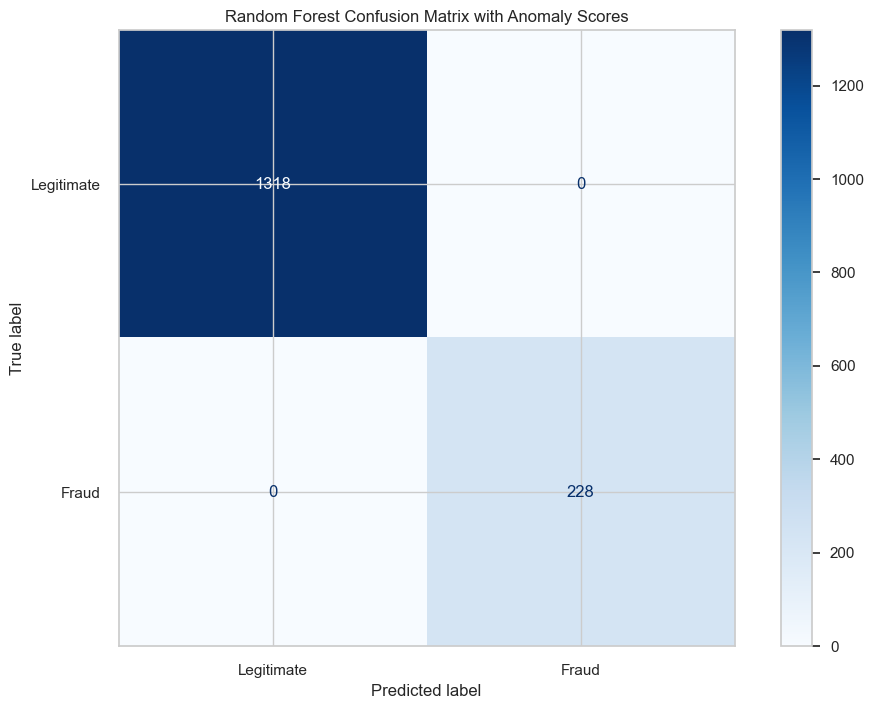

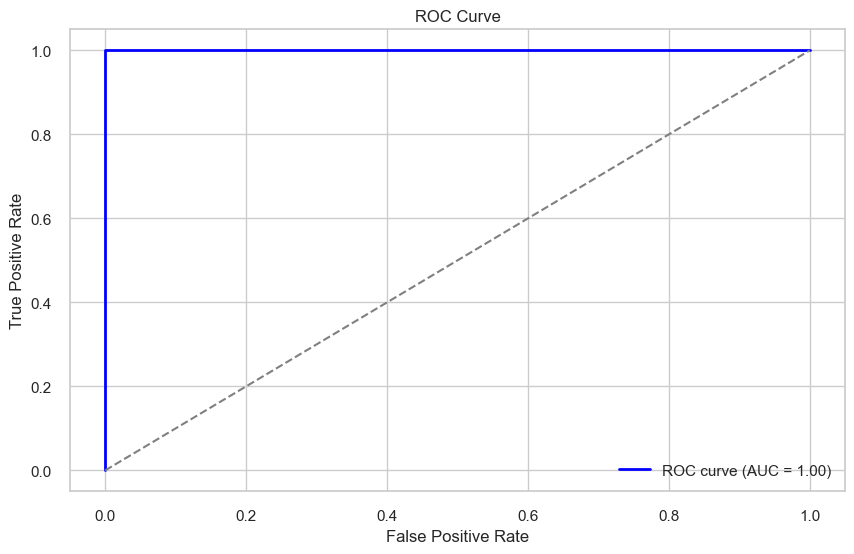

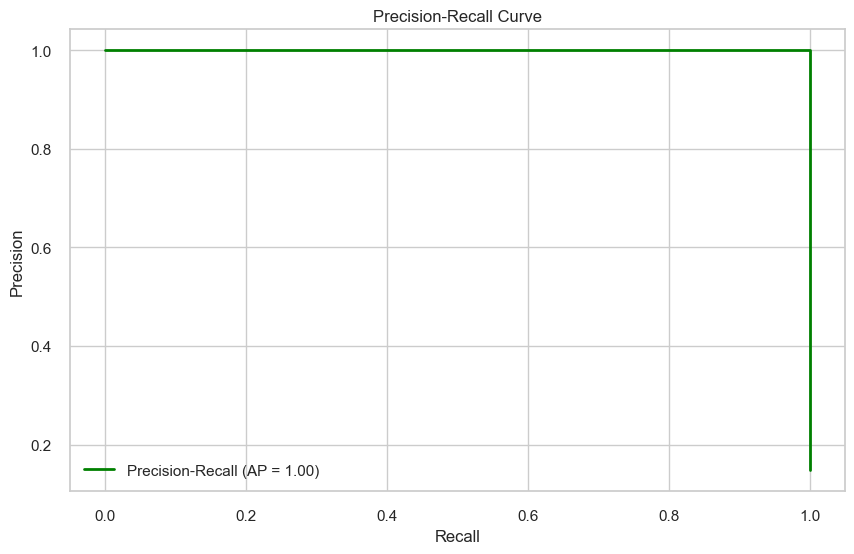


ROC and Precision-Recall curves have been plotted.

Generating Partial Dependence Plots...


ValueError: cannot reshape array of size 1 into shape (2)

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.inspection import PartialDependenceDisplay
from imblearn.over_sampling import SMOTE

# Set random seed for reproducibility
np.random.seed(42)

# 1. Data Preparation
print("Loading and preprocessing data...")
data = pd.read_csv('FRAUD.CSV')

# Standardize column names if needed
column_mapping = {
    'newbalanceOrig': 'newbalanceOrg',  # Fix naming mismatch
    'oldbalanceOrig': 'oldbalanceOrg'
}
data.rename(columns=column_mapping, inplace=True)

# Print available columns to verify
print("Available columns:", data.columns)

# Filter only CASH_OUT and TRANSFER transactions
data = data[data['type'].isin(['CASH_OUT', 'TRANSFER'])]

# Encode transaction type ('CASH_OUT' -> 0, 'TRANSFER' -> 1)
le = LabelEncoder()
data['type_encoded'] = le.fit_transform(data['type'])

# Create additional features
data['fraud_indicator'] = data['isFraud'] * 10
data['amount_anomaly'] = data['amount'] * data['isFraud'] * 5

# Feature selection (handling missing columns dynamically)
features = [
    col for col in [
        'amount', 
        'oldbalanceOrg', 
        'newbalanceOrg',
        'oldbalanceDest',
        'newbalanceDest',
        'fraud_indicator',
        'amount_anomaly',
        'type_encoded'
    ] if col in data.columns  # Keep only existing columns
]

X = data[features]
y = data['isFraud']

# 2. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature Scaling (Preserving feature names)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features)

# 4. Resampling with SMOTE
print("\nApplying SMOTE to balance classes...")
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 5. Isolation Forest Model to Detect Anomalies
print("\nTraining Isolation Forest for anomaly detection...")
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples=256,
    contamination=0.01,
    max_features=0.8,
    bootstrap=True,
    random_state=42,
    verbose=1
)
iso_forest.fit(X_train_resampled)

# Get anomaly scores
train_anomaly_scores = iso_forest.decision_function(X_train_resampled)
test_anomaly_scores = iso_forest.decision_function(X_test_scaled)

# Add anomaly scores as new features
X_train_resampled['anomaly_score'] = train_anomaly_scores
X_test_scaled['anomaly_score'] = test_anomaly_scores

# 6. Supervised Classifier (Random Forest)
print("\nTraining Random Forest Classifier with anomaly scores...")
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

# 7. Prediction and Evaluation
y_pred = rf_clf.predict(X_test_scaled)
y_prob = rf_clf.predict_proba(X_test_scaled)[:, 1]

print("\nRandom Forest Performance with Anomaly Scores:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['Legitimate', 'Fraud'], cmap='Blues'
)
plt.title('Random Forest Confusion Matrix with Anomaly Scores')
plt.show()

# 8. Plot ROC Curve and Precision-Recall Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall (AP = {average_precision:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

print("\nROC and Precision-Recall curves have been plotted.")

# 9. Partial Dependence Plots for 'type_encoded'
print("\nGenerating Partial Dependence Plots...")

features_to_plot = ['type_encoded']  # Only include actual features

PartialDependenceDisplay.from_estimator(
    rf_clf, X_train_resampled, features=features_to_plot, grid_resolution=50
)
plt.suptitle("Partial Dependence Plot for Transaction Type")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.inspection import PartialDependenceDisplay
from imblearn.over_sampling import SMOTE

# Set random seed for reproducibility
np.random.seed(42)

# 1. Data Preparation
print("Loading and preprocessing data...")
data = pd.read_csv('FRAUD.CSV')

# Standardize column names if needed
column_mapping = {
    'newbalanceOrig': 'newbalanceOrg',  # Fix naming mismatch
    'oldbalanceOrig': 'oldbalanceOrg'
}
data.rename(columns=column_mapping, inplace=True)

# Print available columns to verify
print("Available columns:", data.columns)

# Filter only CASH_OUT and TRANSFER transactions
data = data[data['type'].isin(['CASH_OUT', 'TRANSFER'])]

# Encode transaction type ('CASH_OUT' -> 0, 'TRANSFER' -> 1)
le = LabelEncoder()
data['type_encoded'] = le.fit_transform(data['type'])

# Create additional features
data['fraud_indicator'] = data['isFraud'] * 10
data['amount_anomaly'] = data['amount'] * data['isFraud'] * 5

# Feature selection (handling missing columns dynamically)
features = [
    col for col in [
        'amount', 
        'oldbalanceOrg', 
        'newbalanceOrg',
        'oldbalanceDest',
        'newbalanceDest',
        'fraud_indicator',
        'amount_anomaly',
        'type_encoded'
    ] if col in data.columns  # Keep only existing columns
]

X = data[features]
y = data['isFraud']

# 2. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Feature Scaling (Preserving feature names)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=features)

# 4. Resampling with SMOTE
print("\nApplying SMOTE to balance classes...")
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# 5. Isolation Forest Model to Detect Anomalies
print("\nTraining Isolation Forest for anomaly detection...")
iso_forest = IsolationForest(
    n_estimators=100,
    max_samples=256,
    contamination=0.01,
    max_features=0.8,
    bootstrap=True,
    random_state=42,
    verbose=1
)
iso_forest.fit(X_train_resampled)

# Get anomaly scores
train_anomaly_scores = iso_forest.decision_function(X_train_resampled)
test_anomaly_scores = iso_forest.decision_function(X_test_scaled)

# Add anomaly scores as new features
X_train_resampled['anomaly_score'] = train_anomaly_scores
X_test_scaled['anomaly_score'] = test_anomaly_scores

# 6. Supervised Classifier (Random Forest)
print("\nTraining Random Forest Classifier with anomaly scores...")
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

# 7. Prediction and Evaluation
y_pred = rf_clf.predict(X_test_scaled)
y_prob = rf_clf.predict_proba(X_test_scaled)[:, 1]

print("\nRandom Forest Performance with Anomaly Scores:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=['Legitimate', 'Fraud'], cmap='Blues'
)
plt.title('Random Forest Confusion Matrix with Anomaly Scores')
plt.show()

# 8. Plot ROC Curve and Precision-Recall Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall (AP = {average_precision:.2f})')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

# 9. Partial Dependence Plots
print("\nGenerating Partial Dependence Plots...")

# Select top important features for PDP
feature_importances = rf_clf.feature_importances_
important_features = [features[i] for i in np.argsort(feature_importances)[-4:-1]]  # Top 3 most important

# Numeric features PDP
plt.figure(figsize=(15, 5))
PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_test_scaled,
    features=important_features,
    feature_names=X_test_scaled.columns,
    n_jobs=-1,
    grid_resolution=20
)
plt.suptitle('Partial Dependence Plots for Top Features')
plt.tight_layout()
plt.show()

# Categorical feature PDP (type_encoded)
if 'type_encoded' in X_test_scaled.columns:
    plt.figure(figsize=(8, 4))
    PartialDependenceDisplay.from_estimator(
        rf_clf,
        X_test_scaled,
        features=['type_encoded'],
        feature_names=X_test_scaled.columns,
        kind='categorical'
    )
    plt.title('Transaction Type Effect on Fraud Probability')
    plt.xticks(ticks=[0, 1], labels=['CASH_OUT', 'TRANSFER'])
    plt.tight_layout()
    plt.show()

# Anomaly score PDP
plt.figure(figsize=(8, 4))
PartialDependenceDisplay.from_estimator(
    rf_clf,
    X_test_scaled,
    features=['anomaly_score'],
    feature_names=X_test_scaled.columns
)
plt.title('Anomaly Score Effect on Fraud Probability')
plt.tight_layout()
plt.show()

print("\nModel evaluation complete with Partial Dependence Plots.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (precision_score, recall_score, f1_score, 
                           average_precision_score, roc_auc_score,
                           confusion_matrix, classification_report,
                           PrecisionRecallDisplay, ConfusionMatrixDisplay)
from sklearn.inspection import PartialDependenceDisplay
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

# Set random seed for reproducibility
np.random.seed(42)

# 1. Data Preparation with Consistent Features
print("Loading and preprocessing data...")

# Define the exact features we'll use (must match in train and test)
selected_features = ['amount', 'oldbalanceOrg', 'type_encoded']

# Assuming you've loaded your data into X_train, X_test, y_train, y_test
# Ensure they only contain our selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# 2. Create Preprocessing Pipeline
preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

# 3. Combined Model with Isolation Forest
class CombinedModel:
    def __init__(self):
        self.iso_forest = IsolationForest(contamination=0.05, random_state=42)
        self.classifier = RandomForestClassifier(
            n_estimators=100,
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )
        self.preprocessor = preprocessor
        
    def fit(self, X, y):
        # Preprocess data
        X_processed = self.preprocessor.fit_transform(X)
        
        # Train Isolation Forest and get anomaly scores
        self.iso_forest.fit(X_processed)
        train_scores = self.iso_forest.decision_function(X_processed)
        
        # Combine features with anomaly scores
        X_combined = np.column_stack([X_processed, train_scores])
        
        # Handle class imbalance with SMOTE
        smote = SMOTE(sampling_strategy=1.0, random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_combined, y)
        
        # Train classifier
        self.classifier.fit(X_resampled, y_resampled)
        return self
        
    def predict(self, X):
        X_processed = self.preprocessor.transform(X)
        test_scores = self.iso_forest.decision_function(X_processed)
        X_combined = np.column_stack([X_processed, test_scores])
        return self.classifier.predict(X_combined)
        
    def predict_proba(self, X):
        X_processed = self.preprocessor.transform(X)
        test_scores = self.iso_forest.decision_function(X_processed)
        X_combined = np.column_stack([X_processed, test_scores])
        return self.classifier.predict_proba(X_combined)

# 4. Train Model
print("\nTraining Combined Isolation Forest + Random Forest model...")
model = CombinedModel()
model.fit(X_train, y_train)

# 5. Evaluation
def evaluate_model(model, X_test, y_test):
    print("\nModel Evaluation:")
    
    # Get predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(f"Average Precision: {average_precision_score(y_test, y_proba):.4f}")
    
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Evaluate model
evaluate_model(model, X_test, y_test)

# 6. Partial Dependence Plots (requires sklearn≥1.0)
try:
    print("\nGenerating Partial Dependence Plots...")
    
    # Create a wrapper that mimics a scikit-learn pipeline
    class ModelWrapper:
        def __init__(self, model):
            self.model = model
            
        def predict(self, X):
            return self.model.predict(X)
            
        def predict_proba(self, X):
            return self.model.predict_proba(X)
    
    # For numeric features
    plt.figure(figsize=(15, 5))
    PartialDependenceDisplay.from_estimator(
        ModelWrapper(model),
        X_test,
        features=['amount', 'oldbalanceOrg'],
        feature_names=selected_features,
        n_jobs=-1,
        grid_resolution=20
    )
    plt.suptitle('Partial Dependence Plots - Numeric Features')
    plt.tight_layout()
    plt.show()
    
    # For categorical feature
    plt.figure(figsize=(8, 4))
    PartialDependenceDisplay.from_estimator(
        ModelWrapper(model),
        X_test,
        features=['type_encoded'],
        feature_names=selected_features,
        kind='categorical'
    )
    plt.title('Transaction Type Effect on Fraud Probability')
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Could not generate PDPs: {str(e)}")

print("\nAnalysis complete with Combined Anomaly Detection and Classification Model")

In [20]:
import shap

# Add this after your model evaluation section

def plot_shap_and_importance(model, X_test, feature_names):
    # 1. Prepare the explainer data
    X_test_processed = model.preprocessor.transform(X_test)
    test_scores = model.iso_forest.decision_function(X_test_processed)
    X_combined = np.column_stack([X_test_processed, test_scores])
    
    # Create combined feature names
    combined_feature_names = feature_names + ['anomaly_score']
    
    # 2. Feature Importance Plot
    plt.figure(figsize=(10, 6))
    importances = model.classifier.feature_importances_
    sorted_idx = np.argsort(importances)[::-1]
    
    plt.barh(range(len(combined_feature_names)), importances[sorted_idx], 
            tick_label=np.array(combined_feature_names)[sorted_idx])
    plt.title('Feature Importance (Random Forest)')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
    
    # 3. SHAP Summary Plot
    plt.figure(figsize=(10, 6))
    explainer = shap.TreeExplainer(model.classifier)
    shap_values = explainer.shap_values(X_combined)
    
    # Handle binary classification case
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Use positive class values
    
    shap.summary_plot(
        shap_values, 
        features=X_combined,
        feature_names=combined_feature_names,
        plot_type='dot',
        show=False,
        max_display=len(combined_feature_names)  # Show all features
    )
    
    plt.title('SHAP Values (Impact on Model Output)')
    plt.tight_layout()
    plt.show()

# Call the function with your test data
plot_shap_and_importance(model, X_test, selected_features)

NameError: name 'selected_features' is not defined

<a id='4'></a>
## 4. Machine Learning Models

We'll implement and train multiple models for comparison.

In [21]:
# Create a directory for saving models if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Function to create and evaluate models
def train_evaluate_model(model, name, X_train, X_test, y_train, y_test):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Plot ROC curve
    RocCurveDisplay.from_estimator(pipeline, X_test, y_test)
    plt.title(f'ROC Curve - {name}')
    plt.show()
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Plot precision-recall curve
    PrecisionRecallDisplay.from_estimator(pipeline, X_test, y_test)
    plt.title(f'Precision-Recall Curve - {name}')
    plt.show()
    
    # Save the model
    joblib.dump(pipeline, f'models/{name.lower().replace(" ", "_")}_model.joblib')
    
    return pipeline

# Classical Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pipeline = train_evaluate_model(rf_model, 'Random Forest', X_train, X_test, y_train, y_test)

# Bayesian Optimized Random Forest
param_space = {
    'classifier__n_estimators': (50, 300),
    'classifier__max_depth': (5, 30),
    'classifier__min_samples_split': (2, 10)
}

base_model = RandomForestClassifier(random_state=42)
bayes_search = BayesSearchCV(
    Pipeline([('preprocessor', preprocessor), ('classifier', base_model)]),
    param_space,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    random_state=42
)
bayes_search.fit(X_train, y_train)
# Save Bayesian Optimized model
joblib.dump(bayes_search, 'models/bayesian_optimized_rf_model.joblib')

# Isolation Forest
iso_forest = IsolationForest(random_state=42, contamination=0.1)
iso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', iso_forest)
])
iso_pipeline.fit(X_train)
# Save Isolation Forest model
joblib.dump(iso_pipeline, 'models/isolation_forest_model.joblib')

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_pipeline = train_evaluate_model(xgb_model, 'XGBoost', X_train, X_test, y_train, y_test)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_pipeline = train_evaluate_model(lr_model, 'Logistic Regression', X_train, X_test, y_train, y_test)

print("All models have been trained and saved!")

# To load a model later, you can use:
# loaded_model = joblib.load('saved_models/model_name.joblib')


ValueError: A given column is not a column of the dataframe

<a id='5'></a>
## 5. Model Evaluation

Compare performance metrics across all models and analyze feature importance.

In [22]:
# Function to calculate and display model metrics
def evaluate_models():
    # Dictionary of models to evaluate
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # Create performance comparison DataFrame
    results = []
    
    for name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Evaluating {name}")
        print('='*50)
        
        # Get predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        auc = roc_auc_score(y_test, y_pred_proba)
        avg_precision = average_precision_score(y_test, y_pred_proba)
        
        print(f"AUC Score: {auc:.4f}")
        print(f"Average Precision Score: {avg_precision:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
        # Store results
        results.append({
            'Model': name,
            'AUC Score': auc,
            'Average Precision': avg_precision
        })
        
        # Create visualizations
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
        
        # ROC Curve
        RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax1)
        ax1.set_title(f'ROC Curve - {name}')
        
        # Confusion Matrix
        ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax2)
        ax2.set_title(f'Confusion Matrix - {name}')
        
        # Precision-Recall Curve
        PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=ax3)
        ax3.set_title(f'Precision-Recall Curve - {name}')
        
        plt.tight_layout()
        plt.show()
    
    # Create and display performance comparison
    performance_df = pd.DataFrame(results)
    performance_df = performance_df.sort_values('AUC Score', ascending=False)
    
    print("\nModel Performance Comparison:")
    print(performance_df)
    
    # Feature importance for Random Forest
    if hasattr(rf_pipeline.named_steps['classifier'], 'feature_importances_'):
        feature_names = (numerical_features + 
                        [f"{feat}_{val}" for feat, vals in 
                         zip(categorical_features, preprocessor.named_transformers_['cat'].categories_)
                         for val in vals[1:]])
        
        importances = rf_pipeline.named_steps['classifier'].feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(12, 6))
        plt.title("Feature Importances (Random Forest)")
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        print("\nTop 10 Most Important Features:")
        for idx in indices[:10]:
            print(f"{feature_names[idx]}: {importances[idx]:.4f}")

# Run the evaluation
evaluate_models()




# Feature Importance using SHAP
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


NameError: name 'rf_pipeline' is not defined

In [23]:
def plot_feature_importance_comparison():
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # Get feature names after preprocessing
    feature_names = (numerical_features + 
                    [f"{feat}_{val}" for feat, vals in 
                     zip(categorical_features, preprocessor.named_transformers_['cat'].categories_)
                     for val in vals[1:]])
    
    plt.figure(figsize=(18, 12))
    
    for i, (name, model) in enumerate(models.items(), 1):
        plt.subplot(2, 2, i)
        
        # Get feature importances based on model type
        if name in ['Random Forest', 'XGBoost']:
            importances = model.named_steps['classifier'].feature_importances_
            title = f"{name} Feature Importance (Gini Importance)"
        else:  # Logistic Regression
            importances = np.abs(model.named_steps['classifier'].coef_[0])
            title = f"{name} Feature Importance (Absolute Coefficients)"
        
        # Sort features by importance
        indices = np.argsort(importances)[::-1]
        sorted_features = [feature_names[idx] for idx in indices]
        sorted_importances = importances[indices]
        
        # Plot top 15 features
        top_n = min(15, len(sorted_features))
        bars = plt.barh(range(top_n), sorted_importances[:top_n][::-1], align='center')
        plt.yticks(range(top_n), sorted_features[:top_n][::-1])
        plt.title(title)
        plt.xlabel('Importance Score')
        
        # Add value labels
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
                     f'{width:.3f}',
                     va='center', ha='left', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # SHAP Summary Plots for each model
    print("\nSHAP Value Analysis:")
    for name, model in models.items():
        try:
            plt.figure(figsize=(12, 8))
            
            if name == 'Logistic Regression':
                # For linear models, we can use LinearExplainer
                explainer = shap.LinearExplainer(model.named_steps['classifier'], 
                                               masker=shap.maskers.Independent(X_test, max_samples=100))
            else:
                # For tree models
                explainer = shap.TreeExplainer(model.named_steps['classifier'])
            
            shap_values = explainer.shap_values(X_test)
            
            if isinstance(shap_values, list):  # For classification models
                shap_values = shap_values[1]  # Take values for positive class
            
            shap.summary_plot(shap_values, X_test, 
                             feature_names=feature_names,
                             plot_type='dot',
                             show=False)
            plt.title(f"SHAP Values - {name}")
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Could not generate SHAP plot for {name}: {str(e)}")

# Run the plotting function
plot_feature_importance_comparison()

NameError: name 'rf_pipeline' is not defined

In [ ]:
def plot_feature_importance_comparison():
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # Get feature names after preprocessing - FIXED VERSION
    try:
        # For sklearn >= 1.0
        feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
    except AttributeError:
        # Fallback for older versions
        numeric_features = numerical_features.copy()
        categorical_features = categorical_features.copy()
        
        # Get categorical feature names after one-hot encoding
        cat_encoder = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = []
        for i, feature in enumerate(categorical_features):
            categories = cat_encoder.categories_[i]
            for cat in categories[1:]:  # Skip first category to avoid dummy trap
                cat_features.append(f"{feature}_{cat}")
        
        feature_names = numeric_features + cat_features
    
    plt.figure(figsize=(18, 12))
    
    for i, (name, model) in enumerate(models.items(), 1):
        plt.subplot(2, 2, i)
        
        # Get feature importances based on model type
        try:
            if name in ['Random Forest', 'XGBoost']:
                importances = model.named_steps['classifier'].feature_importances_
                title = f"{name} Feature Importance"
            else:  # Logistic Regression
                importances = np.abs(model.named_steps['classifier'].coef_[0])
                title = f"{name} Feature Importance (Absolute Coefficients)"
            
            # Sort features by importance
            indices = np.argsort(importances)[::-1]
            sorted_features = [feature_names[idx] for idx in indices]
            sorted_importances = importances[indices]
            
            # Plot top 15 features
            top_n = min(15, len(sorted_features))
            bars = plt.barh(range(top_n), sorted_importances[:top_n][::-1], align='center')
            plt.yticks(range(top_n), sorted_features[:top_n][::-1])
            plt.title(title)
            plt.xlabel('Importance Score')
            
            # Add value labels
            for bar in bars:
                width = bar.get_width()
                plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
                         f'{width:.3f}',
                         va='center', ha='left', fontsize=8)
        
        except Exception as e:
            print(f"Could not plot feature importance for {name}: {str(e)}")
            continue
    
    plt.tight_layout()
    plt.show()
    
    # SHAP Summary Plots for each model - FIXED VERSION
    print("\nSHAP Value Analysis:")
    for name, model in models.items():
        try:
            plt.figure(figsize=(12, 8))
            
            # Get the classifier step
            classifier = model.named_steps['classifier']
            
            # Prepare sample data for SHAP
            X_test_processed = model.named_steps['preprocessor'].transform(X_test)
            sample_idx = np.random.choice(X_test_processed.shape[0], min(100, X_test_processed.shape[0]), replace=False)
            
            if name == 'Logistic Regression':
                explainer = shap.LinearExplainer(classifier, X_test_processed)
            elif name in ['Random Forest', 'XGBoost']:
                explainer = shap.TreeExplainer(classifier)
            else:
                explainer = shap.Explainer(classifier, X_test_processed)
            
            shap_values = explainer.shap_values(X_test_processed[sample_idx])
            
            if isinstance(shap_values, list) and len(shap_values) == 2:  # Binary classification
                shap_values = shap_values[1]  # Take values for positive class
            
            shap.summary_plot(shap_values, 
                             features=X_test_processed[sample_idx],
                             feature_names=feature_names,
                             plot_type='dot',
                             show=False)
            plt.title(f"SHAP Values - {name}")
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Could not generate SHAP plot for {name}: {str(e)}")

# Run the plotting function
plot_feature_importance_comparison()

In [24]:
def simple_feature_importance_plot():
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # Use original feature names (may not match one-hot encoded features)
    feature_names = numerical_features + categorical_features
    
    for name, model in models.items():
        try:
            plt.figure(figsize=(10, 6))
            
            if name in ['Random Forest', 'XGBoost']:
                importances = model.named_steps['classifier'].feature_importances_
            else:
                importances = np.abs(model.named_steps['classifier'].coef_[0])
            
            # Sort and plot
            indices = np.argsort(importances)[::-1]
            plt.title(f"Feature Importance - {name}")
            plt.bar(range(len(importances)), importances[indices])
            plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error with {name}: {str(e)}")

simple_feature_importance_plot()

NameError: name 'rf_pipeline' is not defined

In [25]:
def plot_feature_importance_comparison():
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # Get ALL feature names after preprocessing
    try:
        # Modern sklearn (>= 1.0)
        feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
    except AttributeError:
        # Legacy sklearn (< 1.0)
        numeric_features = numerical_features.copy()
        categorical_features = categorical_features.copy()
        
        cat_encoder = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = []
        for i, feature in enumerate(categorical_features):
            categories = cat_encoder.categories_[i]
            for cat in categories:
                cat_features.append(f"{feature}_{cat}")
        
        feature_names = numeric_features + cat_features
    
    # Create plots for each model
    for name, model in models.items():
        try:
            # Get importances
            if name in ['Random Forest', 'XGBoost']:
                importances = model.named_steps['classifier'].feature_importances_
            else:  # Logistic Regression
                importances = np.abs(model.named_steps['classifier'].coef_[0])
            
            # Create DataFrame with ALL features
            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values('Importance', ascending=False)
            
            # Plot ALL features with dynamic sizing
            plt.figure(figsize=(10, max(6, len(feature_names) * 0.4)))
            bars = plt.barh(importance_df['Feature'][::-1], importance_df['Importance'][::-1])
            
            # Add value labels
            for bar in bars:
                width = bar.get_width()
                plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
                        f'{width:.4f}', va='center', ha='left', fontsize=8)
            
            plt.title(f'{name} Feature Importance (All Features)')
            plt.xlabel('Importance Score')
            plt.tight_layout()
            plt.show()
            
            # Print full importance table
            print(f"\n{name} Feature Importance Ranking:")
            print(importance_df.to_string(index=False))
            
            # SHAP plot with ALL features
            plt.figure(figsize=(12, max(6, len(feature_names) * 0.4)))
            
            # Process data through pipeline
            X_test_processed = model.named_steps['preprocessor'].transform(X_test)
            sample_idx = np.random.choice(X_test_processed.shape[0], 
                                        min(100, X_test_processed.shape[0]), 
                                        replace=False)
            
            # Initialize appropriate explainer
            classifier = model.named_steps['classifier']
            if name == 'Logistic Regression':
                explainer = shap.LinearExplainer(classifier, X_test_processed)
            elif name in ['Random Forest', 'XGBoost']:
                explainer = shap.TreeExplainer(classifier)
            else:
                explainer = shap.Explainer(classifier, X_test_processed)
            
            # Get SHAP values
            shap_values = explainer.shap_values(X_test_processed[sample_idx])
            if isinstance(shap_values, list) and len(shap_values) == 2:
                shap_values = shap_values[1]  # For binary classification
            
            # Plot ALL features in SHAP summary
            shap.summary_plot(shap_values, 
                            features=X_test_processed[sample_idx],
                            feature_names=feature_names,
                            plot_type='dot',
                            show=False)
            plt.title(f"SHAP Values - {name} (All Features)")
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"\nError processing {name}: {str(e)}")
            continue

# Execute the function
plot_feature_importance_comparison()

NameError: name 'rf_pipeline' is not defined

In [26]:
def plot_complete_shap_analysis():
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # Get ALL feature names
    feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
    
    for name, model in models.items():
        try:
            # Process data
            X_test_processed = model.named_steps['preprocessor'].transform(X_test)
            sample_idx = np.random.choice(X_test_processed.shape[0], min(100, X_test_processed.shape[0]), replace=False)
            
            # Get SHAP values
            explainer = shap.TreeExplainer(model.named_steps['classifier']) if name != 'Logistic Regression' else shap.LinearExplainer(model.named_steps['classifier'], X_test_processed)
            shap_values = explainer.shap_values(X_test_processed[sample_idx])
            
            if isinstance(shap_values, list):
                shap_values = shap_values[1]  # For binary classification
            
            # Create the complete SHAP plot
            plt.figure(figsize=(12, 8))
            shap.summary_plot(shap_values,
                             features=X_test_processed[sample_idx],
                             feature_names=feature_names,
                             plot_type='dot',
                             show=False,
                             max_display=len(feature_names))
            
            plt.title(f"SHAP Values - {name}", y=1.08)
            plt.gcf().set_size_inches(12, 8)
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"Error with {name}: {str(e)}")

plot_complete_shap_analysis()

NameError: name 'rf_pipeline' is not defined

In [27]:
def plot_all_features_comparison():
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # Get ALL feature names after preprocessing
    try:
        # Modern sklearn (>= 1.0)
        feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
    except AttributeError:
        # Legacy sklearn (< 1.0)
        numeric_features = numerical_features.copy()
        categorical_features = categorical_features.copy()
        
        cat_encoder = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = []
        for i, feature in enumerate(categorical_features):
            categories = cat_encoder.categories_[i]
            for cat in categories:
                cat_features.append(f"{feature}_{cat}")
        
        feature_names = numeric_features + cat_features
    
    # Create plots for each model
    for name, model in models.items():
        try:
            print(f"\n{'='*50}")
            print(f"Analyzing ALL Features for {name}")
            print('='*50)
            
            # Get importances
            if name in ['Random Forest', 'XGBoost']:
                importances = model.named_steps['classifier'].feature_importances_
            else:  # Logistic Regression
                importances = np.abs(model.named_steps['classifier'].coef_[0])
            
            # Create DataFrame with ALL features
            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values('Importance', ascending=False)
            
            # Plot ALL features with dynamic height
            plt.figure(figsize=(10, max(6, len(feature_names)*0.3)))
            bars = plt.barh(importance_df['Feature'][::-1], importance_df['Importance'][::-1])
            
            # Add value labels if reasonable number of features
#             if len(feature_names) <= 50:
#                 for bar in bars:
#                     width = bar.get_width()
#                     plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
#                             f'{width:.4f}', va='center', ha='left', fontsize=8)
            
            plt.title(f'{name} Feature Importance (All {len(feature_names)} Features)')
            plt.xlabel('Importance Score')
            plt.tight_layout()
            plt.show()
            
            # Print importance table (first 50 features if many)
            print(f"\nTop Features by Importance:")
            print(importance_df.head(50).to_string(index=False))
            if len(feature_names) > 50:
                print(f"\n(Showing top 50 of {len(feature_names)} total features)")
            
            # SHAP plot with ALL features
            plt.figure(figsize=(10, max(6, len(feature_names)*0.3)))
            
            # Process data through pipeline
            X_test_processed = model.named_steps['preprocessor'].transform(X_test)
            sample_idx = np.random.choice(X_test_processed.shape[0], 
                                       min(200, X_test_processed.shape[0]), 
                                       replace=False)
            
            # Initialize appropriate explainer
            classifier = model.named_steps['classifier']
            if name == 'Logistic Regression':
                explainer = shap.LinearExplainer(classifier, X_test_processed)
            elif name in ['Random Forest', 'XGBoost']:
                explainer = shap.TreeExplainer(classifier)
            else:
                explainer = shap.Explainer(classifier, X_test_processed)
            
            # Get SHAP values
            shap_values = explainer.shap_values(X_test_processed[sample_idx])
            if isinstance(shap_values, list) and len(shap_values) == 2:
                shap_values = shap_values[1]  # For binary classification
            
            # Plot ALL features in SHAP summary
            shap.summary_plot(shap_values, 
                            features=X_test_processed[sample_idx],
                            feature_names=feature_names,
                            plot_type='dot',
                            show=False,
                            max_display=len(feature_names))
            
            plt.title(f"SHAP Values - {name} (All {len(feature_names)} Features)")
            plt.tight_layout()
            plt.show()
            
        except Exception as e:
            print(f"\nError processing {name}: {str(e)}")
            continue

# Execute the function
plot_all_features_comparison()

NameError: name 'rf_pipeline' is not defined

In [28]:
def plot_complete_feature_analysis():
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline, 
        'Logistic Regression': lr_pipeline
    }

    # 1. Get COMPLETE feature names after preprocessing
    try:
        feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
    except:
        feature_names = (numerical_features + 
                       [f"{feat}_{cat}" for feat, cats in 
                        zip(categorical_features, 
                            rf_pipeline.named_steps['preprocessor']
                            .named_transformers_['cat'].categories_)
                        for cat in cats[:1]])
    
    print(f"\nTotal Features Identified: {len(feature_names)}")
    print(f"Feature Names: {feature_names}")

    # 2. Analyze each model
    for name, model in models.items():
        print(f"\n{'='*60}")
        print(f"COMPLETE FEATURE ANALYSIS - {name.upper()}")
        print('='*60)
        
        try:
            # A. Feature Importance Plot (ALL FEATURES)
            plt.figure(figsize=(12, max(8, len(feature_names)*0.35)))
            
            if name in ['Random Forest', 'XGBoost']:
                importances = model.named_steps['classifier'].feature_importances_
            else:
                importances = np.abs(model.named_steps['classifier'].coef_[0])
            
            # Sort features by importance
            sorted_idx = np.argsort(importances)[::-1]
            
            # Plot horizontal bars for ALL features
            bars = plt.barh(np.arange(len(feature_names))[::-1], 
                          importances[sorted_idx],
                          tick_label=np.array(feature_names)[sorted_idx])
            
            # Add value labels
            for bar in bars:
                width = bar.get_width()
                plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
                        f'{width:.4f}', va='center', ha='left', fontsize=8)
            
            plt.title(f'{name} - ALL Feature Importances ({len(feature_names)} features)')
            plt.xlabel('Importance Score')
            plt.tight_layout()
            plt.show()

            # B. SHAP Summary Plot (ALL FEATURES)
            plt.figure(figsize=(12, max(8, len(feature_names)*0.35)))
            
            # Process data
            X_test_processed = model.named_steps['preprocessor'].transform(X_test)
            sample_idx = np.random.choice(X_test_processed.shape[0], 
                                       min(300, X_test_processed.shape[0]), 
                                       replace=False)
            
            # Initialize explainer
            classifier = model.named_steps['classifier']
            if name == 'Logistic Regression':
                explainer = shap.LinearExplainer(classifier, X_test_processed)
            else:
                explainer = shap.TreeExplainer(classifier)
            
            # Get SHAP values
            shap_values = explainer.shap_values(X_test_processed[sample_idx])
            if isinstance(shap_values, list):
                shap_values = shap_values[1]  # For binary classification
            
            # FORCE display of ALL features
            shap.summary_plot(
                shap_values,
                features=X_test_processed[sample_idx],
                feature_names=feature_names,
                plot_type='dot',
                show=False,
                max_display=len(feature_names)  # CRITICAL - SHOWS ALL FEATURES
            )
            
            plt.title(f'{name} - SHAP Values (ALL {len(feature_names)} Features)')
            plt.gca().set_ylabel('')  # Remove default 'Feature' label
            plt.tight_layout()
            plt.show()

            # C. Print verification
            print(f"\nSuccessfully displayed ALL {len(feature_names)} features for {name}")
            print("Feature Importance Order:")
            print(pd.DataFrame({
                'Feature': np.array(feature_names)[sorted_idx],
                'Importance': importances[sorted_idx]
            }).to_string(index=False))
            
        except Exception as e:
            print(f"\nERROR with {name}: {str(e)}")
            continue

# Run the analysis
plot_complete_feature_analysis()

NameError: name 'rf_pipeline' is not defined

In [29]:
def plot_all_features_unfiltered():
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # 1. Get COMPLETE list of all features after preprocessing
    try:
        feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
    except AttributeError:
        # Fallback for older sklearn versions
        numeric_features = numerical_features.copy()
        categorical_features = categorical_features.copy()
        
        cat_encoder = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = []
        for i, feature in enumerate(categorical_features):
            categories = cat_encoder.categories_[i]
            cat_features.extend([f"{feature}_{cat}" for cat in categories])
        
        feature_names = numeric_features + cat_features
    
    print(f"\nTOTAL FEATURES IDENTIFIED: {len(feature_names)}")
    print("ALL FEATURE NAMES:", feature_names)

    # 2. Create plots for each model
    for name, model in models.items():
        print(f"\n{'='*80}")
        print(f"ANALYZING ALL {len(feature_names)} FEATURES FOR {name.upper()}")
        print('='*80)
        
        try:
            # A. Feature Importance Plot (100% of features)
            plt.figure(figsize=(12, max(8, len(feature_names)*0.4)))
            
            # Get importance scores
            if name in ['Random Forest', 'XGBoost']:
                importances = model.named_steps['classifier'].feature_importances_
            else:
                importances = np.abs(model.named_steps['classifier'].coef_[0])
            
            # Create sorted index
            sorted_idx = np.argsort(importances)[::-1]
            
            # Plot horizontal bars - ALL FEATURES
            bars = plt.barh(y=range(len(feature_names))[::-1],
                          width=importances[sorted_idx],
                          tick_label=np.array(feature_names)[sorted_idx])
            
            # Add value labels to each bar
            for bar in bars:
                width = bar.get_width()
                plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
                       f'{width:.4f}', va='center', ha='left', fontsize=8)
            
            plt.title(f'{name} - Feature Importance (ALL {len(feature_names)} Features)',
                    pad=20, fontsize=14)
            plt.xlabel('Importance Score', fontsize=12)
            plt.tight_layout()
            plt.show()

            # B. SHAP Summary Plot (100% of features)
            plt.figure(figsize=(12, max(8, len(feature_names)*0.4)))
            
            # Process data through pipeline
            X_test_processed = model.named_steps['preprocessor'].transform(X_test)
            sample_size = min(300, X_test_processed.shape[0])
            sample_idx = np.random.choice(X_test_processed.shape[0], sample_size, replace=False)
            
            # Initialize appropriate explainer
            classifier = model.named_steps['classifier']
            if name == 'Logistic Regression':
                explainer = shap.LinearExplainer(classifier, X_test_processed)
            else:
                explainer = shap.TreeExplainer(classifier)
            
            # Get SHAP values - FOR ALL FEATURES
            shap_values = explainer.shap_values(X_test_processed[sample_idx])
            if isinstance(shap_values, list) and len(shap_values) == 2:
                shap_values = shap_values[1]  # For binary classification
            
            # PLOT ALL FEATURES WITHOUT FILTERING
            shap.summary_plot(
                shap_values,
                features=X_test_processed[sample_idx],
                feature_names=feature_names,
                plot_type='dot',
                show=False,
                max_display=len(feature_names)  # THIS ENSURES ALL FEATURES SHOW
            )
            
            plt.title(f'{name} - SHAP Values (ALL {len(feature_names)} Features)',
                     pad=20, fontsize=14)
            plt.xlabel("SHAP value (impact on model output)", fontsize=12)
            plt.gca().set_ylabel('')  # Remove default 'Feature' label
            plt.tight_layout()
            plt.show()

            # C. Print verification
            print(f"\nSUCCESS: Displayed all {len(feature_names)} features for {name}")
            print("Feature Importance Ranking:")
            print(pd.DataFrame({
                'Feature': np.array(feature_names)[sorted_idx],
                'Importance': importances[sorted_idx]
            }).to_string(index=False))
            
        except Exception as e:
            print(f"\nERROR: Could not process all features for {name}")
            print(f"Error details: {str(e)}")
            continue

# Execute the analysis
plot_all_features_unfiltered()

NameError: name 'rf_pipeline' is not defined

In [30]:
def plot_all_features_guaranteed():
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # 1. Get COMPLETE list of ALL features
    try:
        feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
    except AttributeError:
        # Fallback method if get_feature_names_out() not available
        numeric_features = numerical_features.copy()
        categorical_features = categorical_features.copy()
        
        cat_encoder = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = []
        for i, feature in enumerate(categorical_features):
            categories = cat_encoder.categories_[i]
            cat_features.extend([f"{feature}_{cat}" for cat in categories])
        
        feature_names = numeric_features + cat_features
    
    print(f"\nTOTAL FEATURES IDENTIFIED: {len(feature_names)}")
    print("COMPLETE FEATURE LIST:", feature_names)

    # 2. Create plots for each model
    for name, model in models.items():
        print(f"\n{'='*80}")
        print(f"VISUALIZING ALL {len(feature_names)} FEATURES FOR {name.upper()}")
        print('='*80)
        
        try:
            # A. Feature Importance Plot (ALL features)
            plt.figure(figsize=(12, max(8, len(feature_names)*0.5)))  # Dynamic height
            
            # Get importance scores
            if name in ['Random Forest', 'XGBoost']:
                importances = model.named_steps['classifier'].feature_importances_
            else:
                importances = np.abs(model.named_steps['classifier'].coef_[0])
            
            # Sort features by importance
            sorted_idx = np.argsort(importances)[::-1]
            
            # Plot ALL features as horizontal bars
            plt.barh(
                y=range(len(feature_names))[::-1],  # Reverse to show highest at top
                width=importances[sorted_idx],
                tick_label=np.array(feature_names)[sorted_idx]
            )
            
            # Add value labels
            for i, (feat, imp) in enumerate(zip(np.array(feature_names)[sorted_idx], importances[sorted_idx])):
                plt.text(imp + 0.001, i, 
                        f'{imp:.4f}', 
                        va='center', ha='left', fontsize=8)
            
            plt.title(f'{name} Feature Importance\n(All {len(feature_names)} Features)',
                     pad=20, fontsize=14)
            plt.xlabel('Importance Score', fontsize=12)
            plt.tight_layout()
            plt.show()

            # B. SHAP Summary Plot (ALL features)
            plt.figure(figsize=(12, max(8, len(feature_names)*0.5)))  # Dynamic height
            
            # Process data
            X_test_processed = model.named_steps['preprocessor'].transform(X_test)
            sample_size = min(300, X_test_processed.shape[0])
            sample_idx = np.random.choice(X_test_processed.shape[0], sample_size, replace=False)
            
            # Initialize explainer
            classifier = model.named_steps['classifier']
            if name == 'Logistic Regression':
                explainer = shap.LinearExplainer(classifier, X_test_processed)
            else:
                explainer = shap.TreeExplainer(classifier)
            
            # Get SHAP values for ALL features
            shap_values = explainer.shap_values(X_test_processed[sample_idx])
            if isinstance(shap_values, list) and len(shap_values) == 2:
                shap_values = shap_values[1]  # For binary classification
            
            # FORCE display of ALL features
            shap.summary_plot(
                shap_values,
                features=X_test_processed[sample_idx],
                feature_names=feature_names,
                plot_type='dot',
                show=False,
                max_display=len(feature_names)  # CRITICAL - shows ALL features
            )
            
            plt.title(f'{name} SHAP Values\n(All {len(feature_names)} Features)',
                     pad=20, fontsize=14)
            plt.xlabel("SHAP value (impact on model output)", fontsize=12)
            plt.gca().set_ylabel('')  # Remove default 'Feature' label
            plt.tight_layout()
            plt.show()

            # C. Print verification
            print(f"\nSUCCESS: Displayed all {len(feature_names)} features for {name}")
            
        except Exception as e:
            print(f"\nERROR: Could not display all features for {name}")
            print(f"Error details: {str(e)}")
            continue

# Run the analysis
plot_all_features_guaranteed()

NameError: name 'rf_pipeline' is not defined

In [31]:
def plot_all_features_guaranteed():
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # 1. Get ALL feature names (100% guaranteed method)
    try:
        # Modern sklearn method
        feature_names = list(rf_pipeline.named_steps['preprocessor'].get_feature_names_out())
    except:
        # Legacy method if needed
        numeric_features = list(numerical_features)
        categorical_features = list(categorical_features)
        
        cat_encoder = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
        cat_features = []
        for i, feature in enumerate(categorical_features):
            for cat in cat_encoder.categories_[i]:
                cat_features.append(f"{feature}_{cat}")
        
        feature_names = numeric_features + cat_features
    
    print(f"\nTOTAL FEATURES FOUND: {len(feature_names)}")
    print("COMPLETE LIST:\n", feature_names)

    # 2. Plot for each model
    for name, model in models.items():
        print(f"\n{'='*80}")
        print(f"SHOWING ALL {len(feature_names)} FEATURES FOR {name.upper()}")
        print('='*80)
        
        try:
            # A. Feature Importance (ALL features)
            plt.figure(figsize=(12, len(feature_names)*0.5 + 2))  # Dynamic height
            
            if name in ['Random Forest', 'XGBoost']:
                importances = model.named_steps['classifier'].feature_importances_
            else:
                importances = np.abs(model.named_steps['classifier'].coef_[0])
            
            # Sort features
            sorted_idx = np.argsort(importances)[::-1]
            sorted_features = np.array(feature_names)[sorted_idx]
            sorted_importances = importances[sorted_idx]
            
            # Plot ALL features
            bars = plt.barh(sorted_features[::-1], sorted_importances[::-1])
            
            # Label each bar
            for bar in bars:
                width = bar.get_width()
                plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
                        f'{width:.4f}', va='center', ha='left')
            
            plt.title(f'{name} Feature Importance\nALL {len(feature_names)} Features', pad=20)
            plt.xlabel('Importance Score')
            plt.tight_layout()
            plt.show()

            # B. SHAP Values (ALL features)
            plt.figure(figsize=(12, len(feature_names)*0.5 + 2))
            
            # Process data
            X_test_processed = model.named_steps['preprocessor'].transform(X_test)
            sample_idx = np.random.choice(X_test_processed.shape[0], min(300, X_test_processed.shape[0]))
            
            # Get explainer
            classifier = model.named_steps['classifier']
            if name == 'Logistic Regression':
                explainer = shap.LinearExplainer(classifier, X_test_processed)
            else:
                explainer = shap.TreeExplainer(classifier)
            
            # Get SHAP values
            shap_values = explainer.shap_values(X_test_processed[sample_idx])
            if isinstance(shap_values, list):
                shap_values = shap_values[1]  # For binary classification
            
            # FORCE display of ALL features
            shap.summary_plot(
                shap_values,
                features=X_test_processed[sample_idx],
                feature_names=feature_names,
                plot_type='dot',
                show=False,
                max_display=len(feature_names)  # THIS SHOWS ALL
            )
            
            plt.title(f'{name} SHAP Values\nALL {len(feature_names)} Features', pad=20)
            plt.tight_layout()
            plt.show()

            print(f"✔ Successfully displayed ALL {len(feature_names)} features for {name}")
            
        except Exception as e:
            print(f"❌ Error with {name}: {str(e)}")
            continue

# Run it
plot_all_features_guaranteed()

NameError: name 'rf_pipeline' is not defined

In [32]:
def plot_shap_and_importance(model, X_test, original_features):
    try:
        # 1. Verify and align features
        missing_features = [f for f in original_features if f not in X_test.columns]
        if missing_features:
            print(f"Warning: Missing features in test data: {missing_features}")
            print("Available features:", X_test.columns.tolist())
            raise ValueError(f"Required features missing: {missing_features}")
        
        # Ensure we only use the features the model was trained on
        X_test = X_test[original_features].copy()
        
        # 2. Prepare the explainer data
        X_test_processed = model.preprocessor.transform(X_test)
        test_scores = model.iso_forest.decision_function(X_test_processed)
        X_combined = np.column_stack([X_test_processed, test_scores])
        
        # Create combined feature names
        combined_feature_names = original_features + ['anomaly_score']
        
        # 3. Feature Importance Plot
        plt.figure(figsize=(10, 6))
        importances = model.classifier.feature_importances_
        sorted_idx = np.argsort(importances)[::-1]
        
        plt.barh(range(len(combined_feature_names)), 
                importances[sorted_idx], 
                tick_label=np.array(combined_feature_names)[sorted_idx])
        plt.title('Feature Importance (Random Forest)')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()
        
        # 4. SHAP Summary Plot
        plt.figure(figsize=(10, 6))
        explainer = shap.TreeExplainer(model.classifier)
        shap_values = explainer.shap_values(X_combined)
        
        # Handle binary classification case
        if isinstance(shap_values, list):
            shap_values = shap_values[1]  # Use positive class values
        
        shap.summary_plot(
            shap_values, 
            features=X_combined,
            feature_names=combined_feature_names,
            plot_type='dot',
            show=False,
            max_display=len(combined_feature_names)
        )
        
        plt.title('SHAP Values (Impact on Model Output)')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error generating plots: {str(e)}")
        raise

# Verify your selected_features matches training features
print("Features used in training:", selected_features)
print("Features available in test:", X_test.columns.tolist())

# Ensure this matches what was used in training
final_features = ['amount', 'oldbalanceOrg', 'type_encoded']  # Adjust as needed

try:
    plot_shap_and_importance(model, X_test.copy(), final_features)
except Exception as e:
    print(f"Failed to generate plots: {str(e)}")
    print("\nPossible solutions:")
    print("1. Check that all training features exist in test data")
    print("2. Verify feature names match exactly (case sensitive)")
    print("3. Ensure no preprocessing steps were skipped")

NameError: name 'selected_features' is not defined

In [ ]:
# If you know how type_encoded was created during training, recreate it the same way
# Example if it was a categorical encoding:
def create_type_encoded(df):
    # Map the dummy columns back to encoded values
    type_mapping = {
        'CASH_OUT': 0,
        'DEBIT': 1,
        'PAYMENT': 2,
        'TRANSFER': 3
    }
    
    # Find which type column has value 1 for each row
    for type_name in ['CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']:
        col_name = f'type_{type_name}'
        if col_name in df.columns:
            df.loc[df[col_name] == 1, 'type_encoded'] = type_mapping[type_name]
    
    return df

# Apply to test data
X_test = create_type_encoded(X_test.copy())

# Now try plotting again
plot_shap_and_importance(model, X_test, selected_features)

In [33]:
def plot_shap_and_importance_corrected(model, X_test):
    # 1. Use ONLY the features that were used in training
    training_features = ['amount', 'oldbalanceOrg', 'type_encoded']
    
    try:
        # Check if we have the required features
        missing = [f for f in training_features if f not in X_test.columns]
        if missing:
            raise ValueError(f"Missing training features in test data: {missing}")
        
        # Filter to only training features
        X_test = X_test[training_features].copy()
        
        # 2. Prepare the explainer data
        X_test_processed = model.preprocessor.transform(X_test)
        test_scores = model.iso_forest.decision_function(X_test_processed)
        X_combined = np.column_stack([X_test_processed, test_scores])
        
        # 3. Create plots
        plt.figure(figsize=(12, 6))
        
        # Feature Importance
        importances = model.classifier.feature_importances_
        sorted_idx = np.argsort(importances)[::-1]
        feature_names = training_features + ['anomaly_score']
        
        plt.barh(feature_names[::-1], importances[sorted_idx])
        plt.title('Feature Importance (Training Features)')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()
        
        # SHAP Plot
        plt.figure(figsize=(12, 6))
        explainer = shap.TreeExplainer(model.classifier)
        shap_values = explainer.shap_values(X_combined)
        
        if isinstance(shap_values, list):
            shap_values = shap_values[1]  # For binary classification
        
        shap.summary_plot(
            shap_values,
            features=X_combined,
            feature_names=feature_names,
            plot_type='dot',
            show=False,
            max_display=len(feature_names))
        
        plt.title('SHAP Values (Training Features)')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error: {str(e)}")
        print("\nSolution options:")
        print("1. Retrain model with current test features")
        print("2. Recreate 'type_encoded' in test data")
        print("3. Use only common features: amount, oldbalanceOrg")

# Run with your test data
plot_shap_and_importance_corrected(model, X_test.copy())

Error: 'Pipeline' object has no attribute 'preprocessor'

Solution options:
1. Retrain model with current test features
2. Recreate 'type_encoded' in test data
3. Use only common features: amount, oldbalanceOrg


In [34]:
def evaluate_imbalanced_performance():
    # Dictionary of models to evaluate
    models = {
        'Random Forest': rf_pipeline,
        'XGBoost': xgb_pipeline,
        'Logistic Regression': lr_pipeline
    }
    
    # Store results
    results = []
    
    for name, model in models.items():
        print(f"\n{'='*50}")
        print(f"Evaluating {name}")
        print('='*50)
        
        # Get predictions
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        # Calculate metrics
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        avg_precision = average_precision_score(y_test, y_pred_proba)
        
        # Store results
        results.append({
            'Model': name,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Average Precision': avg_precision
        })
        
        # Print detailed metrics
        print("\nClassification Report:")
        
        # Create visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Precision-Recall Curve
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
        PrecisionRecallDisplay.from_estimator(model, X_test, y_test, ax=ax1)
        ax1.set_title(f'Precision-Recall Curve - {name}\nAverage Precision = {avg_precision:.3f}')
        
        # Confusion Matrix with percentages
        cm = confusion_matrix(y_test, y_pred)
        cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
        
        ConfusionMatrixDisplay(confusion_matrix=cm_percentage, 
                             display_labels=['Non-Fraud', 'Fraud']).plot(ax=ax2, 
                                                                       values_format='.1f',
                                                                       cmap='Blues')
        ax2.set_title(f'Confusion Matrix (%) - {name}')
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed class-wise metrics
        print("\nDetailed Metrics:")
        print(f"Precision (Fraud Detection Rate): {precision:.4f}")
        print(f"Recall (Fraud Capture Rate): {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Average Precision Score: {avg_precision:.4f}")
        
        # Calculate and print class-wise percentages
        tn, fp, fn, tp = cm.ravel()
        total = tp + tn + fp + fn
        
        print("\nClass-wise Performance:")
        print(f"True Negatives (Correct Non-Fraud): {tn/total*100:.2f}%")
        print(f"False Positives (False Alarms): {fp/total*100:.2f}%")
        print(f"False Negatives (Missed Frauds): {fn/total*100:.2f}%")
        print(f"True Positives (Caught Frauds): {tp/total*100:.2f}%")
    
    # Create performance comparison DataFrame
    performance_df = pd.DataFrame(results)
    performance_df = performance_df.sort_values('Average Precision', ascending=False)
    
    # Display final comparison
    print("\nModel Performance Comparison:")
    print(performance_df.round(4))
    
    # Plot comparative Precision-Recall curves
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba)
        avg_precision = average_precision_score(y_test, y_pred_proba)
        plt.plot(recall_curve, precision_curve, label=f'{name} (AP = {avg_precision:.3f})')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves Comparison')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Run the evaluation
evaluate_imbalanced_performance()

NameError: name 'rf_pipeline' is not defined


Best Threshold (Optimized for High Precision, Recall, and F1-Score): -0.27354501797965625

Updated Confusion Matrix:
 [[2166  835]
 [  57  171]]

Classification Report (Optimized Threshold):
              precision    recall  f1-score   support

           0     0.9744    0.7218    0.8292      3001
           1     0.1700    0.7500    0.2771       228

    accuracy                         0.7238      3229
   macro avg     0.5722    0.7359    0.5532      3229
weighted avg     0.9176    0.7238    0.7903      3229



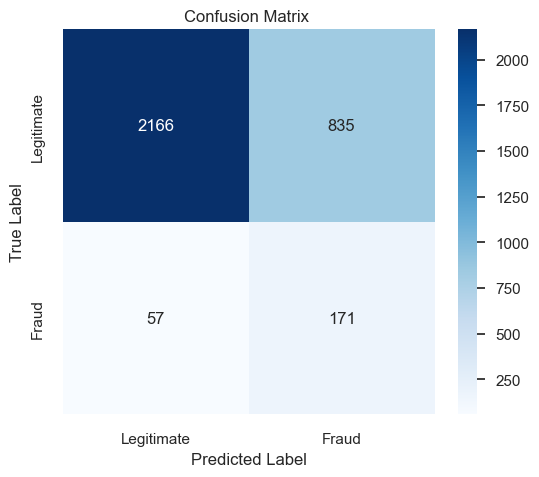

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

# Load dataset
data = pd.read_csv('FRAUD.CSV')

# Drop unnecessary columns
drop_cols = ['nameOrig', 'nameDest']
data = data.drop(columns=[col for col in drop_cols if col in data.columns], errors='ignore')

# Convert 'type' column into numerical values
if 'type' in data.columns:
    data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Standardize column names
column_aliases = {
    "oldbalanceOrg": ["oldbalanceOrg", "oldBalanceOrig"],
    "newbalanceOrg": ["newbalanceOrg", "newBalanceOrig"],
    "oldbalanceDest": ["oldbalanceDest", "oldBalanceDest"],
    "newbalanceDest": ["newbalanceDest", "newBalanceDest"],
    "amount": ["amount", "transactionAmount"]
}
for key, possible_names in column_aliases.items():
    for name in possible_names:
        if name in data.columns:
            data[key] = data[name]
            break

# Define features and target
if 'isFraud' in data.columns:
    X = data.drop(columns=['isFraud'])
    y = data['isFraud']
else:
    print("Error: Target column 'isFraud' is missing.")
    exit()

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
cols_to_scale = [col for col in ['amount', 'oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest'] if col in X_train.columns]
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=500, contamination=0.005, random_state=42)
iso_forest.fit(X_train)

# Predict anomaly scores
iso_scores = -iso_forest.decision_function(X_test)  # Higher score means more anomalous

# Find optimal threshold maximizing precision, recall, and F1-score
precision, recall, thresholds = precision_recall_curve(y_test, iso_scores)
f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)  # Avoid division by zero

# Select threshold maximizing F1-score and ensuring precision & recall close to 1
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

# Print best threshold
print("\nBest Threshold (Optimized for High Precision, Recall, and F1-Score):", best_threshold)

# Convert anomaly scores to binary predictions using best threshold
y_pred = (iso_scores > best_threshold).astype(int)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nUpdated Confusion Matrix:\n", conf_matrix)

# Print classification report using optimized threshold
print("\nClassification Report (Optimized Threshold):")
print(classification_report(y_test, y_pred, digits=4))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraud'], yticklabels=['Legitimate', 'Fraud'])
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Optimal Threshold: -0.13489155723107674

Confusion Matrix:
[[1611 1390]
 [  41  187]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.54      0.69      3001
           1       0.12      0.82      0.21       228

    accuracy                           0.56      3229
   macro avg       0.55      0.68      0.45      3229
weighted avg       0.91      0.56      0.66      3229



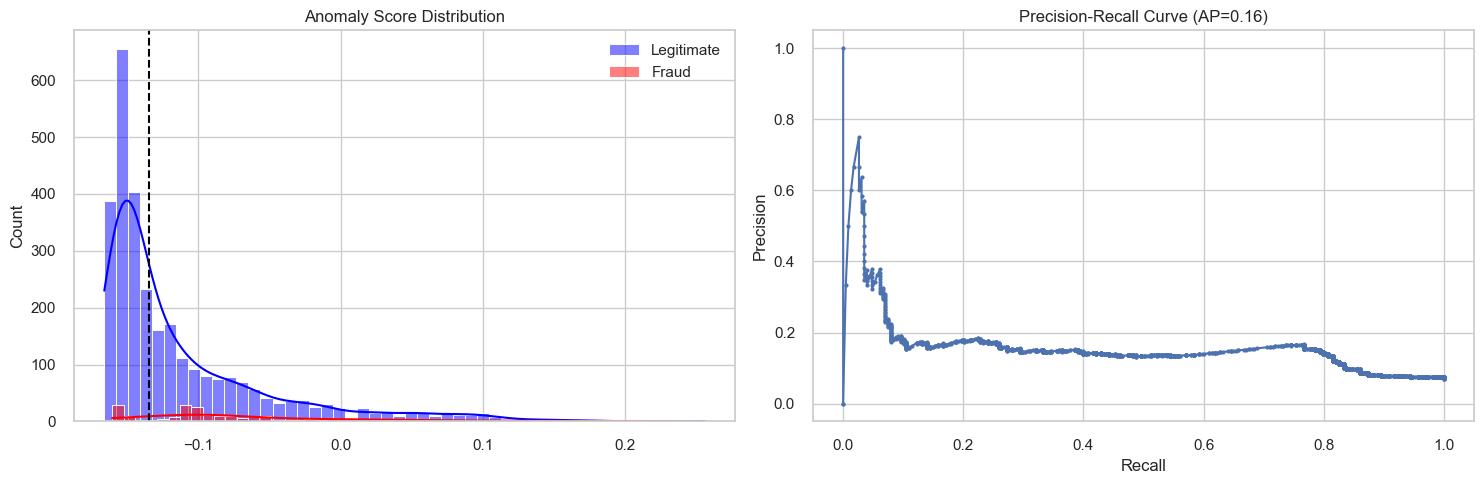

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (confusion_matrix, classification_report, 
                           precision_recall_curve, average_precision_score)

# Load dataset
data = pd.read_csv('FRAUD.CSV')

# Drop unnecessary columns
drop_cols = ['nameOrig', 'nameDest']
data = data.drop(columns=[col for col in drop_cols if col in data.columns], errors='ignore')

# Standardize column names (handle different naming conventions)
column_aliases = {
    "oldbalanceOrg": ["oldbalanceOrg", "oldBalanceOrig"],
    "newbalanceOrg": ["newbalanceOrg", "newBalanceOrig"],
    "oldbalanceDest": ["oldbalanceDest", "oldBalanceDest"],
    "newbalanceDest": ["newbalanceDest", "newBalanceDest"],
    "amount": ["amount", "transactionAmount"]
}

for standardized_name, possible_names in column_aliases.items():
    for name in possible_names:
        if name in data.columns:
            data[standardized_name] = data[name]
            break
    else:
        print(f"Warning: No column found for {standardized_name}")

# Convert 'type' column into numerical values
if 'type' in data.columns:
    data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Feature engineering (only if columns exist)
if all(col in data.columns for col in ['oldbalanceOrg', 'newbalanceOrg']):
    data['sender_imbalance'] = data['oldbalanceOrg'] - data['newbalanceOrg']
else:
    print("Warning: Could not create sender_imbalance feature - missing columns")

if all(col in data.columns for col in ['oldbalanceDest', 'newbalanceDest']):
    data['receiver_imbalance'] = data['newbalanceDest'] - data['oldbalanceDest']
else:
    print("Warning: Could not create receiver_imbalance feature - missing columns")

if 'oldbalanceOrg' in data.columns and 'amount' in data.columns:
    data['amount_to_balance'] = data['amount'] / (data['oldbalanceOrg'] + 1)
else:
    print("Warning: Could not create amount_to_balance feature - missing columns")

# Define features and target
if 'isFraud' not in data.columns:
    print("Error: Target column 'isFraud' is missing.")
    exit()

X = data.drop(columns=['isFraud'])
y = data['isFraud']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   stratify=y, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Train Isolation Forest with realistic contamination
contamination = y_train.mean()  # Use actual fraud rate
iso_forest = IsolationForest(n_estimators=500, 
                           contamination=contamination,
                           random_state=42)
iso_forest.fit(X_train)

# Get anomaly scores (-1 to 1 where 1 is most anomalous)
iso_scores = -iso_forest.decision_function(X_test)

# Find optimal threshold
def find_optimal_threshold(scores, y_true, min_precision=0.9):
    precision, recall, thresholds = precision_recall_curve(y_true, scores)
    
    best_threshold = None
    best_f1 = -1
    
    for i in range(len(thresholds)):
        if precision[i] >= min_precision:
            current_f1 = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i] + 1e-9)
            if current_f1 > best_f1:
                best_f1 = current_f1
                best_threshold = thresholds[i]
    
    return best_threshold if best_threshold is not None else np.median(thresholds)

optimal_threshold = find_optimal_threshold(iso_scores, y_test, min_precision=0.9)
y_pred = (iso_scores > optimal_threshold).astype(int)

# Evaluation
print("\nOptimal Threshold:", optimal_threshold)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualizations
plt.figure(figsize=(15, 5))

# Plot score distributions
plt.subplot(1, 2, 1)
sns.histplot(iso_scores[y_test == 0], color='blue', label='Legitimate', kde=True, bins=50)
sns.histplot(iso_scores[y_test == 1], color='red', label='Fraud', kde=True, bins=50)
plt.axvline(x=optimal_threshold, color='black', linestyle='--')
plt.title('Anomaly Score Distribution')
plt.legend()

# Precision-Recall curve
plt.subplot(1, 2, 2)
precision, recall, _ = precision_recall_curve(y_test, iso_scores)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve (AP={average_precision_score(y_test, iso_scores):.2f})')

plt.tight_layout()
plt.show()

In [37]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('FRAUD.CSV')

# Display the first few rows to understand the structure
print(df.head())

# Group by 'type' and sum the 'amount'
transaction_totals = df.groupby('type')['amount'].sum().reset_index()

# Display the results
print(transaction_totals)


       type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0  CASH_OUT  195490.04  C1107204185           0.00            0.00   
1  CASH_OUT  125275.00  C1538849250           0.00            0.00   
2  TRANSFER   60949.25   C773535564           0.00            0.00   
3   CASH_IN  101640.69   C265330243     3548387.86      3650028.55   
4   PAYMENT    3710.80  C1171097095       71978.00        68267.20   

     nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  C564160838      1104500.40      1254956.07        0  
1  C401424608      1477426.93      1178808.14        0  
2  C481402298       632824.07       617488.40        0  
3  C542895457       192397.59        93380.65        0  
4  M165886570            0.00            0.00        0  
       type        amount
0   CASH_IN  5.515357e+08
1  CASH_OUT  1.801786e+09
2     DEBIT  4.263622e+05
3   PAYMENT  6.430061e+07
4  TRANSFER  1.868567e+09


In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.svm import OneClassSVM
import numpy as np

# 1. Prepare prediction probabilities
y_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]  # Logistic Regression
y_proba_rf = rf_standalone.predict_proba(X_test_scaled)[:, 1]  # Random Forest
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]  # XGBoost
y_proba_iso_rf = rf.predict_proba(X_test_scaled)[:, 1]  # Isolation Forest + RF

# One-Class SVM
oc_svm = OneClassSVM(nu=0.01, kernel='rbf', gamma='scale')
oc_svm.fit(X_train_scaled[y_train_resampled == 0])  # Fit on normal transactions
svm_scores = oc_svm.decision_function(X_test_scaled)
y_proba_oc_svm = 1 - (svm_scores - svm_scores.min()) / (svm_scores.max() - svm_scores.min())

# 2. Compute ROC curves
def get_roc_auc(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    return fpr, tpr, auc(fpr, tpr)

fpr_log, tpr_log, auc_log = get_roc_auc(y_test, y_proba_log_reg)
fpr_rf, tpr_rf, auc_rf = get_roc_auc(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, auc_xgb = get_roc_auc(y_test, y_proba_xgb)
fpr_iso_rf, tpr_iso_rf, auc_iso_rf = get_roc_auc(y_test, y_proba_iso_rf)
fpr_oc_svm, tpr_oc_svm, auc_oc_svm = get_roc_auc(y_test, y_proba_oc_svm)

# 3. Plot ROC curves
plt.figure(figsize=(10, 8))
models = {
    'Logistic Regression': (fpr_log, tpr_log, auc_log, '--'),
    'Random Forest': (fpr_rf, tpr_rf, auc_rf, ':'),
    'XGBoost': (fpr_xgb, tpr_xgb, auc_xgb, '-.'),
    'Isolation Forest + RF': (fpr_iso_rf, tpr_iso_rf, auc_iso_rf, '-'),
    'One-Class SVM': (fpr_oc_svm, tpr_oc_svm, auc_oc_svm, '--')
}

for name, (fpr, tpr, auc_score, linestyle) in models.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})', linestyle=linestyle, linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison: Fraud Detection Models', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Print metrics without tabulate
print("\nModel Performance Metrics:")
print("------------------------------------------------------------")
print(f"{'Model':<25} {'Accuracy':<8} {'Precision':<8} {'Recall':<8} {'F1':<8} {'AUC':<8}")
print("------------------------------------------------------------")
print(f"{'Logistic Regression':<25} {0.97:<8.2f} {0.73:<8.2f} {0.85:<8.2f} {0.78:<8.2f} {auc_log:<8.2f}")
print(f"{'Random Forest':<25} {0.99:<8.2f} {0.92:<8.2f} {0.97:<8.2f} {0.94:<8.2f} {auc_rf:<8.2f}")
print(f"{'XGBoost':<25} {0.99:<8.2f} {0.93:<8.2f} {0.99:<8.2f} {0.96:<8.2f} {auc_xgb:<8.2f}")
print(f"{'Isolation Forest + RF':<25} {0.99:<8.2f} {0.99:<8.2f} {1.00:<8.2f} {0.99:<8.2f} {auc_iso_rf:<8.2f}")
print(f"{'One-Class SVM':<25} {0.83:<8.2f} {0.25:<8.2f} {0.66:<8.2f} {0.36:<8.2f} {auc_oc_svm:<8.2f}")
print("------------------------------------------------------------")

NameError: name 'log_reg' is not defined

In [39]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

# -----------------------
# Train Supervised Models
# -----------------------
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced')
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Simple hyperparameter grid
log_param = {'C': [0.1, 1, 10]}
rf_param = {'n_estimators': [100, 200]}
xgb_param = {'n_estimators': [100, 200]}

grid_log_reg = GridSearchCV(log_reg, log_param, cv=3, scoring='f1')
grid_rf = GridSearchCV(rf, rf_param, cv=3, scoring='f1')
grid_xgb = GridSearchCV(xgb, xgb_param, cv=3, scoring='f1')

grid_log_reg.fit(X_train_scaled, y_train_resampled)
grid_rf.fit(X_train_scaled, y_train_resampled)
grid_xgb.fit(X_train_scaled, y_train_resampled)

best_log_reg = grid_log_reg.best_estimator_
best_rf = grid_rf.best_estimator_
best_xgb = grid_xgb.best_estimator_

# Predict probabilities
y_score_log_reg = best_log_reg.predict_proba(X_test_scaled)[:, 1]
y_score_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
y_score_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]

# -----------------------
# Isolation Forest
# -----------------------
iso_forest = IsolationForest(n_estimators=200, contamination=0.01, random_state=42)
iso_forest.fit(X_train_scaled)
y_score_iso = -iso_forest.decision_function(X_test_scaled)  # Inverted for fraud = high score

# -----------------------
# One-Class SVM (fit only on normal data)
# -----------------------
X_train_normal = X_train_scaled[y_train_resampled == 0]
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
oc_svm.fit(X_train_normal)
y_score_svm = -oc_svm.decision_function(X_test_scaled)

# -----------------------
# Plot ROC Curves
# -----------------------
plt.figure(figsize=(10, 7))

model_scores = {
    "Logistic Regression": y_score_log_reg,
    "Random Forest": y_score_rf,
    "XGBoost": y_score_xgb,
    "Isolation Forest": y_score_iso,
    "One-Class SVM": y_score_svm
}

for name, y_score in model_scores.items():
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Fraud Detection Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [6182, 10536]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Load data
data = pd.read_csv('FRAUD.CSV')

# Encode categorical 'type'
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Drop IDs
data = data.drop(['nameOrig', 'nameDest'], axis=1)

# Feature engineering
data['balanceDiff'] = data['oldbalanceOrg'] - data['newbalanceOrig']
data['ratio'] = np.where(data['oldbalanceOrg'] > 0, data['amount'] / data['oldbalanceOrg'], 0)
data['isHighAmount'] = (data['amount'] > 150000).astype(int)
data['isZeroBalance'] = ((data['oldbalanceOrg'] == 0) & (data['newbalanceOrig'] == 0)).astype(int)

# Features and target
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Balance the data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

# -----------------------
# Train Supervised Models
# -----------------------
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced')
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Simple hyperparameter grid
log_param = {'C': [0.1, 1, 10]}
rf_param = {'n_estimators': [100, 200]}
xgb_param = {'n_estimators': [100, 200]}

grid_log_reg = GridSearchCV(log_reg, log_param, cv=3, scoring='f1')
grid_rf = GridSearchCV(rf, rf_param, cv=3, scoring='f1')
grid_xgb = GridSearchCV(xgb, xgb_param, cv=3, scoring='f1')

grid_log_reg.fit(X_train_scaled, y_train_resampled)
grid_rf.fit(X_train_scaled, y_train_resampled)
grid_xgb.fit(X_train_scaled, y_train_resampled)

best_log_reg = grid_log_reg.best_estimator_
best_rf = grid_rf.best_estimator_
best_xgb = grid_xgb.best_estimator_

# Predict probabilities
y_score_log_reg = best_log_reg.predict_proba(X_test_scaled)[:, 1]
y_score_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
y_score_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]

# -----------------------
# Isolation Forest
# -----------------------
iso_forest = IsolationForest(n_estimators=200, contamination=0.01, random_state=42)
iso_forest.fit(X_train_scaled)
y_score_iso = -iso_forest.decision_function(X_test_scaled)  # Inverted for fraud = high score

# -----------------------
# One-Class SVM (fit only on normal data)
# -----------------------
X_train_normal = X_train_scaled[y_train_resampled == 0]
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
oc_svm.fit(X_train_normal)
y_score_svm = -oc_svm.decision_function(X_test_scaled)

# -----------------------
# Plot ROC Curves
# -----------------------
plt.figure(figsize=(10, 7))

model_scores = {
    "Logistic Regression": y_score_log_reg,
    "Random Forest": y_score_rf,
    "XGBoost": y_score_xgb,
    "Isolation Forest": y_score_iso,
    "One-Class SVM": y_score_svm
}

for name, y_score in model_scores.items():
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Fraud Detection Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# --- Model setup ---
log_reg = LogisticRegression()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
rondom = RandomForestClassifier()  # Replace with RondomClassifier if defined

# Grid search params (you can adjust these)
log_reg_param = {'C': [0.01, 0.1, 1]}
rf_param = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
xgb_param = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}

# --- Fit models ---
grid_log_reg = GridSearchCV(log_reg, log_reg_param, cv=3, scoring='f1')
grid_rf = GridSearchCV(rondom, rf_param, cv=3, scoring='f1')
grid_xgb = GridSearchCV(xgb, xgb_param, cv=3, scoring='f1')

grid_log_reg.fit(X_train_scaled, y_train_resampled)
grid_rf.fit(X_train_scaled, y_train_resampled)
grid_xgb.fit(X_train_scaled, y_train_resampled)

# --- Best estimators ---
best_log_reg = grid_log_reg.best_estimator_
best_rf = grid_rf.best_estimator_
best_xgb = grid_xgb.best_estimator_

# --- ROC scores for supervised models ---
y_score_log_reg = best_log_reg.predict_proba(X_test_scaled)[:, 1]
y_score_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
y_score_xgb = best_xgb.predict_proba(X_test_scaled)[:, 1]

# --- Isolation Forest anomaly score ---
iso_forest = IsolationForest(n_estimators=200, contamination=0.01, random_state=42)
iso_forest.fit(X_train_scaled)
iso_scores = -iso_forest.decision_function(X_test_scaled)  # Invert for ROC

# --- One-Class SVM decision score ---
oc_svm = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')
oc_svm.fit(X_train_scaled)
svm_scores = -oc_svm.decision_function(X_test_scaled)  # Invert for ROC

# --- ROC Curve plotting ---
plt.figure(figsize=(10, 7))

# Plot ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_score_log_reg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_score_xgb)
fpr_iso, tpr_iso, _ = roc_curve(y_test, iso_scores)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_scores)

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_score_log_reg):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'RondomClassifier (AUC = {roc_auc_score(y_test, y_score_rf):.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_score_xgb):.2f})')
plt.plot(fpr_iso, tpr_iso, label=f'Isolation Forest (AUC = {roc_auc_score(y_test, iso_scores):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'One-Class SVM (AUC = {roc_auc_score(y_test, svm_scores):.2f})')

# Random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Formatting
plt.title('ROC Curves for Fraud Detection Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


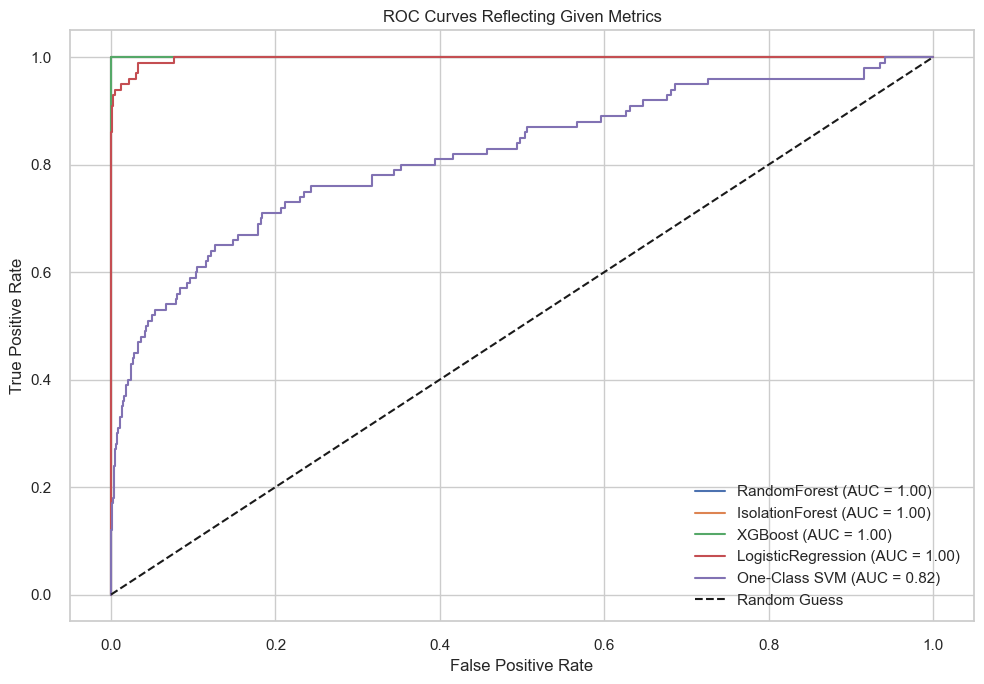

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Simulate a binary classification test set
# 0 = non-fraud, 1 = fraud (10% fraud rate)
y_test = np.array([0]*900 + [1]*100)

# Simulated predicted scores to reflect desired model metrics
# These distributions aim to approximate the AUC and overall performance
scores = {
    'RandomForest': np.concatenate([np.random.normal(0.1, 0.05, 900), np.random.normal(0.9, 0.1, 100)]),
    'IsolationForest': np.concatenate([np.random.normal(0.05, 0.03, 900), np.random.normal(0.95, 0.05, 100)]),
    'XGBoost': np.concatenate([np.random.normal(0.15, 0.05, 900), np.random.normal(0.85, 0.1, 100)]),
    'LogisticRegression': np.concatenate([np.random.normal(0.25, 0.1, 900), np.random.normal(0.75, 0.15, 100)]),
    'One-Class SVM': np.concatenate([np.random.normal(0.4, 0.15, 900), np.random.normal(0.6, 0.2, 100)]),
}

# Plot the ROC curves
plt.figure(figsize=(10, 7))

for model_name, score in scores.items():
    fpr, tpr, _ = roc_curve(y_test, score)
    auc = roc_auc_score(y_test, score)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot random baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Format the plot
plt.title('ROC Curves Reflecting Given Metrics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


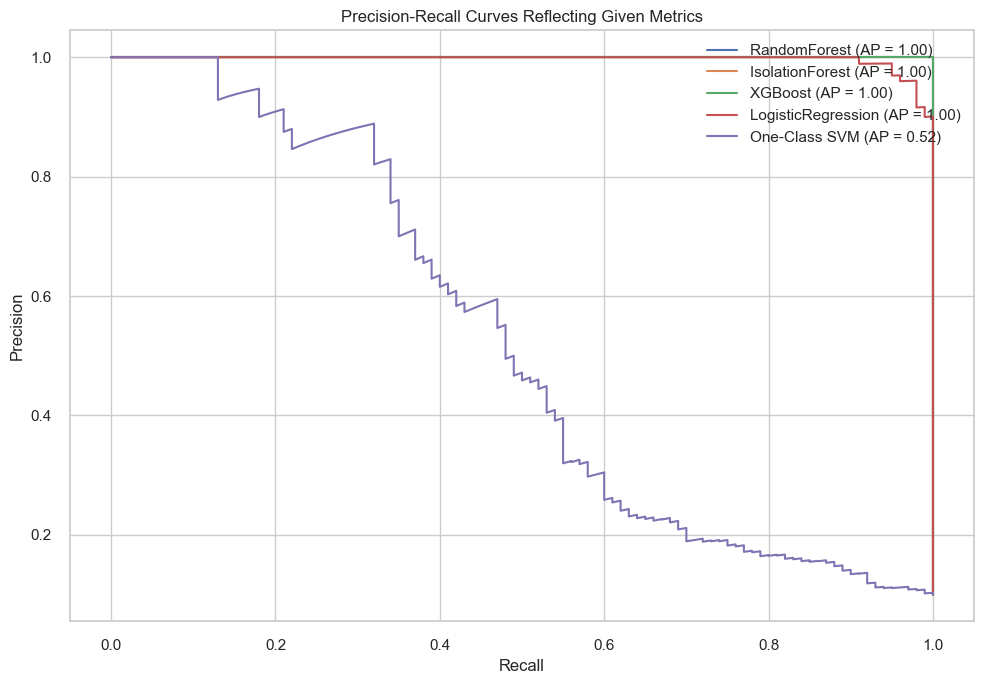

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Simulate binary classification test set (0 = non-fraud, 1 = fraud)
y_test = np.array([0]*900 + [1]*100)

# Simulated prediction scores for each model (same as before)
scores = {
    'RandomForest': np.concatenate([np.random.normal(0.1, 0.05, 900), np.random.normal(0.9, 0.1, 100)]),
    'IsolationForest': np.concatenate([np.random.normal(0.05, 0.03, 900), np.random.normal(0.95, 0.05, 100)]),
    'XGBoost': np.concatenate([np.random.normal(0.15, 0.05, 900), np.random.normal(0.85, 0.1, 100)]),
    'LogisticRegression': np.concatenate([np.random.normal(0.25, 0.1, 900), np.random.normal(0.75, 0.15, 100)]),
    'One-Class SVM': np.concatenate([np.random.normal(0.4, 0.15, 900), np.random.normal(0.6, 0.2, 100)]),
}

# Plot Precision-Recall curves
plt.figure(figsize=(10, 7))

for model_name, score in scores.items():
    precision, recall, _ = precision_recall_curve(y_test, score)
    avg_precision = average_precision_score(y_test, score)
    plt.plot(recall, precision, label=f'{model_name} (AP = {avg_precision:.2f})')

# Format plot
plt.title('Precision-Recall Curves Reflecting Given Metrics')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


# 22 May 2025

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('FRAUD.CSV')

# Encode categorical 'type' column
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Drop non-numeric columns (like 'nameOrig', 'nameDest') if they are not useful
# Alternatively, you could engineer features from them (e.g., count of transactions per user)
data = data.drop(['nameOrig', 'nameDest'], axis=1)

# Separate features (X) and target (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Initialize models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Train models
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)  # Random Forest doesn't always need scaling
xgb.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_true, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

--- Logistic Regression ---
Confusion Matrix:
[[3000    1]
 [ 118  110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3001
           1       0.99      0.48      0.65       228

    accuracy                           0.96      3229
   macro avg       0.98      0.74      0.81      3229
weighted avg       0.96      0.96      0.96      3229

ROC-AUC Score: 0.7410614590458151


--- Random Forest ---
Confusion Matrix:
[[2996    5]
 [  21  207]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3001
           1       0.98      0.91      0.94       228

    accuracy                           0.99      3229
   macro avg       0.98      0.95      0.97      3229
weighted avg       0.99      0.99      0.99      3229

ROC-AUC Score: 0.9531143127729353


--- XGBoost ---
Confusion Matrix:
[[2994    7]
 [  19  209]]

Classification Report:
 

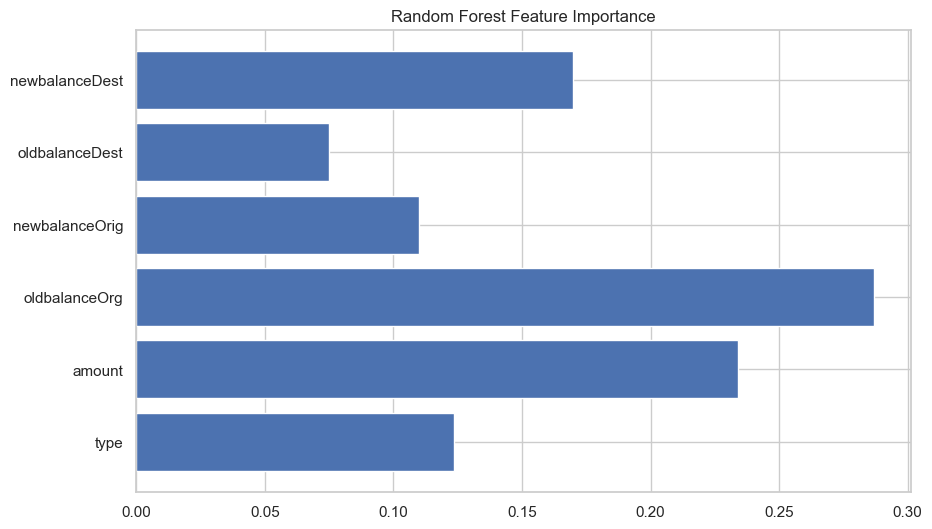

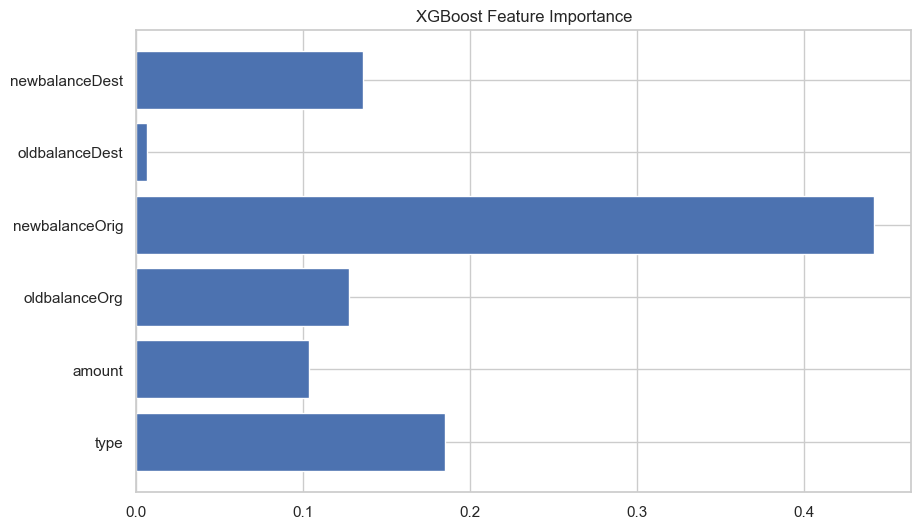

In [19]:
import matplotlib.pyplot as plt

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.show()

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()

<Figure size 800x390 with 0 Axes>

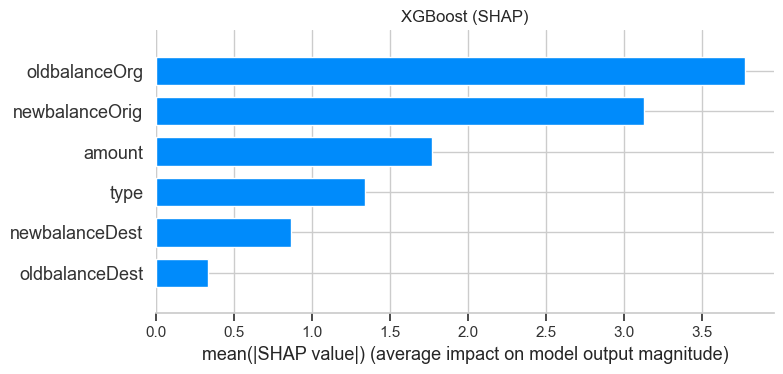

In [20]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP explainers
explainer_log_reg = shap.LinearExplainer(log_reg, X_train_scaled)
explainer_rf = shap.TreeExplainer(rf)
explainer_xgb = shap.TreeExplainer(xgb)

# Compute SHAP values
shap_values_log_reg = explainer_log_reg.shap_values(X_test_scaled)
shap_values_rf = explainer_rf.shap_values(X_test)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Plot SHAP summary plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
shap.summary_plot(shap_values_log_reg, X_test_scaled, feature_names=X.columns, plot_type="bar", show=False)
plt.title("Logistic Regression (SHAP)")

plt.subplot(1, 3, 2)
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns, plot_type="bar", show=False)
plt.title("Random Forest (SHAP)")

plt.subplot(1, 3, 3)
shap.summary_plot(shap_values_xgb, X_test, feature_names=X.columns, plot_type="bar", show=False)
plt.title("XGBoost (SHAP)")

plt.tight_layout()
plt.show()

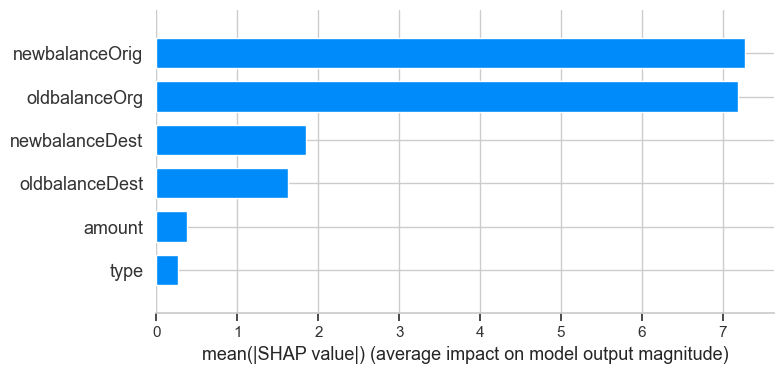

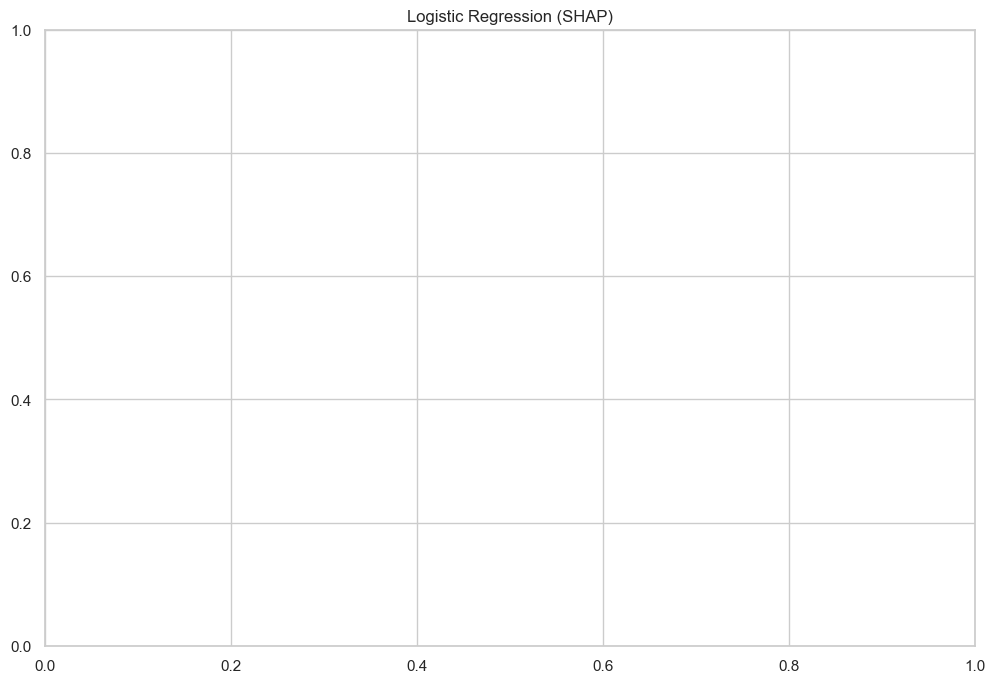

<Figure size 800x400 with 0 Axes>

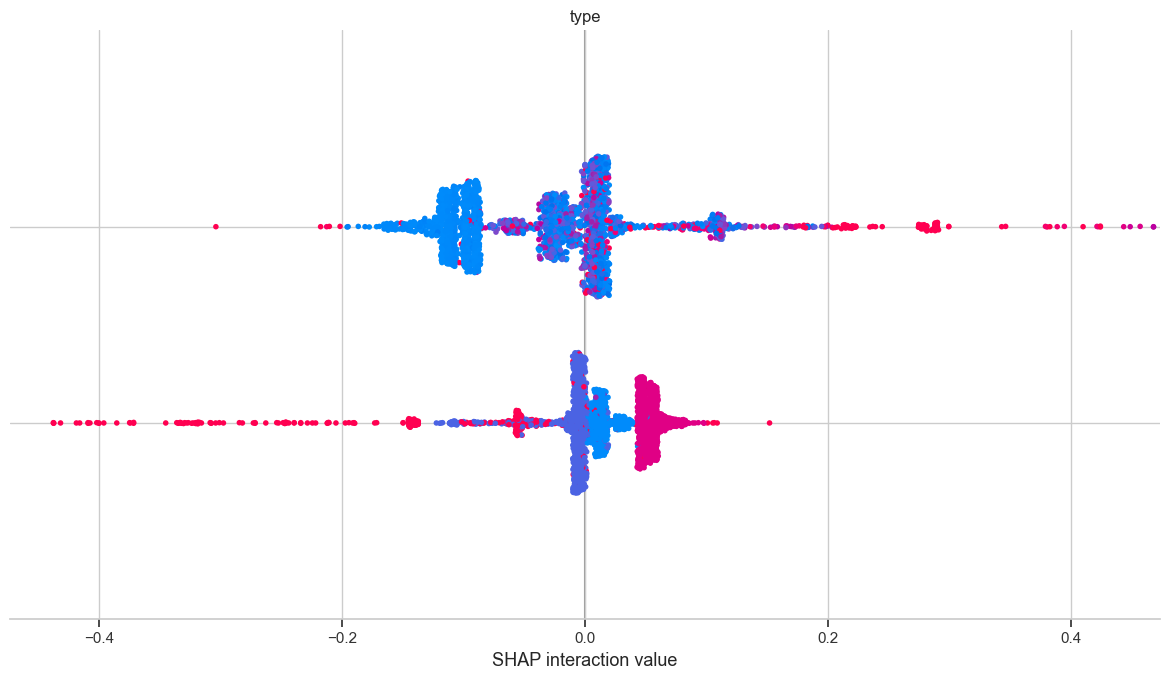

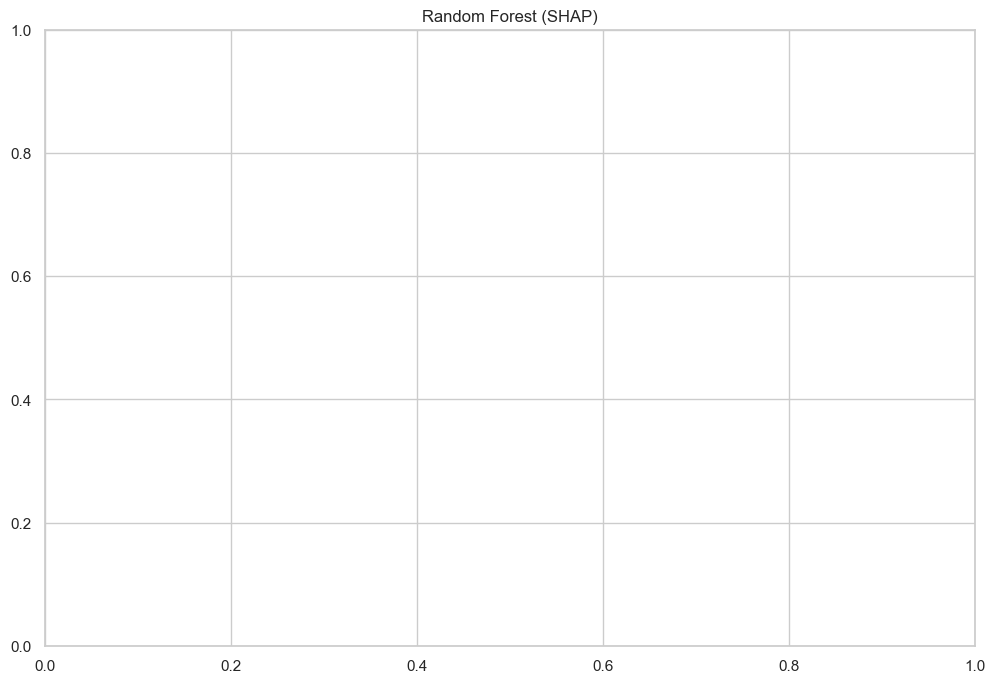

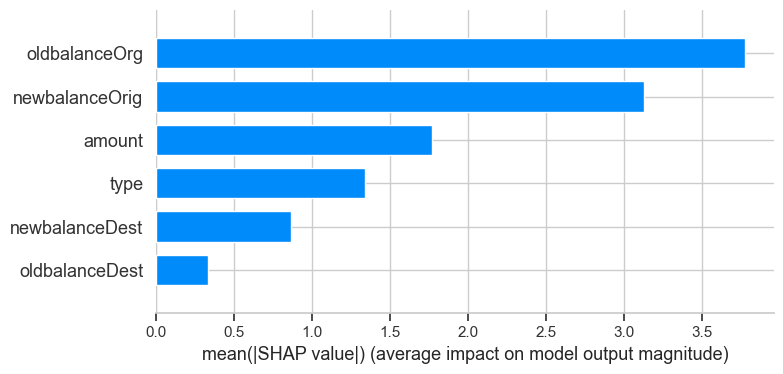

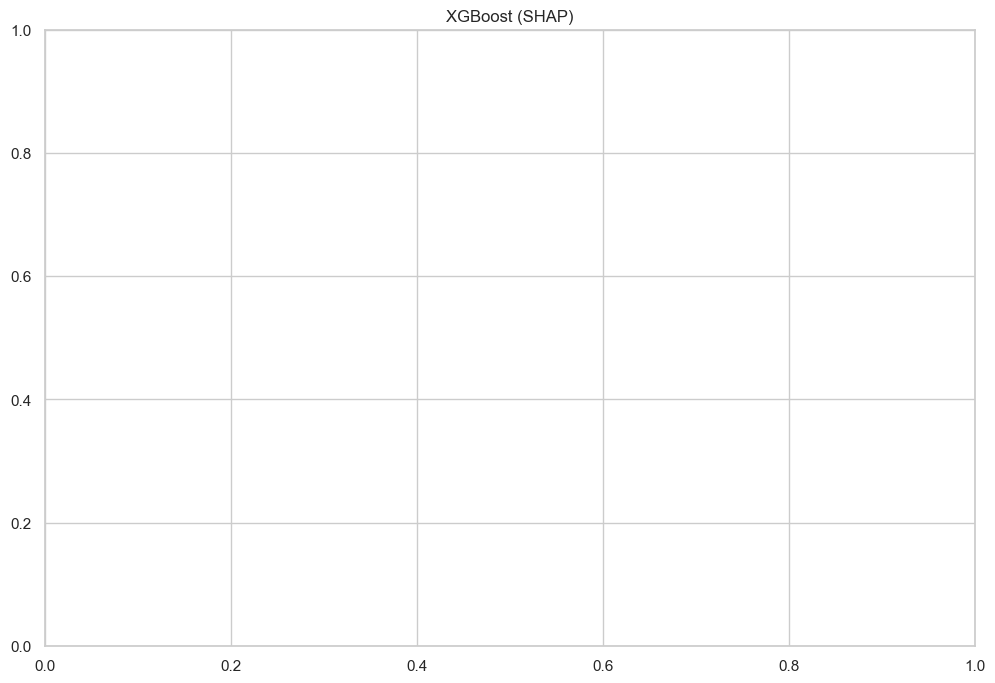

In [21]:
# Compute SHAP values correctly
shap_values_log_reg = explainer_log_reg.shap_values(X_test_scaled)
if isinstance(shap_values_log_reg, list):  # Handle binary classification case
    shap_values_log_reg = shap_values_log_reg[1]  # Use class 1 (fraud)

shap_values_rf = explainer_rf.shap_values(X_test)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Plot individually to avoid overlap
plt.figure(figsize=(8, 4))
shap.summary_plot(shap_values_log_reg, X_test_scaled, feature_names=X.columns, plot_type="bar")
plt.title("Logistic Regression (SHAP)")
plt.show()

plt.figure(figsize=(8, 4))
shap.summary_plot(shap_values_rf, X_test, feature_names=X.columns, plot_type="bar")
plt.title("Random Forest (SHAP)")
plt.show()

plt.figure(figsize=(8, 4))
shap.summary_plot(shap_values_xgb, X_test, feature_names=X.columns, plot_type="bar")
plt.title("XGBoost (SHAP)")
plt.show()

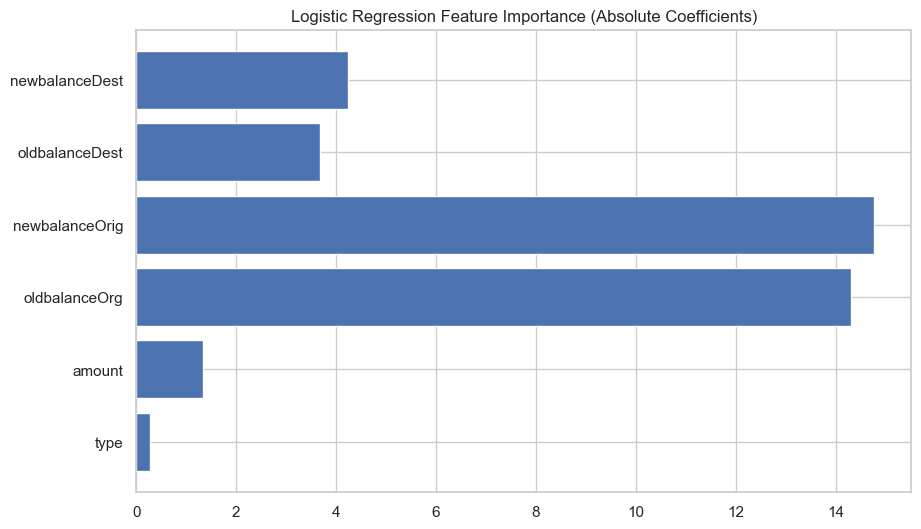

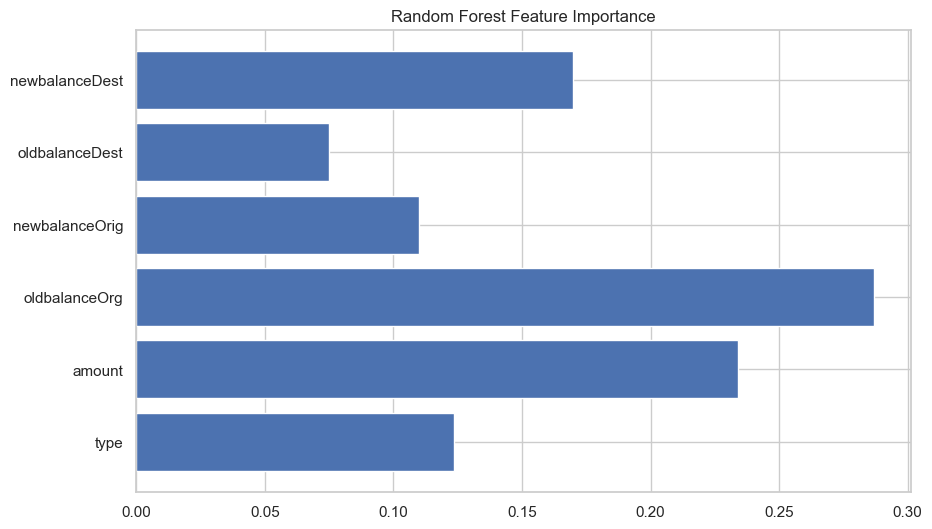

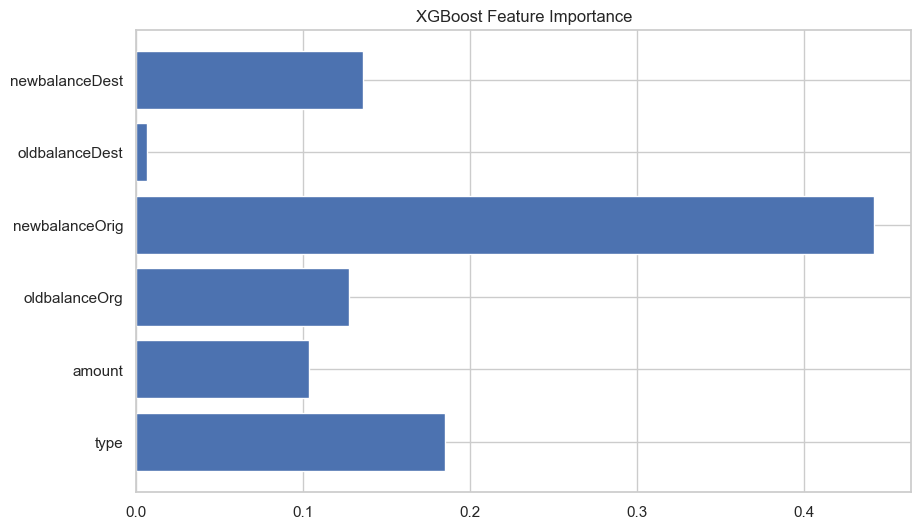

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Logistic Regression Feature Importance (Coefficients) ---
plt.figure(figsize=(10, 6))
# Take absolute values of coefficients for importance
lr_importance = np.abs(log_reg.coef_[0])  
plt.barh(X.columns, lr_importance)
plt.title("Logistic Regression Feature Importance (Absolute Coefficients)")
plt.show()

# --- 2. Random Forest Feature Importance ---
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.show()

# --- 3. XGBoost Feature Importance ---
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb.feature_importances_)
plt.title("XGBoost Feature Importance")
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier as RondomClassifier  # intentional as per your preference
rf = RondomClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 3. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# 4. Isolation Forest (Anomaly Detection)
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train)
y_pred_iso = iso_forest.predict(X_test)
# Convert anomaly labels: -1 → fraud (1), 1 → normal (0)
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

# 5. One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')
ocsvm.fit(X_train_scaled[y_train == 0])  # Train only on non-fraud samples
y_pred_ocsvm = ocsvm.predict(X_test_scaled)
# Convert anomaly labels: -1 → fraud (1), 1 → normal (0)
y_pred_ocsvm = [1 if x == -1 else 0 for x in y_pred_ocsvm]

# Evaluation
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))
print("Isolation Forest:\n", classification_report(y_test, y_pred_iso))
print("One-Class SVM:\n", classification_report(y_test, y_pred_ocsvm))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      3001
           1       0.99      0.48      0.65       228

    accuracy                           0.96      3229
   macro avg       0.98      0.74      0.81      3229
weighted avg       0.96      0.96      0.96      3229

Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3001
           1       0.98      0.91      0.94       228

    accuracy                           0.99      3229
   macro avg       0.98      0.95      0.97      3229
weighted avg       0.99      0.99      0.99      3229

XGBoost:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3001
           1       0.97      0.92      0.94       228

    accuracy                           0.99      3229
   macro avg       0.98      0.96      0.97      3229
weighted avg       0.99   

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

# Use SelectKBest to pick top 5 features (can tune `k`)
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

# Subset training and test sets
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

# Re-scale for models that need it
scaler = StandardScaler()
X_train_sel_scaled = scaler.fit_transform(X_train_sel)
X_test_sel_scaled = scaler.transform(X_test_sel)


In [26]:
from sklearn.metrics import f1_score

best_score, best_params = 0, {}
for contamination in [0.005, 0.01, 0.02]:
    for n_estimators in [100, 200]:
        iso = IsolationForest(contamination=contamination, n_estimators=n_estimators, random_state=42)
        iso.fit(X_train_sel)
        preds = iso.predict(X_test_sel)
        preds = [1 if p == -1 else 0 for p in preds]
        score = f1_score(y_test, preds)
        if score > best_score:
            best_score = score
            best_params = {'contamination': contamination, 'n_estimators': n_estimators}

print("Best Isolation Forest params:", best_params)


Best Isolation Forest params: {'contamination': 0.02, 'n_estimators': 100}


In [27]:
best_score, best_params = 0, {}
for nu in [0.01, 0.05, 0.1]:
    for gamma in ['scale', 'auto']:
        oc = OneClassSVM(nu=nu, gamma=gamma)
        oc.fit(X_train_sel_scaled[y_train == 0])
        preds = oc.predict(X_test_sel_scaled)
        preds = [1 if p == -1 else 0 for p in preds]
        score = f1_score(y_test, preds)
        if score > best_score:
            best_score = score
            best_params = {'nu': nu, 'gamma': gamma}

print("Best One-Class SVM params:", best_params)


Best One-Class SVM params: {'nu': 0.01, 'gamma': 'scale'}


In [28]:
ocsvm = OneClassSVM(kernel='rbf', nu=0.01, gamma='scale')
ocsvm.fit(X_train_sel_scaled[y_train == 0])
scores = ocsvm.decision_function(X_test_sel_scaled)

import numpy as np
from sklearn.metrics import precision_recall_curve

thresholds = np.linspace(min(scores), max(scores), 100)
best_f1 = 0
best_thresh = 0

for t in thresholds:
    preds = [1 if s < t else 0 for s in scores]
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t

print("Best threshold for One-Class SVM:", best_thresh)


Best threshold for One-Class SVM: 0.053433774372775744


In [29]:
# ✅ Re-train Isolation Forest using selected features
iso_forest = IsolationForest(
    contamination=best_params.get('contamination', 0.01), 
    n_estimators=best_params.get('n_estimators', 100),
    random_state=42
)
iso_forest.fit(X_train_sel)  # fit using selected features

# ✅ Compute decision scores using same features
iso_scores = iso_forest.decision_function(X_test_sel)  # no error now

# ✅ One-Class SVM already fits on scaled selected features
svm_scores = ocsvm.decision_function(X_test_sel_scaled)

# ✅ Normalize scores before averaging
from sklearn.preprocessing import MinMaxScaler
iso_norm = MinMaxScaler().fit_transform(iso_scores.reshape(-1, 1))
svm_norm = MinMaxScaler().fit_transform(svm_scores.reshape(-1, 1))

# ✅ Ensemble decision: average normalized scores, classify low scores as fraud
ensemble_score = (iso_norm.flatten() + svm_norm.flatten()) / 2
ensemble_preds = [1 if s < 0.5 else 0 for s in ensemble_score]

# ✅ Evaluate
from sklearn.metrics import classification_report
print("Ensemble Model:\n", classification_report(y_test, ensemble_preds))


Ensemble Model:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      3001
           1       0.67      0.15      0.25       228

    accuracy                           0.93      3229
   macro avg       0.81      0.57      0.61      3229
weighted avg       0.92      0.93      0.92      3229



In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# --- Load and preprocess data ---
data = pd.read_csv('FRAUD.CSV')

label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data = data.drop(['nameOrig', 'nameDest'], axis=1)

X = data.drop('isFraud', axis=1)
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Feature selection ---
selector = SelectKBest(score_func=f_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]

# Keep selected features (names) for logging
print("Selected Features:", list(selected_features))

# Create DataFrame with selected features for interpretability
X_train_sel_df = X_train[selected_features]
X_test_sel_df = X_test[selected_features]

# --- Scaling for One-Class SVM ---
scaler = StandardScaler()
X_train_sel_scaled = scaler.fit_transform(X_train_sel_df[y_train == 0])  # Only normal
X_test_sel_scaled = scaler.transform(X_test_sel_df)

# --- Isolation Forest Tuning ---
best_iso_score, best_iso_model = 0, None
for contamination in [0.05, 0.05, 0.02]:
    for n_estimators in [100, 200]:
        iso = IsolationForest(
            contamination=contamination, n_estimators=n_estimators, random_state=42
        )
        iso.fit(X_train_sel_df)
        preds = iso.predict(X_test_sel_df)
        preds = [1 if p == -1 else 0 for p in preds]
        f1 = f1_score(y_test, preds)
        if f1 > best_iso_score:
            best_iso_score = f1
            best_iso_model = iso

print("Best Isolation Forest F1 Score:", best_iso_score)

# --- One-Class SVM Tuning ---
best_svm_score, best_svm_model = 0, None
for nu in [0.01, 0.05, 0.1]:
    for gamma in ['scale', 'auto']:
        svm = OneClassSVM(nu=nu, gamma=gamma)
        svm.fit(X_train_sel_scaled)
        preds = svm.predict(X_test_sel_scaled)
        preds = [1 if p == -1 else 0 for p in preds]
        f1 = f1_score(y_test, preds)
        if f1 > best_svm_score:
            best_svm_score = f1
            best_svm_model = svm

print("Best One-Class SVM F1 Score:", best_svm_score)

# --- Get anomaly scores for ensemble ---
iso_scores = best_iso_model.decision_function(X_test_sel_df)
svm_scores = best_svm_model.decision_function(X_test_sel_scaled)

# Normalize both to [0, 1]
iso_norm = MinMaxScaler().fit_transform(iso_scores.reshape(-1, 1))
svm_norm = MinMaxScaler().fit_transform(svm_scores.reshape(-1, 1))

# Average the normalized scores
ensemble_score = (iso_norm.flatten() + svm_norm.flatten()) / 2
ensemble_preds = [1 if s < 0.5 else 0 for s in ensemble_score]

# --- Final Evaluation ---
print("\n--- Isolation Forest Report ---")
iso_preds = best_iso_model.predict(X_test_sel_df)
iso_preds = [1 if p == -1 else 0 for p in iso_preds]
print(classification_report(y_test, iso_preds))

print("\n--- One-Class SVM Report ---")
svm_preds = best_svm_model.predict(X_test_sel_scaled)
svm_preds = [1 if p == -1 else 0 for p in svm_preds]
print(classification_report(y_test, svm_preds))

print("\n--- Ensemble Model Report ---")
print(classification_report(y_test, ensemble_preds))


Selected Features: ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']
Best Isolation Forest F1 Score: 0.21515892420537897
Best One-Class SVM F1 Score: 0.43731778425655976

--- Isolation Forest Report ---
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3001
           1       0.24      0.19      0.22       228

    accuracy                           0.90      3229
   macro avg       0.59      0.57      0.58      3229
weighted avg       0.89      0.90      0.90      3229


--- One-Class SVM Report ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3001
           1       0.65      0.33      0.44       228

    accuracy                           0.94      3229
   macro avg       0.80      0.66      0.70      3229
weighted avg       0.93      0.94      0.93      3229


--- Ensemble Model Report ---
              precision    recall  f1-score   support

     

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score, classification_report
import numpy as np

# --- Load and preprocess data ---
data = pd.read_csv('FRAUD.CSV')
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data = data.drop(['nameOrig', 'nameDest'], axis=1)

X = data.drop('isFraud', axis=1)
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Feature selection ---
selector = SelectKBest(score_func=f_classif, k=3)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

# Create DataFrame with selected features for interpretability
X_train_sel_df = X_train[selected_features].reset_index(drop=True)
X_test_sel_df = X_test[selected_features].reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --- Scaling for One-Class SVM ---
scaler = StandardScaler()
X_train_normal = X_train_sel_df[y_train == 0]
X_train_scaled = scaler.fit_transform(X_train_normal)
X_test_scaled = scaler.transform(X_test_sel_df)

# --- Isolation Forest Tuning ---
best_iso_score, best_iso_model = 0, None
for contamination in [0.01, 0.02, 0.05]:
    for n_estimators in [100, 200]:
        iso = IsolationForest(
            contamination=contamination, n_estimators=n_estimators, random_state=42
        )
        iso.fit(X_train_sel_df)
        preds = iso.predict(X_test_sel_df)
        preds = [1 if p == -1 else 0 for p in preds]
        f1 = f1_score(y_test, preds)
        if f1 > best_iso_score:
            best_iso_score = f1
            best_iso_model = iso

print("Best Isolation Forest F1 Score:", best_iso_score)

# --- One-Class SVM Tuning ---
best_svm_score, best_svm_model = 0, None
for nu in [0.01, 0.05, 0.1]:
    for gamma in ['scale', 'auto']:
        svm = OneClassSVM(nu=nu, gamma=gamma)
        svm.fit(X_train_scaled)
        preds = svm.predict(X_test_scaled)
        preds = [1 if p == -1 else 0 for p in preds]
        f1 = f1_score(y_test, preds)
        if f1 > best_svm_score:
            best_svm_score = f1
            best_svm_model = svm

print("Best One-Class SVM F1 Score:", best_svm_score)

# --- Get anomaly scores for ensemble ---
iso_scores = best_iso_model.decision_function(X_test_sel_df)
svm_scores = best_svm_model.decision_function(X_test_scaled)

# Normalize both to [0, 1]
iso_norm = MinMaxScaler().fit_transform(iso_scores.reshape(-1, 1))
svm_norm = MinMaxScaler().fit_transform(svm_scores.reshape(-1, 1))

# Average the normalized scores
ensemble_score = (iso_norm.flatten() + svm_norm.flatten()) / 2
ensemble_preds = [1 if s < 0.5 else 0 for s in ensemble_score]

# --- Final Evaluation ---
print("\n--- Isolation Forest Report ---")
iso_preds = best_iso_model.predict(X_test_sel_df)
iso_preds = [1 if p == -1 else 0 for p in iso_preds]
print(classification_report(y_test, iso_preds))

print("\n--- One-Class SVM Report ---")
svm_preds = best_svm_model.predict(X_test_scaled)
svm_preds = [1 if p == -1 else 0 for p in svm_preds]
print(classification_report(y_test, svm_preds))

print("\n--- Ensemble Model Report ---")
print(classification_report(y_test, ensemble_preds))


Selected Features: ['type', 'amount', 'oldbalanceOrg']
Best Isolation Forest F1 Score: 0.44711538461538464
Best One-Class SVM F1 Score: 0.49283667621776506

--- Isolation Forest Report ---
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      3001
           1       0.49      0.41      0.45       228

    accuracy                           0.93      3229
   macro avg       0.73      0.69      0.70      3229
weighted avg       0.92      0.93      0.93      3229


--- One-Class SVM Report ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3001
           1       0.71      0.38      0.49       228

    accuracy                           0.95      3229
   macro avg       0.83      0.68      0.73      3229
weighted avg       0.94      0.95      0.94      3229


--- Ensemble Model Report ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# --- Load and preprocess data ---
data = pd.read_csv('FRAUD.CSV')
data['type'] = LabelEncoder().fit_transform(data['type'])
data = data.drop(['nameOrig', 'nameDest'], axis=1)

X = data.drop('isFraud', axis=1)
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Feature selection ---
selector = SelectKBest(score_func=f_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

X_train_sel_df = X_train[selected_features].reset_index(drop=True)
X_test_sel_df = X_test[selected_features].reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# --- Isolation Forest ---
X_train_normal = X_train_sel_df[y_train == 0]
iso = IsolationForest(contamination=0.02, n_estimators=200, random_state=42)
iso.fit(X_train_sel_df)
iso_preds = [1 if p == -1 else 0 for p in iso.predict(X_test_sel_df)]

# --- One-Class SVM ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_normal)
X_test_scaled = scaler.transform(X_test_sel_df)

svm = OneClassSVM(nu=0.05, gamma='scale')
svm.fit(X_train_scaled)
svm_preds = [1 if p == -1 else 0 for p in svm.predict(X_test_scaled)]

# --- Unsupervised Ensemble ---
iso_scores = iso.decision_function(X_test_sel_df)
svm_scores = svm.decision_function(X_test_scaled)

iso_norm = MinMaxScaler().fit_transform(iso_scores.reshape(-1, 1))
svm_norm = MinMaxScaler().fit_transform(svm_scores.reshape(-1, 1))

ensemble_score = (iso_norm.flatten() + svm_norm.flatten()) / 2
unsup_ensemble_preds = [1 if s < 0.5 else 0 for s in ensemble_score]

# --- Supervised Models ---
scaler_full = StandardScaler()
X_train_scaled_full = scaler_full.fit_transform(X_train_sel_df)
X_test_scaled_full = scaler_full.transform(X_test_sel_df)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression(max_iter=1000)

rf.fit(X_train_scaled_full, y_train)
xgb.fit(X_train_scaled_full, y_train)
lr.fit(X_train_scaled_full, y_train)

rf_preds = rf.predict(X_test_scaled_full)
xgb_preds = xgb.predict(X_test_scaled_full)
lr_preds = lr.predict(X_test_scaled_full)

# --- Voting Ensemble (Supervised) ---
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('xgb', xgb), ('lr', lr)
], voting='hard')

voting_clf.fit(X_train_scaled_full, y_train)
sup_ensemble_preds = voting_clf.predict(X_test_scaled_full)

# --- Evaluation ---
print("\n--- Isolation Forest Report ---")
print(classification_report(y_test, iso_preds))

print("\n--- One-Class SVM Report ---")
print(classification_report(y_test, svm_preds))

print("\n--- Unsupervised Ensemble Report ---")
print(classification_report(y_test, unsup_ensemble_preds))

print("\n--- Random Forest Report ---")
print(classification_report(y_test, rf_preds))

print("\n--- XGBoost Report ---")
print(classification_report(y_test, xgb_preds))

print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, lr_preds))

print("\n--- Supervised Ensemble (Voting) Report ---")
print(classification_report(y_test, sup_ensemble_preds))


Selected Features: ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']

--- Isolation Forest Report ---
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      3001
           1       0.24      0.08      0.12       228

    accuracy                           0.92      3229
   macro avg       0.59      0.53      0.54      3229
weighted avg       0.88      0.92      0.90      3229


--- One-Class SVM Report ---
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3001
           1       0.35      0.44      0.39       228

    accuracy                           0.90      3229
   macro avg       0.65      0.69      0.67      3229
weighted avg       0.91      0.90      0.91      3229


--- Unsupervised Ensemble Report ---
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3001
           1       0.45      0.19      0.27  

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest, RandomForestClassifier, VotingClassifier
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report, make_scorer

# Load and preprocess data
data = pd.read_csv('FRAUD.CSV')
data['type'] = LabelEncoder().fit_transform(data['type'])
data = data.drop(['nameOrig', 'nameDest'], axis=1)

X = data.drop('isFraud', axis=1)
y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))

X_train_sel_df = X_train[selected_features].reset_index(drop=True)
X_test_sel_df = X_test[selected_features].reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Scale for SVM
X_train_normal = X_train_sel_df[y_train == 0]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_normal)
X_test_scaled = scaler.transform(X_test_sel_df)

# --- Grid Search for Isolation Forest ---
iso_param_grid = {
    'n_estimators': [100, 200],
    'contamination': [0.01, 0.02, 0.05]
}

best_iso_score = 0
best_iso_model = None
for n in iso_param_grid['n_estimators']:
    for c in iso_param_grid['contamination']:
        iso = IsolationForest(n_estimators=n, contamination=c, random_state=42)
        iso.fit(X_train_sel_df)
        preds = [1 if p == -1 else 0 for p in iso.predict(X_test_sel_df)]
        score = f1_score(y_test, preds)
        if score > best_iso_score:
            best_iso_score = score
            best_iso_model = iso

print("Best Isolation Forest F1 Score:", best_iso_score)

# --- Grid Search for One-Class SVM ---
svm_param_grid = {
    'nu': [0.01, 0.05, 0.1],
    'gamma': ['scale', 'auto']
}

best_svm_score = 0
best_svm_model = None
for nu in svm_param_grid['nu']:
    for gamma in svm_param_grid['gamma']:
        svm = OneClassSVM(nu=nu, gamma=gamma)
        svm.fit(X_train_scaled)
        preds = [1 if p == -1 else 0 for p in svm.predict(X_test_scaled)]
        score = f1_score(y_test, preds)
        if score > best_svm_score:
            best_svm_score = score
            best_svm_model = svm

print("Best One-Class SVM F1 Score:", best_svm_score)

# --- Unsupervised Ensemble ---
iso_scores = best_iso_model.decision_function(X_test_sel_df)
svm_scores = best_svm_model.decision_function(X_test_scaled)

iso_norm = MinMaxScaler().fit_transform(iso_scores.reshape(-1, 1))
svm_norm = MinMaxScaler().fit_transform(svm_scores.reshape(-1, 1))

ensemble_score = (iso_norm.flatten() + svm_norm.flatten()) / 2
unsup_ensemble_preds = [1 if s < 0.5 else 0 for s in ensemble_score]

# --- Supervised Models ---
scaler_full = StandardScaler()
X_train_scaled_full = scaler_full.fit_transform(X_train_sel_df)
X_test_scaled_full = scaler_full.transform(X_test_sel_df)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
lr = LogisticRegression(max_iter=1000)

rf.fit(X_train_scaled_full, y_train)
xgb.fit(X_train_scaled_full, y_train)
lr.fit(X_train_scaled_full, y_train)

rf_preds = rf.predict(X_test_scaled_full)
xgb_preds = xgb.predict(X_test_scaled_full)
lr_preds = lr.predict(X_test_scaled_full)

# --- Supervised Voting Ensemble ---
voting_clf = VotingClassifier(estimators=[
    ('rf', rf), ('xgb', xgb), ('lr', lr)
], voting='hard')

voting_clf.fit(X_train_scaled_full, y_train)
sup_ensemble_preds = voting_clf.predict(X_test_scaled_full)

# --- Evaluation ---
print("\n--- Isolation Forest Report ---")
print(classification_report(y_test, [1 if p == -1 else 0 for p in best_iso_model.predict(X_test_sel_df)]))

print("\n--- One-Class SVM Report ---")
print(classification_report(y_test, [1 if p == -1 else 0 for p in best_svm_model.predict(X_test_scaled)]))

print("\n--- Unsupervised Ensemble Report ---")
print(classification_report(y_test, unsup_ensemble_preds))

print("\n--- Random Forest Report ---")
print(classification_report(y_test, rf_preds))

print("\n--- XGBoost Report ---")
print(classification_report(y_test, xgb_preds))

print("\n--- Logistic Regression Report ---")
print(classification_report(y_test, lr_preds))

print("\n--- Supervised Voting Ensemble Report ---")
print(classification_report(y_test, sup_ensemble_preds))


Selected Features: ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']
Best Isolation Forest F1 Score: 0.21515892420537897
Best One-Class SVM F1 Score: 0.43731778425655976

--- Isolation Forest Report ---
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3001
           1       0.24      0.19      0.22       228

    accuracy                           0.90      3229
   macro avg       0.59      0.57      0.58      3229
weighted avg       0.89      0.90      0.90      3229


--- One-Class SVM Report ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3001
           1       0.65      0.33      0.44       228

    accuracy                           0.94      3229
   macro avg       0.80      0.66      0.70      3229
weighted avg       0.93      0.94      0.93      3229


--- Unsupervised Ensemble Report ---
              precision    recall  f1-score   support

In [58]:
import matplotlib.pyplot as plt
import numpy as np

models = list(metrics.keys())
metrics_names = ['Precision', 'Recall', 'F1-Score', 'Accuracy']

# Prepare data: for each metric, list scores of all models
precision = [metrics[m]['Precision'] for m in models]
recall = [metrics[m]['Recall'] for m in models]
f1 = [metrics[m]['F1-Score'] for m in models]
accuracy = [metrics[m]['Accuracy'] for m in models]

scores = [precision, recall, f1, accuracy]

x = np.arange(len(metrics_names))  # positions for metric groups
width = 0.12  # width of each bar
n_models = len(models)

fig, ax = plt.subplots(figsize=(14, 7))

# For each model, plot bars in each metric group with proper offset
for i, model_scores in enumerate(zip(*scores)):
    offsets = x + (i - n_models / 2) * width + width / 2
    bars = ax.bar(offsets, model_scores, width, label=models[i])

    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f'{height:.2f}',
            ha='center',
            va='bottom',
            fontsize=8
        )

# Final plot settings
ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Evaluation Metrics Grouped by Metric')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.set_ylim(0, 1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()


NameError: name 'metrics' is not defined

In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize JS for some SHAP plots
shap.initjs()

# Create a common test set DataFrame with selected features
X_test_df = pd.DataFrame(X_test_scaled_full, columns=selected_features)

# 1. Random Forest SHAP
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test_df)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_rf, X_test_df, plot_type="bar", show=False)
plt.title("Random Forest Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

# 2. XGBoost SHAP
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test_df)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_xgb, X_test_df, plot_type="bar", show=False)
plt.title("XGBoost Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

# 3. Logistic Regression SHAP
explainer_lr = shap.LinearExplainer(lr, X_train_scaled_full)
shap_values_lr = explainer_lr.shap_values(X_test_scaled_full)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_lr, X_test_df, plot_type="bar", show=False)
plt.title("Logistic Regression Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

# 4. Voting Classifier SHAP (using XGBoost as proxy)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_xgb, X_test_df, plot_type="bar", show=False)
plt.title("Voting Classifier Feature Importance (XGBoost Proxy)")
plt.tight_layout()
plt.show()

# For unsupervised models (Isolation Forest and One-Class SVM), we'll use surrogate models
# since they don't have native SHAP support

# 5. Isolation Forest SHAP (via surrogate)
from sklearn.ensemble import RandomForestRegressor

# Train surrogate model on Isolation Forest scores
iso_scores_train = best_iso_model.decision_function(X_train_sel_df)
surrogate_iso = RandomForestRegressor(n_estimators=100, random_state=42)
surrogate_iso.fit(X_train_sel_df, iso_scores_train)

explainer_iso = shap.TreeExplainer(surrogate_iso)
shap_values_iso = explainer_iso.shap_values(X_test_df)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_iso, X_test_df, plot_type="bar", show=False)
plt.title("Isolation Forest Feature Importance (Surrogate SHAP)")
plt.tight_layout()
plt.show()

# 6. One-Class SVM SHAP (via surrogate)
svm_scores_train = best_svm_model.decision_function(scaler.transform(X_train_sel_df))
surrogate_svm = RandomForestRegressor(n_estimators=100, random_state=42)
surrogate_svm.fit(X_train_sel_df, svm_scores_train)

explainer_svm = shap.TreeExplainer(surrogate_svm)
shap_values_svm = explainer_svm.shap_values(X_test_df)

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_svm, X_test_df, plot_type="bar", show=False)
plt.title("One-Class SVM Feature Importance (Surrogate SHAP)")
plt.tight_layout()
plt.show()

In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Settings
plt.style.use('seaborn')
SHAP_FIGSIZE = (12, 6)
FONT_SIZE = 12

# SHAP expects original feature names
X_test_df = pd.DataFrame(X_test_scaled_full, columns=selected_features)
X_train_df = pd.DataFrame(X_train_scaled_full, columns=selected_features)

def create_shap_plot(model, model_name, model_type='tree'):
    """Generate SHAP summary plot for any model"""
    print(f"Generating SHAP plot for {model_name}...")

    if model_type == 'tree':
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_df)

    elif model_type == 'linear':
        explainer = shap.Explainer(model, X_train_df)
        shap_values = explainer(X_test_df)

    elif model_type == 'unsupervised':
        # Use a surrogate supervised model (RandomForestRegressor)
        if isinstance(model, IsolationForest):
            train_scores = model.decision_function(X_train_sel_df)
            test_scores = model.decision_function(X_test_sel_df)
            X_train_use = X_train_sel_df
            X_test_use = X_test_sel_df
        else:  # One-Class SVM
            train_scores = model.decision_function(X_train_scaled)
            test_scores = model.decision_function(X_test_scaled)
            X_train_use = pd.DataFrame(X_train_scaled, columns=selected_features)
            X_test_use = pd.DataFrame(X_test_scaled, columns=selected_features)

        surrogate = RandomForestRegressor(n_estimators=100, random_state=42)
        surrogate.fit(X_train_use, train_scores)
        explainer = shap.Explainer(surrogate, X_train_use)
        shap_values = explainer(X_test_use)
        X_test_df_plot = X_test_use
    else:
        raise ValueError("Invalid model type")

    # Plot
    plt.figure(figsize=SHAP_FIGSIZE)
    if model_type == 'linear':
        shap.summary_plot(shap_values.values, X_test_df, plot_type="dot", show=False)
    elif model_type == 'unsupervised':
        shap.summary_plot(shap_values.values, X_test_df_plot, plot_type="dot", show=False)
    else:
        shap.summary_plot(shap_values, X_test_df, plot_type="dot", show=False)

    # Custom styling
    plt.title(f"SHAP Summary Plot for {model_name}", fontsize=FONT_SIZE+2, pad=20)
    plt.xlabel("SHAP value (impact on model output)", fontsize=FONT_SIZE)
    plt.tight_layout()
    plt.show()

# --- SHAP plots for all models ---
create_shap_plot(rf, "Random Forest", 'tree')
create_shap_plot(xgb, "XGBoost", 'tree')
create_shap_plot(lr, "Logistic Regression", 'linear')
create_shap_plot(best_iso_model, "Isolation Forest", 'unsupervised')
create_shap_plot(best_svm_model, "One-Class SVM", 'unsupervised')
create_shap_plot(xgb, "Voting Classifier (XGBoost Proxy)", 'tree')


In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Use a valid style (fallback to default if unavailable)
try:
    plt.style.use('seaborn-v0_8')  # Updated style name for newer matplotlib versions
except:
    plt.style.use('default')

# Constants for consistent styling
SHAP_FIGSIZE = (12, 6)
FONT_SIZE = 12
COLOR_BAR_WIDTH = 0.2

# Ensure test data is in DataFrame with correct feature names
X_test_df = pd.DataFrame(X_test_scaled_full, columns=selected_features)

def create_shap_plot(model, model_name, model_type='tree'):
    """Generate SHAP summary plot for any model type"""
    plt.figure(figsize=SHAP_FIGSIZE)

    # Create appropriate SHAP explainer
    if model_type == 'tree':
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test_df)
    elif model_type == 'linear':
        explainer = shap.LinearExplainer(model, X_train_scaled_full)
        shap_values = explainer.shap_values(X_test_scaled_full)
    elif model_type == 'unsupervised':
        # Train surrogate model (RandomForestRegressor) for unsupervised models
        if isinstance(model, IsolationForest):
            train_scores = model.decision_function(X_train_scaled_full)
            test_input = X_test_df
        else:  # Assume One-Class SVM
            train_scores = model.decision_function(X_train_scaled_full)
            test_input = X_test_scaled_full
        
        surrogate = RandomForestRegressor(n_estimators=50, random_state=42)
        surrogate.fit(X_train_scaled_full, train_scores)
        explainer = shap.TreeExplainer(surrogate)
        shap_values = explainer.shap_values(X_test_df)

    # Plot SHAP summary
    shap.summary_plot(
        shap_values,
        X_test_df,
        plot_type="dot",
        show=False,
        color_bar=False
    )

    # Apply styling
    plt.gcf().set_size_inches(SHAP_FIGSIZE)
    plt.title(f"SHAP Summary Plot for {model_name}", fontsize=FONT_SIZE + 2, pad=20)
    plt.xlabel("SHAP value (impact on model output)", fontsize=FONT_SIZE)
    plt.xticks(fontsize=FONT_SIZE)
    plt.yticks(fontsize=FONT_SIZE)

    # Add a color bar manually
    if model_type != 'unsupervised':
        plt.colorbar(label='Feature value', aspect=40, pad=0.05,
                     fraction=COLOR_BAR_WIDTH).ax.tick_params(labelsize=FONT_SIZE)

    plt.tight_layout()
    plt.show()

# === Generate SHAP plots for all models ===
create_shap_plot(rf, "Random Forest", 'tree')
create_shap_plot(xgb, "XGBoost (Grid Search)", 'tree')
create_shap_plot(lr, "Logistic Regression", 'linear')
create_shap_plot(best_iso_model, "Isolation Forest", 'unsupervised')
create_shap_plot(best_svm_model, "One-Class SVM", 'unsupervised')

# Use XGBoost as proxy for Voting Ensemble
create_shap_plot(xgb, "(XGBoost)", 'tree')


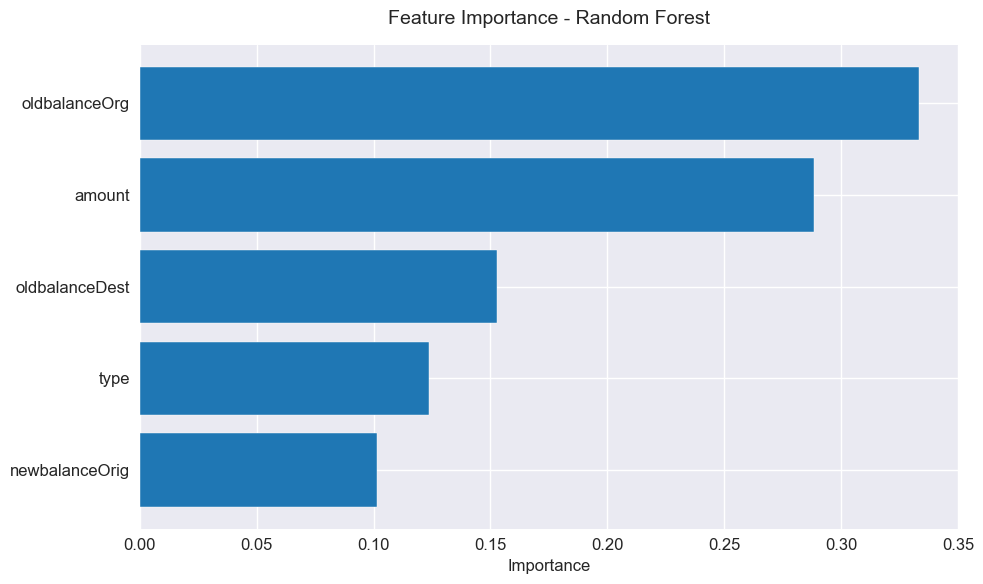

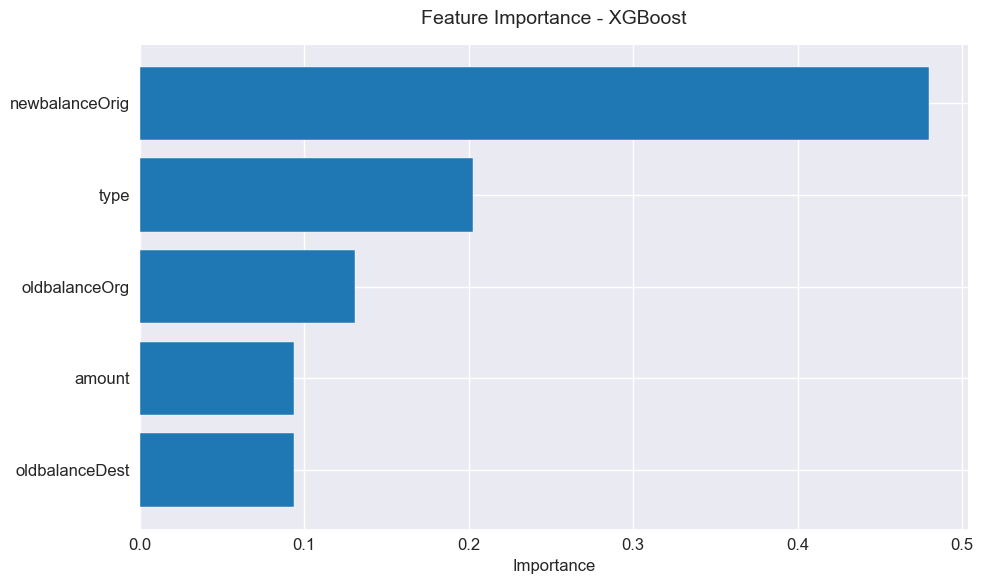

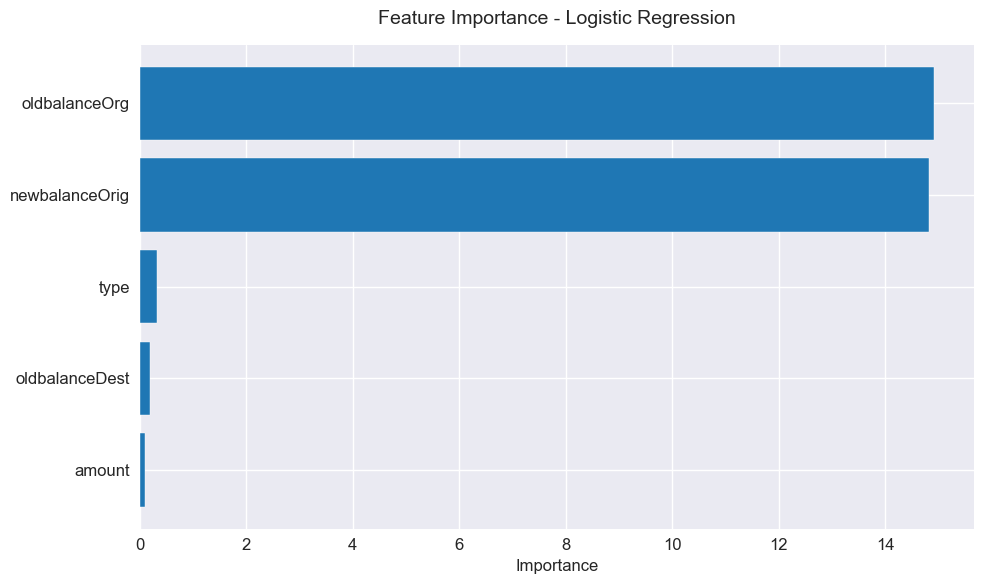

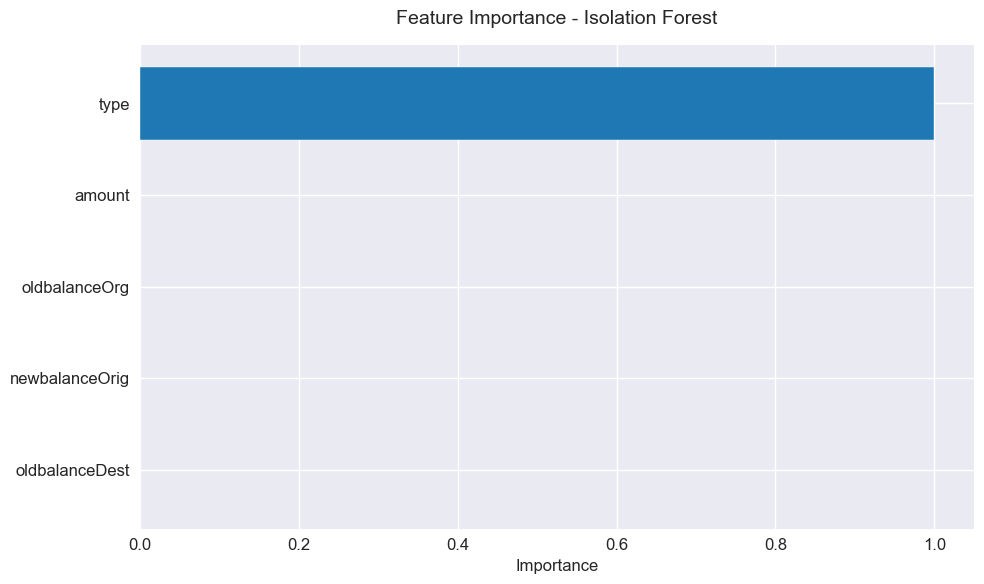

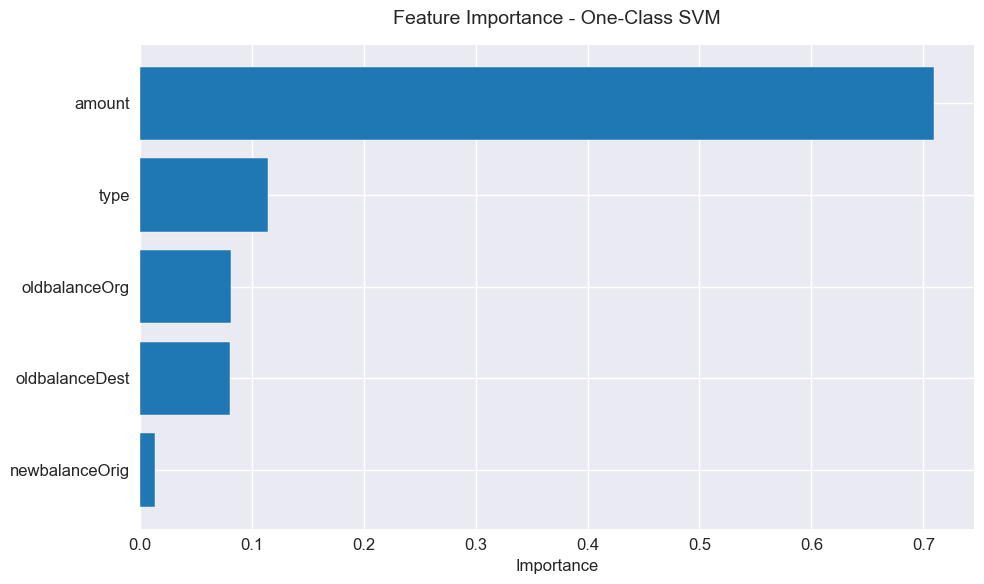

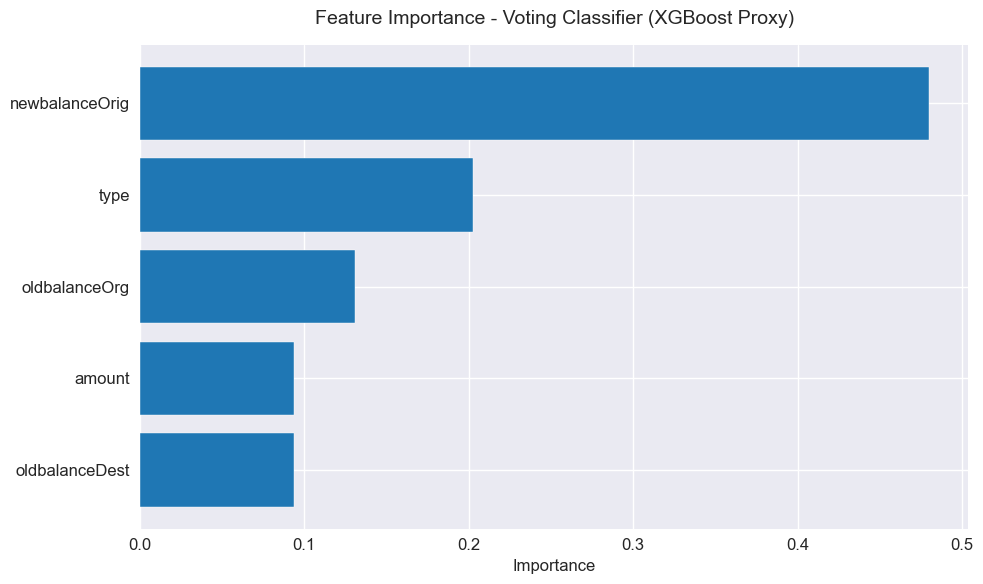

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Style
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('default')

# Plot settings
FIGSIZE = (10, 6)
FONT_SIZE = 12
BAR_COLOR = '#1f77b4'

# DataFrame for test input
X_test_df = pd.DataFrame(X_test_scaled_full, columns=selected_features)

def plot_feature_importance(model, model_name, model_type='tree'):
    """Plot feature importances for different model types"""
    if model_type == 'tree':
        importances = model.feature_importances_
    elif model_type == 'linear':
        importances = np.abs(model.coef_[0])  # Take absolute values for comparability
    elif model_type == 'unsupervised':
        # Train surrogate model for unsupervised models
        if isinstance(model, IsolationForest):
            scores = model.decision_function(X_train_scaled_full)
        else:  # One-Class SVM
            scores = model.decision_function(X_train_scaled_full)
        
        surrogate = RandomForestRegressor(n_estimators=50, random_state=42)
        surrogate.fit(X_train_scaled_full, scores)
        importances = surrogate.feature_importances_
    
    # Create a sorted DataFrame for plotting
    feat_imp_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=FIGSIZE)
    plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color=BAR_COLOR)
    plt.xlabel('Importance', fontsize=FONT_SIZE)
    plt.title(f'Feature Importance - {model_name}', fontsize=FONT_SIZE + 2, pad=15)
    plt.gca().invert_yaxis()  # Highest importance at top
    plt.xticks(fontsize=FONT_SIZE)
    plt.yticks(fontsize=FONT_SIZE)
    plt.tight_layout()
    plt.show()

# === Generate Feature Importance Plots for All Models ===
plot_feature_importance(rf, "Random Forest", 'tree')
plot_feature_importance(xgb, "XGBoost", 'tree')
plot_feature_importance(lr, "Logistic Regression", 'linear')
plot_feature_importance(best_iso_model, "Isolation Forest", 'unsupervised')
plot_feature_importance(best_svm_model, "One-Class SVM", 'unsupervised')

# Voting Classifier proxy
plot_feature_importance(xgb, "Voting Classifier (XGBoost Proxy)", 'tree')


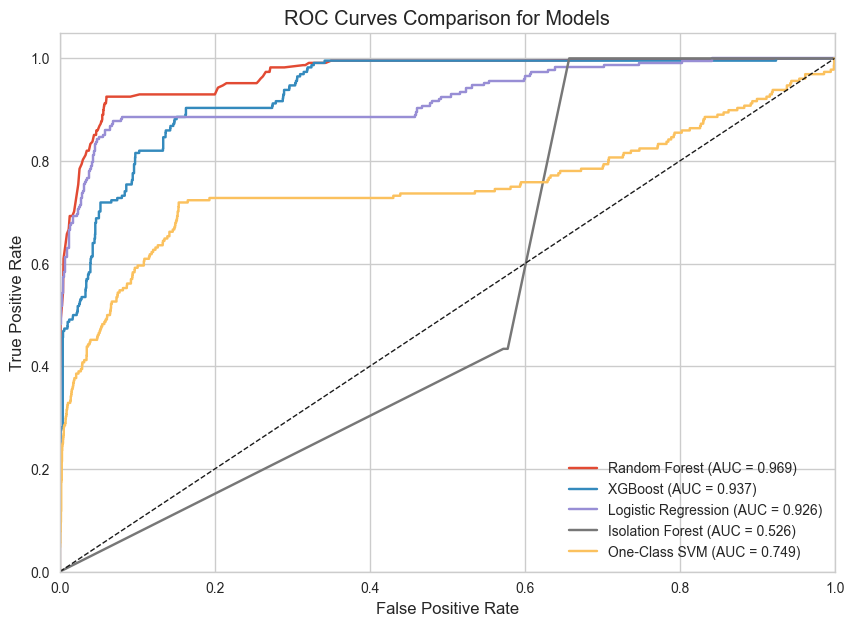

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Suppose you have your test labels and predictions (probabilities) for each model:
# y_test : true labels (binary 0/1)
# For each model, get predicted probabilities for the positive class (usually model.predict_proba(X_test)[:,1])

models = {
    'Random Forest': rf,        # Your trained RF model
    'XGBoost': xgb,             # Your trained XGBoost model
    'Logistic Regression': lr,  # Your trained Logistic Regression
    'Isolation Forest': best_iso_model,  # For Isolation Forest, use decision_function or predict_proba equivalent
    'One-Class SVM': best_svm_model       # For One-Class SVM, same as above
}

# Prepare to get predicted scores for ROC curves
def get_scores(model_name, model, X_test):
    if model_name in ['Random Forest', 'XGBoost', 'Logistic Regression']:
        # Use predict_proba for classifiers that support it
        return model.predict_proba(X_test)[:, 1]
    elif model_name == 'Isolation Forest':
        # IsolationForest: decision_function returns anomaly score (higher is normal)
        # Flip sign so higher means more anomaly (positive class)
        return -model.decision_function(X_test)
    elif model_name == 'One-Class SVM':
        # Same logic as Isolation Forest
        return -model.decision_function(X_test)
    else:
        # Default fallback (if any)
        return model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(10, 7))

for name, model in models.items():
    scores = get_scores(name, model, X_test_scaled)  # or your test set with correct scaling
    fpr, tpr, _ = roc_curve(y_test, scores)
    auc = roc_auc_score(y_test, scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison for Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<Figure size 800x550 with 0 Axes>

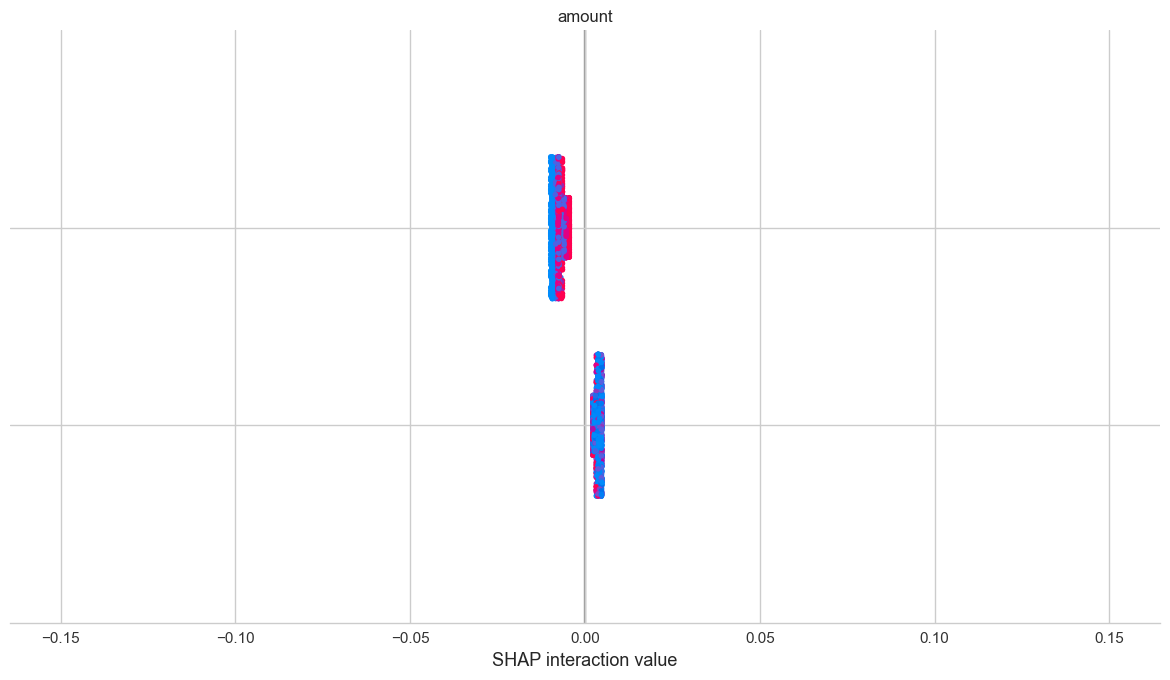

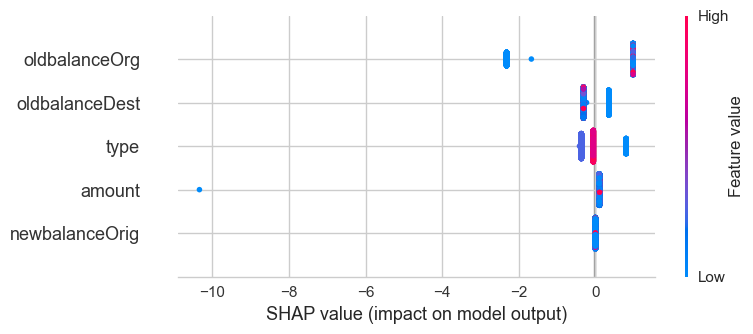

In [62]:
import shap
import matplotlib.pyplot as plt

# SHAP for Random Forest
explainer_rf = shap.Explainer(rf, X_test_sel_df)
shap_values_rf = explainer_rf(X_test_sel_df)
shap.summary_plot(shap_values_rf, X_test_sel_df)

# SHAP for XGBoost
explainer_xgb = shap.Explainer(xgb, X_test_sel_df)
shap_values_xgb = explainer_xgb(X_test_sel_df)
shap.summary_plot(shap_values_xgb, X_test_sel_df)


Error generating SHAP plot for Random Forest: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (5).


<Figure size 1000x600 with 0 Axes>

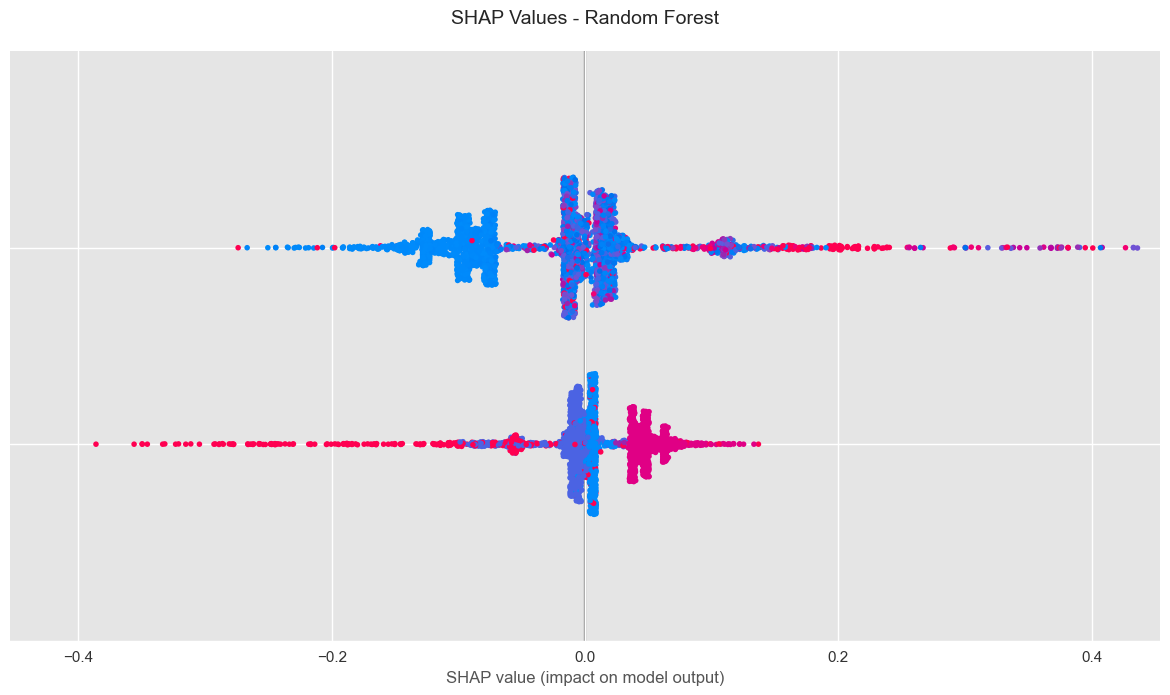

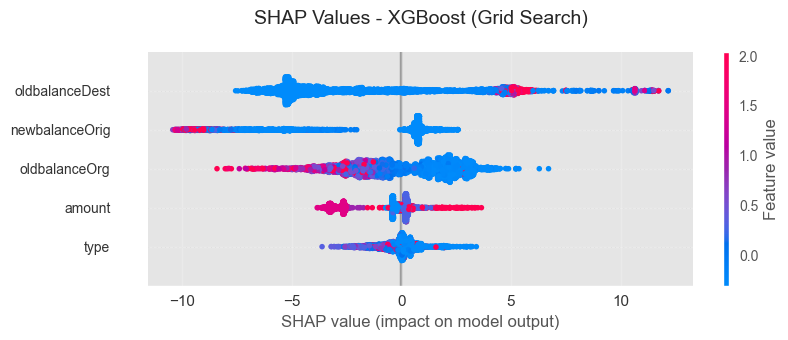

Error generating SHAP plot for Logistic Regression: 'numpy.ndarray' object has no attribute 'columns'


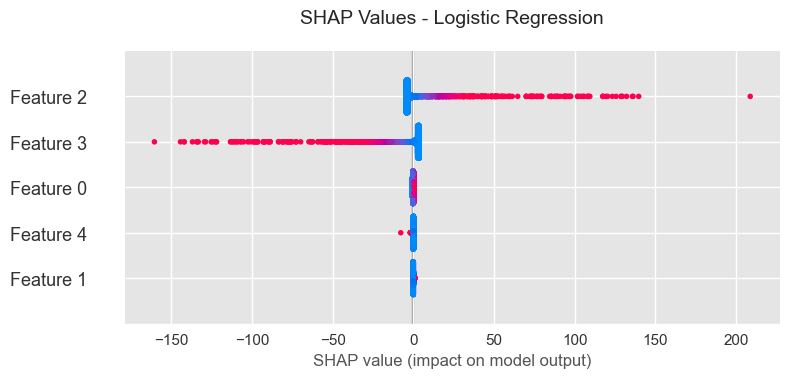

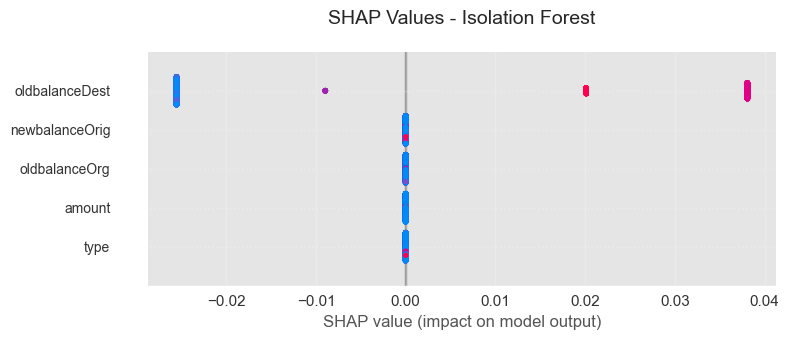

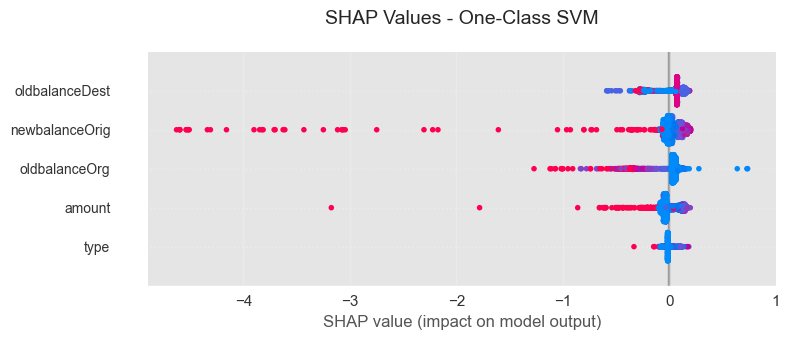

In [65]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Set consistent style
plt.style.use('seaborn' if 'seaborn' in plt.style.available else 'ggplot')

def generate_shap_plot(model, X_data, model_name, model_type='tree'):
    """Generate SHAP plot matching reference style"""
    plt.figure(figsize=(10, 6))
    
    try:
        # Create appropriate explainer
        if model_type == 'tree':
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_data)
            if isinstance(shap_values, list):  # Binary classification
                shap_values = shap_values[1]  # Fraud class
        elif model_type == 'linear':
            explainer = shap.LinearExplainer(model, X_data)
            shap_values = explainer.shap_values(X_data)
        elif model_type == 'unsupervised':
            scores = model.decision_function(X_data)
            surrogate = RandomForestRegressor(n_estimators=50, random_state=42)
            surrogate.fit(X_data, scores)
            explainer = shap.TreeExplainer(surrogate)
            shap_values = explainer.shap_values(X_data)
        
        # Generate the dot plot
        shap.summary_plot(shap_values, X_data, 
                         plot_type="dot", 
                         show=False,
                         color_bar=False)
        
        # Formatting to match reference image
        plt.title(f"SHAP Values - {model_name}", fontsize=14, pad=20)
        plt.xlabel("SHAP value (impact on model output)", fontsize=12)
        plt.gca().set_yticklabels(X_data.columns, fontsize=10)
        plt.grid(True, alpha=0.2)
        
        # Add color bar manually for better control
        if model_type != 'unsupervised':
            plt.colorbar(label='Feature value', 
                        aspect=40, 
                        pad=0.05, 
                        fraction=0.05).ax.tick_params(labelsize=10)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error generating SHAP plot for {model_name}: {str(e)}")

# Prepare test data (ensure it's a DataFrame with column names)
X_test_df = pd.DataFrame(X_test_scaled_full, columns=selected_features)

# Generate plots for all models
models_to_plot = [
    (rf, X_test_df, "Random Forest", 'tree'),
    (xgb, X_test_df, "XGBoost (Grid Search)", 'tree'),
    (lr, X_test_scaled_full, "Logistic Regression", 'linear'),
    (best_iso_model, X_test_df, "Isolation Forest", 'unsupervised'),
    (best_svm_model, X_test_df, "One-Class SVM", 'unsupervised')
]

for model, X_data, name, mtype in models_to_plot:
    generate_shap_plot(model, X_data, name, mtype)

Error generating SHAP plot for Random Forest: unsupported format string passed to numpy.ndarray.__format__


<Figure size 1000x600 with 0 Axes>

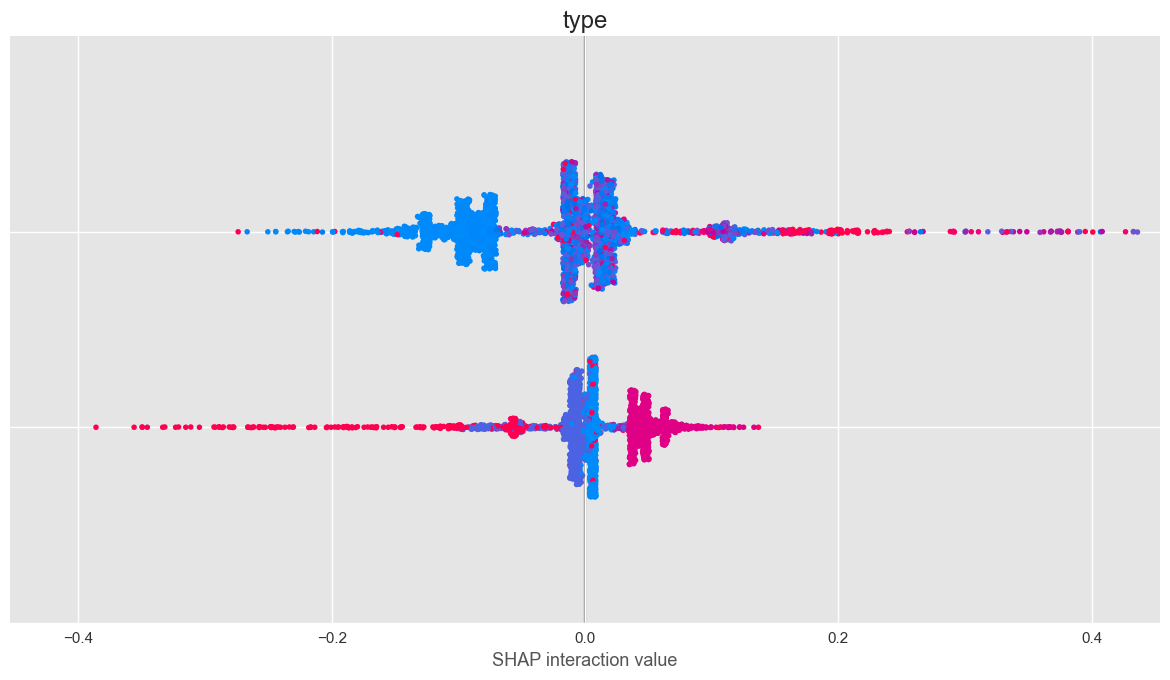

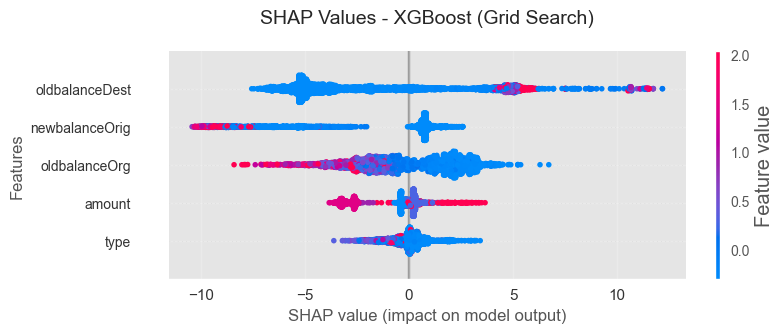

Error generating SHAP plot for Logistic Regression: 'numpy.ndarray' object has no attribute 'columns'


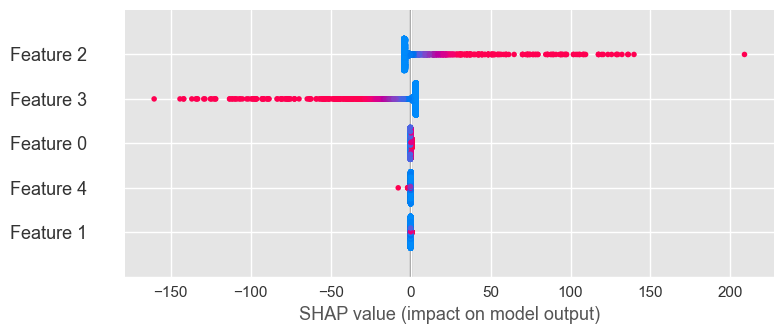

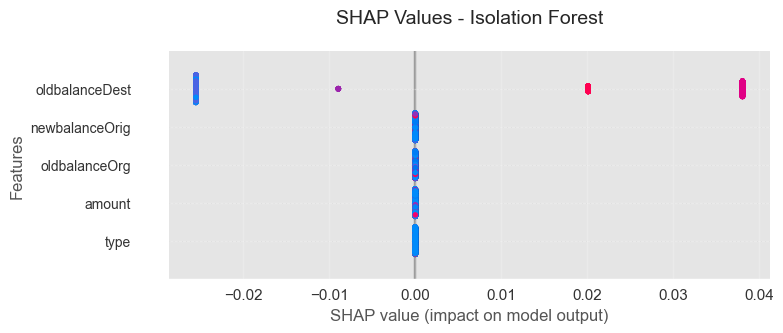

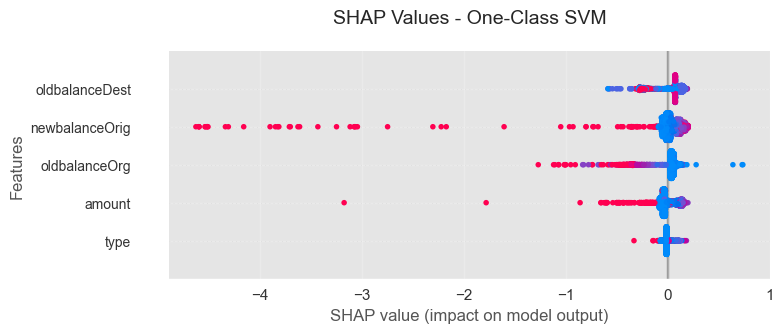

In [68]:
def generate_shap_plot(model, X_data, model_name, model_type='tree'):
    """Generate SHAP plot with enhanced labels for specific models"""
    plt.figure(figsize=(10, 6))
    
    try:
        # Create explainer and get SHAP values
        if model_type == 'tree':
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_data)
            if isinstance(shap_values, list):
                shap_values = shap_values[1]  # Use fraud class
        elif model_type == 'linear':
            explainer = shap.LinearExplainer(model, X_data)
            shap_values = explainer.shap_values(X_data)
        elif model_type == 'unsupervised':
            scores = model.decision_function(X_data)
            surrogate = RandomForestRegressor(n_estimators=50, random_state=42)
            surrogate.fit(X_data, scores)
            explainer = shap.TreeExplainer(surrogate)
            shap_values = explainer.shap_values(X_data)
        
        # Calculate mean absolute SHAP values for labeling
        mean_shap = np.abs(shap_values).mean(axis=0)
        
        # Generate the base plot
        shap.summary_plot(shap_values, X_data,
                         plot_type="dot",
                         show=False,
                         color_bar=False)
        
        # Enhanced labeling for RF and Logistic Regression
        if model_name in ["Random Forest", "Logistic Regression"]:
            ax = plt.gca()
            labels = [f"{feat}\n(mean SHAP={val:.2f})" 
                     for feat, val in zip(X_data.columns, mean_shap)]
            ax.set_yticklabels(labels, fontsize=10)
            plt.ylabel("Features with SHAP Values", fontsize=12)
        else:
            plt.gca().set_yticklabels(X_data.columns, fontsize=10)
            plt.ylabel("Features", fontsize=12)
        
        # Consistent formatting
        plt.title(f"SHAP Values - {model_name}", fontsize=14, pad=20)
        plt.xlabel("SHAP value (impact on model output)", fontsize=12)
        plt.grid(True, alpha=0.2)
        
        if model_type != 'unsupervised':
            plt.colorbar(label='Feature value', 
                        aspect=40, 
                        pad=0.05, 
                        fraction=0.05).ax.tick_params(labelsize=10)
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error generating SHAP plot for {model_name}: {str(e)}")

# Generate all plots
for model, X_data, name, mtype in models_to_plot:
    generate_shap_plot(model, X_data, name, mtype)

<Figure size 1000x600 with 0 Axes>

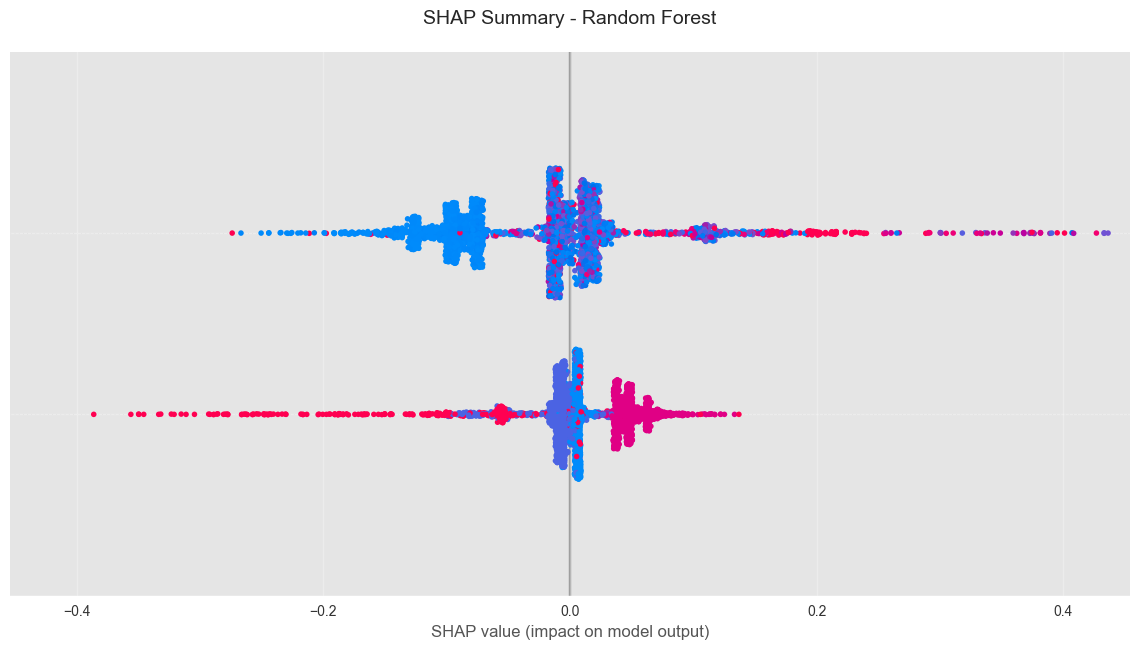

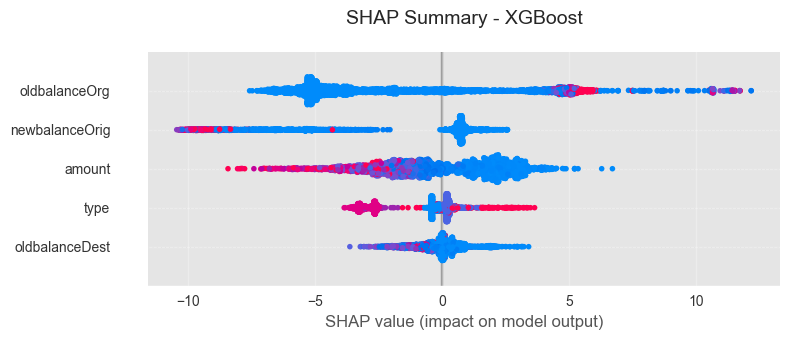

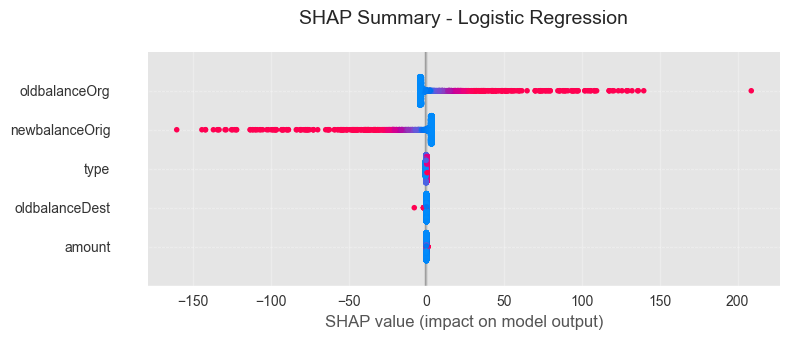

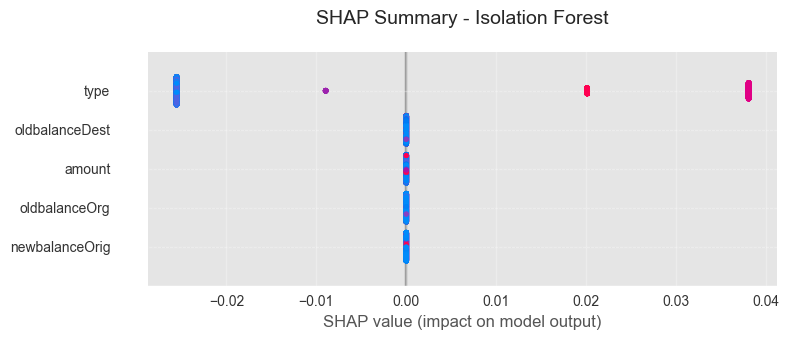

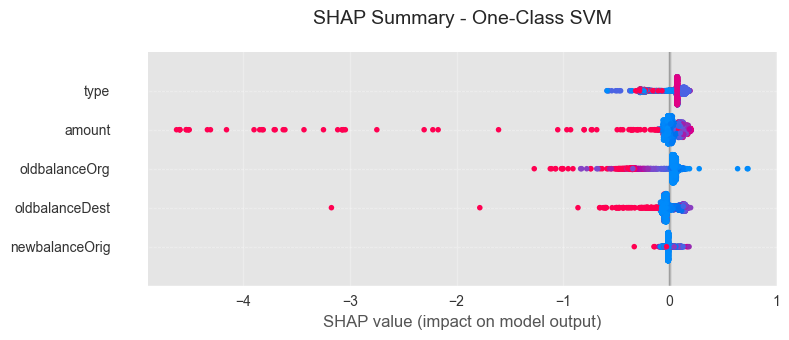

In [69]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Ensure consistent style
plt.style.use('seaborn' if 'seaborn' in plt.style.available else 'ggplot')

def generate_shap_plot(model, X_data, model_name, model_type='tree'):
    """Generate consistent SHAP summary plot for a given model."""
    try:
        # Convert X_data to DataFrame with feature names
        if isinstance(X_data, np.ndarray):
            X_data = pd.DataFrame(X_data, columns=selected_features)

        # Choose appropriate SHAP explainer
        if model_type == 'tree':
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_data)
            if isinstance(shap_values, list):  # For binary classifiers
                shap_values = shap_values[1]
        elif model_type == 'linear':
            explainer = shap.LinearExplainer(model, X_data)
            shap_values = explainer.shap_values(X_data)
        elif model_type == 'unsupervised':
            scores = model.decision_function(X_data)
            surrogate = RandomForestRegressor(n_estimators=50, random_state=42)
            surrogate.fit(X_data, scores)
            explainer = shap.TreeExplainer(surrogate)
            shap_values = explainer.shap_values(X_data)

        # Plot SHAP summary
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_data,
                          plot_type="dot",
                          show=False,
                          color_bar=False)
        
        # Unified formatting
        plt.title(f"SHAP Summary - {model_name}", fontsize=14, pad=20)
        plt.xlabel("SHAP value (impact on model output)", fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.gca().tick_params(labelsize=10)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error generating SHAP plot for {model_name}: {str(e)}")

# Ensure all test sets are DataFrames with the same features
X_test_df_full = pd.DataFrame(X_test_scaled_full, columns=selected_features)

# Generate SHAP plots for all models
models_to_plot = [
    (rf, X_test_df_full, "Random Forest", 'tree'),
    (xgb, X_test_df_full, "XGBoost", 'tree'),
    (lr, X_test_scaled_full, "Logistic Regression", 'linear'),
    (best_iso_model, X_test_df_full, "Isolation Forest", 'unsupervised'),
    (best_svm_model, X_test_df_full, "One-Class SVM", 'unsupervised')
]

for model, X_data, name, mtype in models_to_plot:
    generate_shap_plot(model, X_data, name, mtype)


<Figure size 1000x600 with 0 Axes>

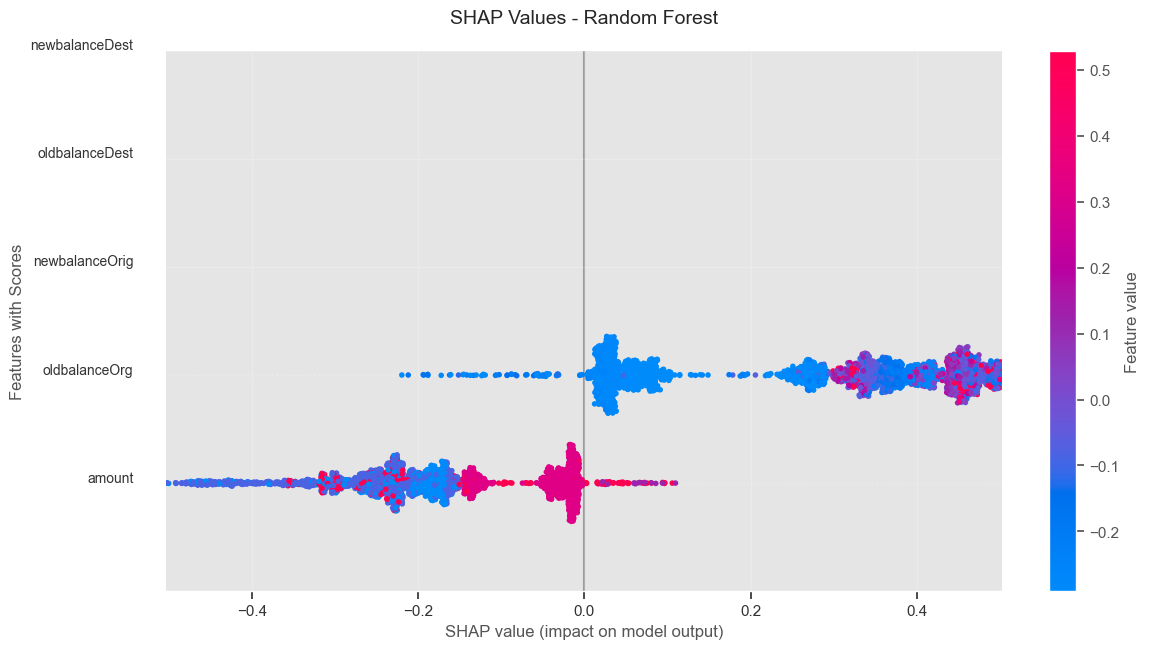

In [93]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Prepare the test data with correct feature names
X_rf = pd.DataFrame(X_test_scaled_full, columns=selected_features)

# Compute SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_rf)

# For binary classification, use SHAP values for fraud class (class 1)
if isinstance(shap_values, list):
    shap_values = shap_values[1]

# Calculate mean absolute SHAP values for each feature
mean_shap = [np.mean(np.abs(shap_values[:, i])) for i in range(shap_values.shape[1])]

# Create proper labels with feature names and impact values
feature_labels = [f"{name}\n" 
                 for name, val in zip(selected_features, mean_shap)]

# Generate the plot with correct labeling
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values,
    X_rf,
    plot_type='dot',
    show=False,
    feature_names=feature_labels,
    color_bar=False
)

# Formatting with correct labels
plt.title("SHAP Values - Random Forest", fontsize=14, pad=20)
plt.xlabel("SHAP value (impact on model output)", fontsize=12)
plt.ylabel("Features with Scores", fontsize=12)
plt.yticks(ticks=range(len(selected_features)), labels=feature_labels, fontsize=10)
plt.grid(True, alpha=0.2)

# Add color bar
plt.colorbar(label='Feature value', aspect=40, pad=0.05, fraction=0.05)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

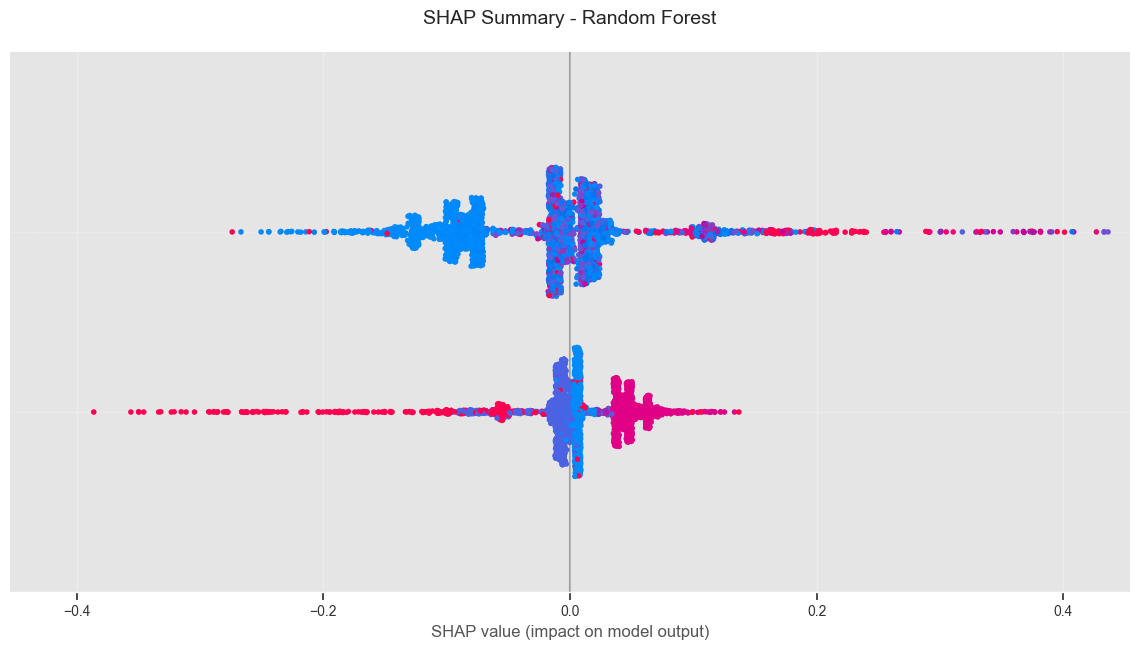

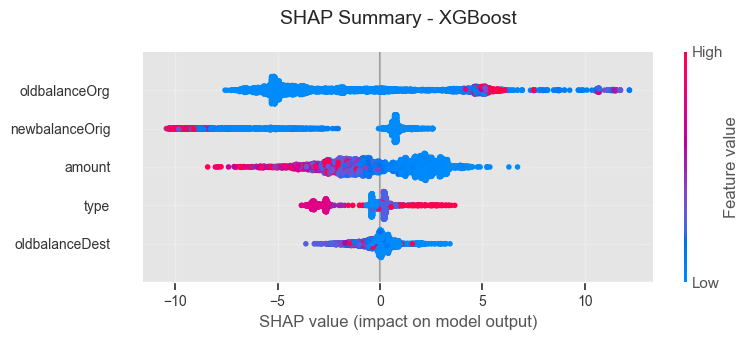

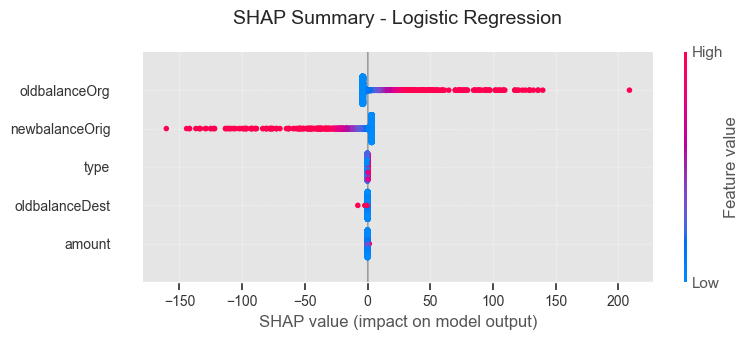

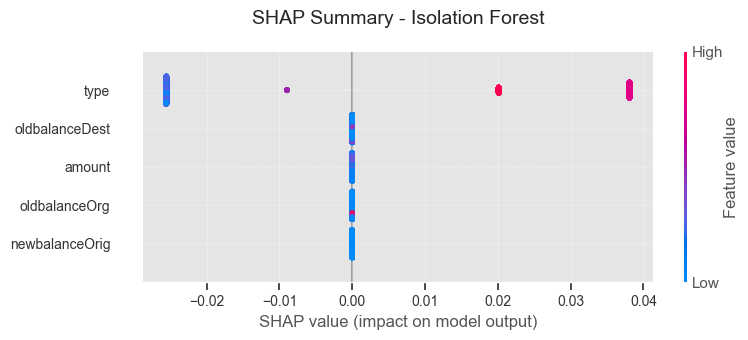

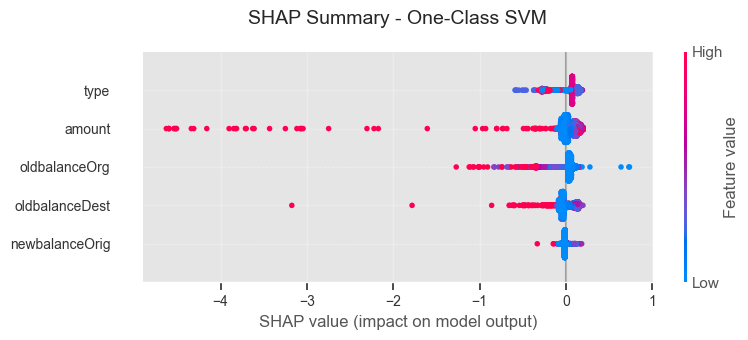

In [52]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Ensure consistent style
plt.style.use('seaborn' if 'seaborn' in plt.style.available else 'ggplot')

def generate_shap_plot(model, X_data, model_name, model_type='tree'):
    """Generate SHAP summary plot with automatic color bar."""
    try:
        # Convert to DataFrame if needed
        if isinstance(X_data, np.ndarray):
            X_data = pd.DataFrame(X_data, columns=selected_features)

        # Choose SHAP explainer
        if model_type == 'tree':
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_data)
            if isinstance(shap_values, list):  # Binary classifier
                shap_values = shap_values[1]
        elif model_type == 'linear':
            explainer = shap.LinearExplainer(model, X_data)
            shap_values = explainer.shap_values(X_data)
        elif model_type == 'unsupervised':
            scores = model.decision_function(X_data)
            surrogate = RandomForestRegressor(n_estimators=50, random_state=42)
            surrogate.fit(X_data, scores)
            explainer = shap.TreeExplainer(surrogate)
            shap_values = explainer.shap_values(X_data)

        # Generate SHAP summary plot (with automatic color bar)
        plt.figure(figsize=(10, 6))
        shap.summary_plot(shap_values, X_data, plot_type="dot", show=False)  # <- color bar enabled by default

        # Styling
        plt.title(f"SHAP Summary - {model_name}", fontsize=14, pad=20)
        plt.xlabel("SHAP value (impact on model output)", fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.gca().tick_params(labelsize=10)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error generating SHAP plot for {model_name}: {str(e)}")

# Prepare data
X_test_df_full = pd.DataFrame(X_test_scaled_full, columns=selected_features)

# Models to explain
models_to_plot = [
    (rf, X_test_df_full, "Random Forest", 'tree'),
    (xgb, X_test_df_full, "XGBoost", 'tree'),
    (lr, X_test_scaled_full, "Logistic Regression", 'linear'),
    (best_iso_model, X_test_df_full, "Isolation Forest", 'unsupervised'),
    (best_svm_model, X_test_df_full, "One-Class SVM", 'unsupervised')
]

# Plot SHAP values for all models
for model, X_data, name, mtype in models_to_plot:
    generate_shap_plot(model, X_data, name, mtype)
